In [ ]:
!pip install pylatexenc
!pip install wikipedia
!pip install beautifulsoup4
!pip install pylatex
!pip install latextools
!pip install drawSvg
!pip install urllib

from urllib.parse import quote
import urllib.request, json 
from tqdm import tqdm
from IPython.display import display, Latex
import latextools
import drawSvg as draw  # pip3 install drawSvg

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
def generate_url(q):
    q = quote(q)
    return "https://en.wikipedia.org/w/api.php?format=json&action=query&titles="+q+"&prop=links"

def get_all_titles(q, all_pages):
    URL = generate_url(q)
    titles = []
    with urllib.request.urlopen(URL) as url:
        data = json.loads(url.read().decode())
        links_query = data['query']['pages']
    Q = links_query[list(links_query.keys())[0]]
    if 'links' not in Q: return []
    else:
        LINKS = Q['links']
        for link in LINKS:
            l = link['title']
            if l not in all_pages: all_pages.add(l)
            titles += [l]
        return titles


def BFS(node, titles_seq, deep, deep_max):
    if(deep<=deep_max):
        titles = get_all_titles(node, titles_seq)
        for title in titles:
            BFS(title, titles_seq, deep+1, deep_max)
            
topics = [
    #'Outline_of_algebra',
    #'Outline_of_logic',
    #'List of set identities and relations',
    #'List of logarithmic identities',
    #'List of trigonometric identities',
    'Outline of trigonometry',
    #'Outline of geometry',
    #'List of geometry topics',
    'List of calculus topics',
    #'Outline of discrete mathematics',
    'Outline of arithmetic',
    #'Outline of algebra'
         ]

q = 'Lists of mathematics topics'
all_links = set()
for topic in tqdm(topics):
    titles_seq = set()
    all_titles = BFS(topic, titles_seq, 0, 1)
    all_links.update(titles_seq)
    
print(len(all_links))

100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

202


In [4]:
from bs4 import BeautifulSoup as BSHTML

def generate_math_query(q):
    q = quote(q)
    URL = "https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&titles=" + q + "&formatversion=2"
    return URL

def get_math_expressions(title):
    URL = generate_math_query(title)
    with urllib.request.urlopen(URL) as url:
        data = json.loads(url.read().decode())
        if 'extract' in data['query']['pages'][0]:
            PAGE = data['query']['pages'][0]['extract']
        else: return []
    
    soup = BSHTML(PAGE)
    images = soup.findAll('math')
    res = []
    for image in images:
        res += [(image['alttext'][15:-1])] #15:-1 = drop displaystyle and {}
    return res

get_math_expressions('Integral')

['\\int _{a}^{b}f(x)\\,dx.',
 '\\int f(x)\\,dx,',
 't _{a}^{b}(c_{1}f+c_{2}g)=c_{1}\\int _{a}^{b}f+c_{2}\\int _{a}^{b}g',
 '\\textstyle {\\sqrt {\\frac {1}{5}}}\\left({\\frac {1}{5}}-0\\right)+{\\sqrt {\\frac {2}{5}}}\\left({\\frac {2}{5}}-{\\frac {1}{5}}\\right)+\\cdots +{\\sqrt {\\frac {5}{5}}}\\left({\\frac {5}{5}}-{\\frac {4}{5}}\\right)\\approx 0.7497,',
 '\\int _{0}^{1}{\\sqrt {x}}\\,dx={\\frac {2}{3}},',
 'a=x_{0}\\leq t_{1}\\leq x_{1}\\leq t_{2}\\leq x_{2}\\leq \\cdots \\leq x_{n-1}\\leq t_{n}\\leq x_{n}=b.\\,\\!',
 '\\sum _{i=1}^{n}f(t_{i})\\,\\Delta _{i};',
 '\\varepsilon >0',
 '\\delta >0',
 '[a,b]',
 '\\delta ',
 '\\left|S-\\sum _{i=1}^{n}f(t_{i})\\,\\Delta _{i}\\right|<\\varepsilon .',
 '\\int f=\\int _{0}^{\\infty }f^{*}(t)\\,dt',
 '\\int _{E}|f|\\,d\\mu <+\\infty .',
 '\\int _{E}f\\,d\\mu =\\int _{E}f^{+}\\,d\\mu -\\int _{E}f^{-}\\,d\\mu ',
 '{\\begin{alignedat}{3}&f^{+}(x)&&{}={}\\max\\{f(x),0\\}&&{}={}{\\begin{cases}f(x),&{\\text{if }}f(x)>0,\\\\0,&{\\text{otherwise,}}

In [5]:
def print_expressions(expr_set):
    for eq in list(expr_set):
        display(Latex(f'${eq}$'))

In [6]:
all_expressions = []
for page in tqdm(list(all_links)):
    all_expressions += [get_math_expressions(page)]

expressions = [expr for page_expr in all_expressions for expr in page_expr]

expr_set = set(expressions)

len(expr_set)
expr_set = list(expr_set)

100%|██████████| 202/202 [00:33<00:00,  6.06it/s]


In [158]:
border1 = 30
border2 = 65

short_expr = [exp for exp in expr_set if len(exp)<border1]
norm_expr = [exp for exp in expr_set if len(exp)>=border1 and len(exp)<=border2]
long_expr = [exp for exp in expr_set if len(exp)>border2]

print(len(short_expr), len(norm_expr), len(long_expr))

1695 677 589


In [42]:
!apt install texlive-fonts-recommended texlive-fonts-extra
!apt-get install dvipng

!pip install pylatex

In [58]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 20.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 22.2 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


'\\mathbb {C} \\to \\mathbb {C} ,z\\mapsto z^{n}'

In [148]:
import pandas as pd
df = pd.DataFrame(columns=['img_id', 'latex'])


((P\land Q)\land R)\leftrightarrow (P\land (Q\land R))
   ^
Unknown symbol: \land, found '\'  (at char 3), (line:1, col:4)

t_{ij}={\text{Tr}}_{K/\mathbb {Q} }(b_{i}b_{j})
        ^
Unknown symbol: \text, found '\'  (at char 8), (line:1, col:9)

v\left({\textstyle \sum _{k=1}^{n}}\mathbf {1} \right)\leq 1\ 
        ^
Unknown symbol: \textstyle, found '\'  (at char 8), (line:1, col:9)

\sum _{n=1}^{\infty }{\frac {1}{2(2n-1)}}{2n \choose n}x^{n-1}
                                             ^
Unknown symbol: \choose, found '\'  (at char 45), (line:1, col:46)

q={\tfrac {m}{n}}\in \mathbb {Q} 
   ^
Unknown symbol: \tfrac, found '\'  (at char 3), (line:1, col:4)

\operatorname {lcm} (l,m,n) \over m
                            ^
Unknown symbol: \over, found '\'  (at char 28), (line:1, col:29)

\mathbf {L} =I{\boldsymbol {\omega }},
               ^
Unknown symbol: \boldsymbol, found '\'  (at char 15), (line:1, col:16)

{\tfrac {\operatorname {m} }{\operatorname {s} ^{2}}}
 ^
Unknown symb

/tmp/ipykernel_75/1944314899.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,2),facecolor='w')



\det {\begin{bmatrix}2&5\\5&14\end{bmatrix}}=3
      ^
Unknown symbol: \begin, found '\'  (at char 6), (line:1, col:7)

\omega \mathbf {\hat {u}} ={\boldsymbol {\omega }},
                            ^
Unknown symbol: \boldsymbol, found '\'  (at char 28), (line:1, col:29)

C_{K,{\text{fin}}}:=I_{K,{\text{fin}}}/K^{\times }.
      ^
Unknown symbol: \text, found '\'  (at char 6), (line:1, col:7)

\textstyle {\frac {n!}{k!(n-k)!}}
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

({\boldsymbol {\omega }}\times )
  ^
Unknown symbol: \boldsymbol, found '\'  (at char 2), (line:1, col:3)

{\frac {P\to Q}{\therefore P\to (P\land Q)}}
                                  ^
Unknown symbol: \land, found '\'  (at char 34), (line:1, col:35)

\det {\begin{bmatrix}2&5&14\\5&14&42\\14&42&132\end{bmatrix}}=4
      ^
Unknown symbol: \begin, found '\'  (at char 6), (line:1, col:7)

{\boldsymbol {\omega }}=[\omega _{x},\omega _{y},\omega _{z}]
 ^
Unknown symbol: \boldsymbol, found '\'  

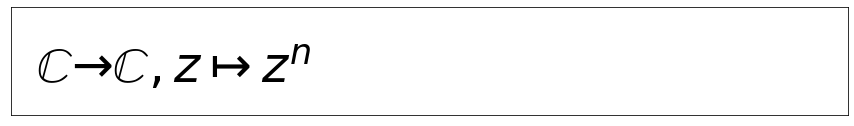

ValueError: 
((P\land Q)\land R)\leftrightarrow (P\land (Q\land R))
   ^
Unknown symbol: \land, found '\'  (at char 3), (line:1, col:4)

<Figure size 1080x144 with 1 Axes>

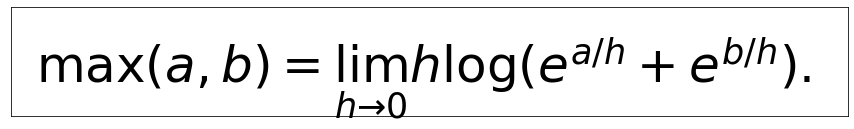

ValueError: 
t_{ij}={\text{Tr}}_{K/\mathbb {Q} }(b_{i}b_{j})
        ^
Unknown symbol: \text, found '\'  (at char 8), (line:1, col:9)

<Figure size 1080x144 with 1 Axes>

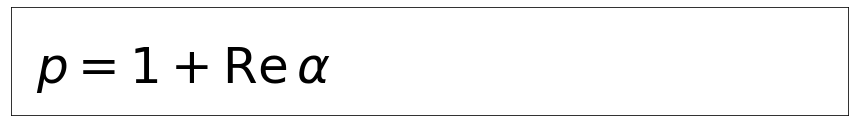

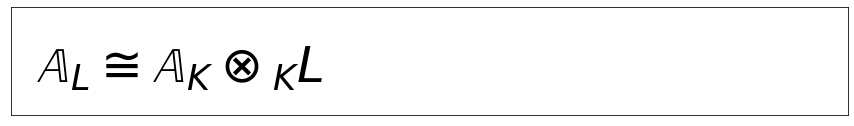

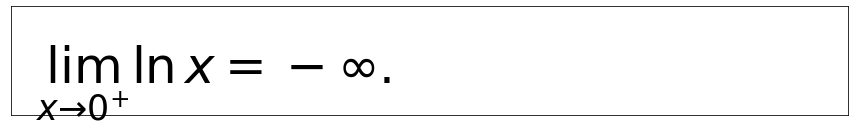

ValueError: 
v\left({\textstyle \sum _{k=1}^{n}}\mathbf {1} \right)\leq 1\ 
        ^
Unknown symbol: \textstyle, found '\'  (at char 8), (line:1, col:9)

<Figure size 1080x144 with 1 Axes>

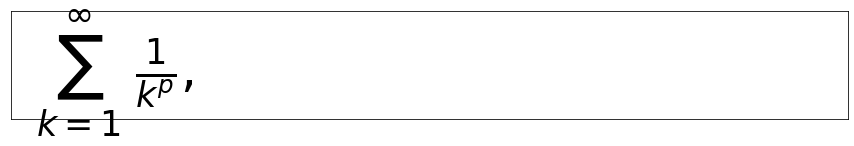

ValueError: 
\sum _{n=1}^{\infty }{\frac {1}{2(2n-1)}}{2n \choose n}x^{n-1}
                                             ^
Unknown symbol: \choose, found '\'  (at char 45), (line:1, col:46)

<Figure size 1080x144 with 1 Axes>

ValueError: 
q={\tfrac {m}{n}}\in \mathbb {Q} 
   ^
Unknown symbol: \tfrac, found '\'  (at char 3), (line:1, col:4)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\operatorname {lcm} (l,m,n) \over m
                            ^
Unknown symbol: \over, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\mathbf {L} =I{\boldsymbol {\omega }},
               ^
Unknown symbol: \boldsymbol, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

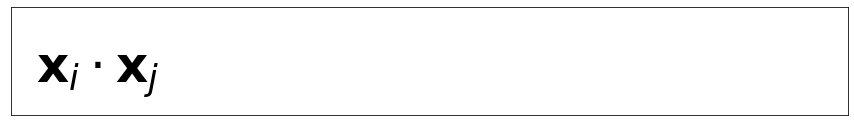

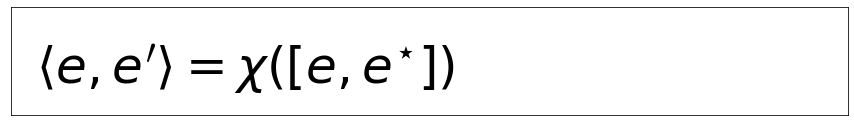

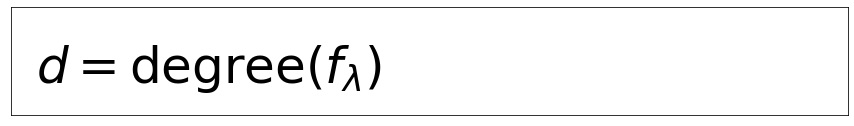

ValueError: 
{\tfrac {\operatorname {m} }{\operatorname {s} ^{2}}}
 ^
Unknown symbol: \tfrac, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

ValueError: 
{\boldsymbol {\omega }}\times \mathbf {r} =W\cdot \mathbf {r} .
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

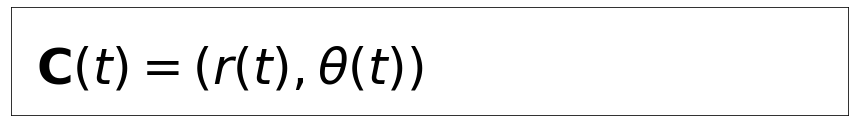

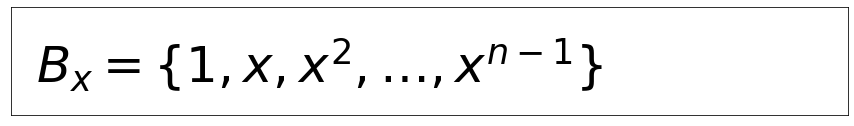

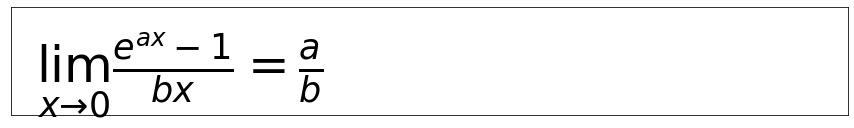

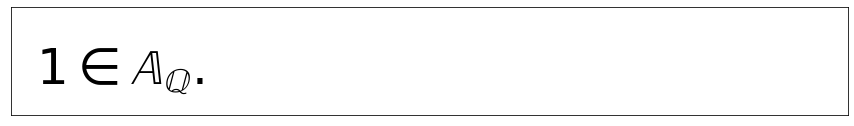

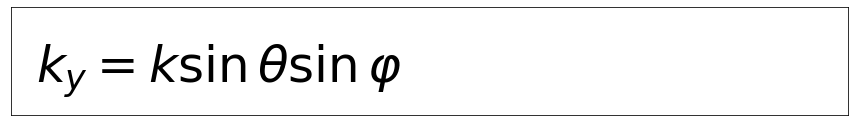

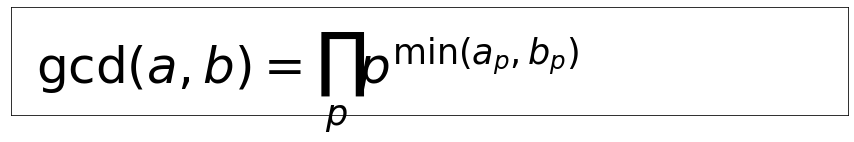

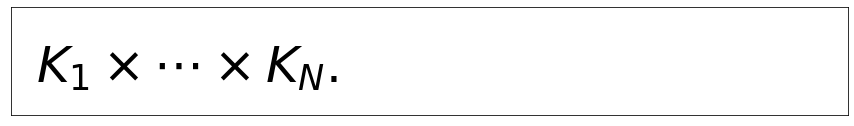

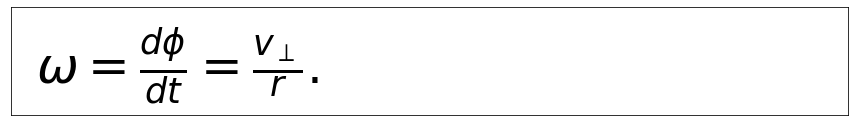

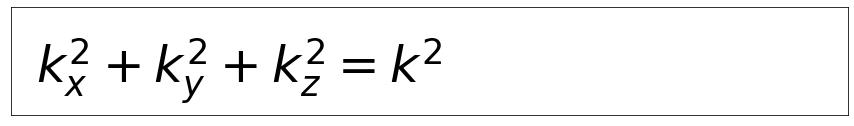

ValueError: 
\det {\begin{bmatrix}2&5\\5&14\end{bmatrix}}=3
      ^
Unknown symbol: \begin, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

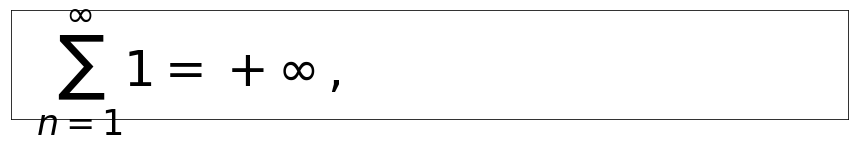

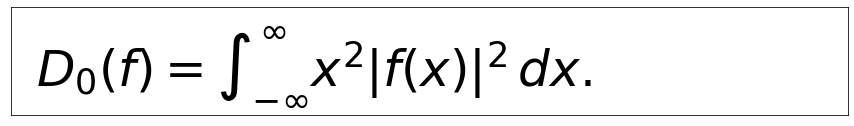

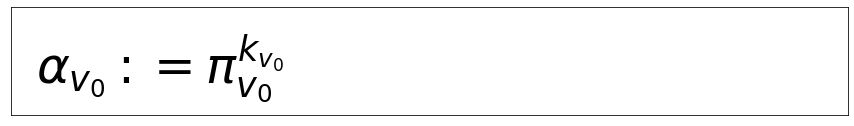

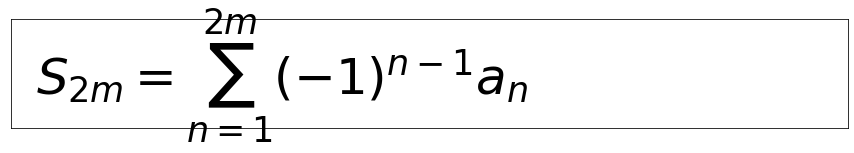

ValueError: 
\omega \mathbf {\hat {u}} ={\boldsymbol {\omega }},
                            ^
Unknown symbol: \boldsymbol, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

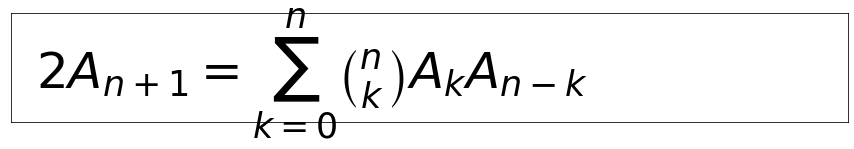

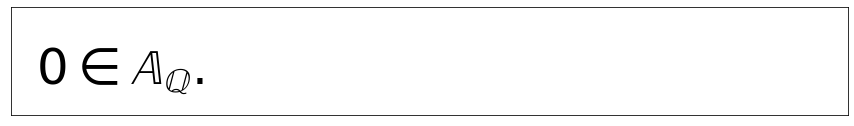

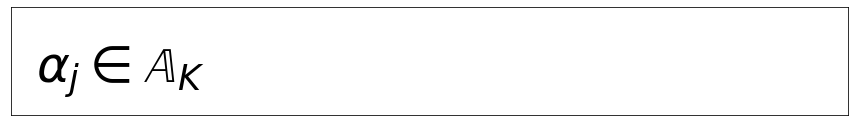

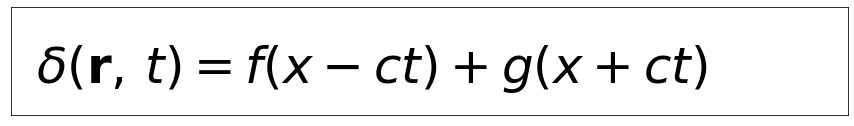

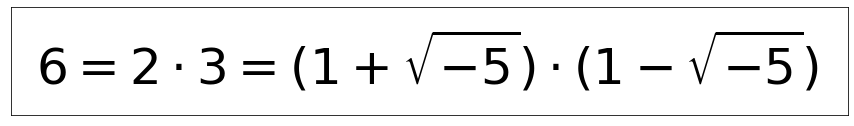

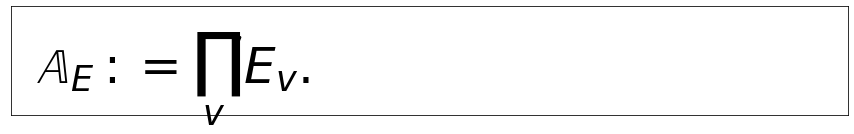

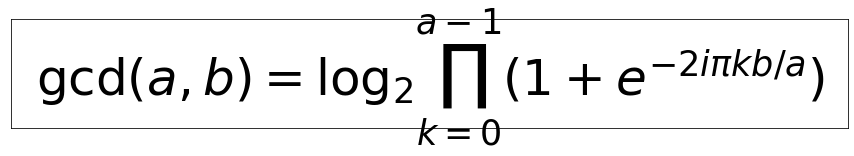

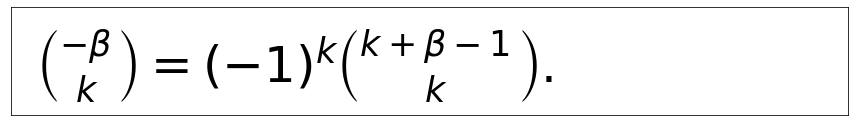

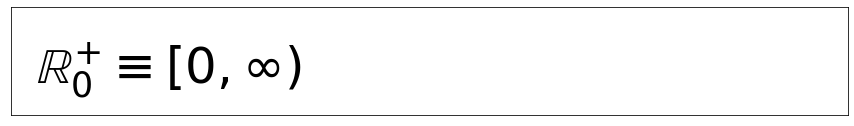

ValueError: 
C_{K,{\text{fin}}}:=I_{K,{\text{fin}}}/K^{\times }.
      ^
Unknown symbol: \text, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

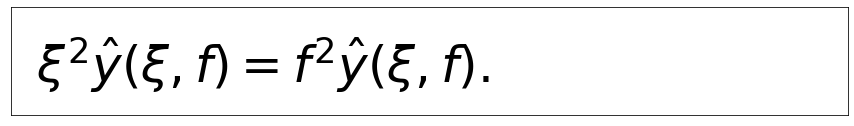

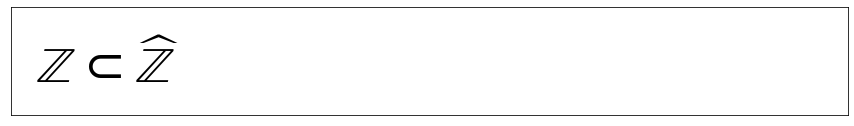

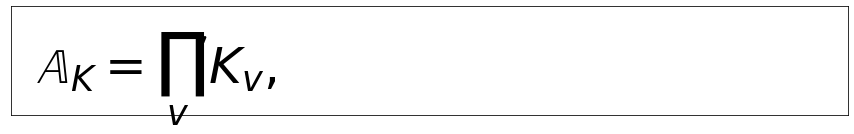

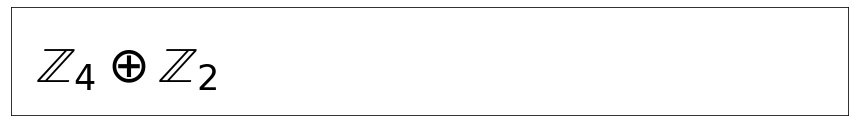

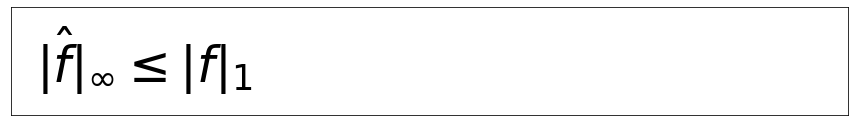

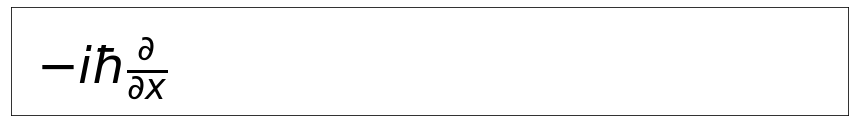

ValueError: 
\textstyle {\frac {n!}{k!(n-k)!}}
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

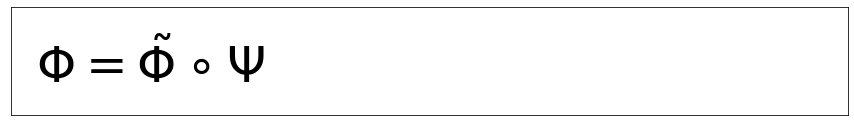

ValueError: 
({\boldsymbol {\omega }}\times )
  ^
Unknown symbol: \boldsymbol, found '\'  (at char 2), (line:1, col:3)

<Figure size 1080x144 with 1 Axes>

ValueError: 
{\frac {P\to Q}{\therefore P\to (P\land Q)}}
                                  ^
Unknown symbol: \land, found '\'  (at char 34), (line:1, col:35)

<Figure size 1080x144 with 1 Axes>

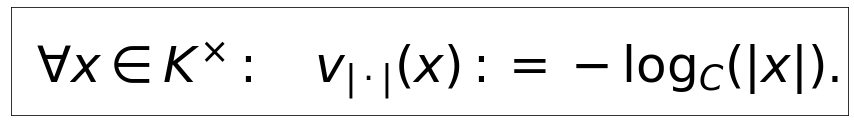

ValueError: 
\det {\begin{bmatrix}2&5&14\\5&14&42\\14&42&132\end{bmatrix}}=4
      ^
Unknown symbol: \begin, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

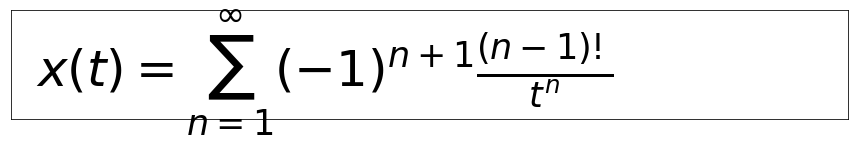

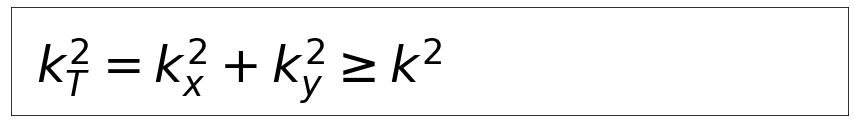

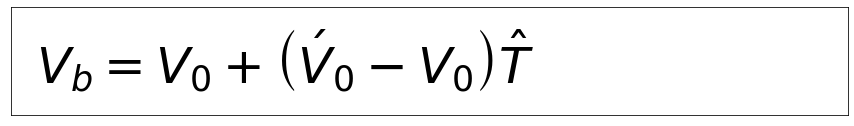

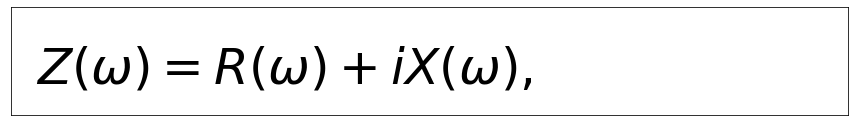

ValueError: 
{\boldsymbol {\omega }}=[\omega _{x},\omega _{y},\omega _{z}]
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

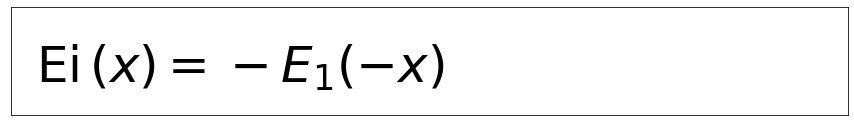

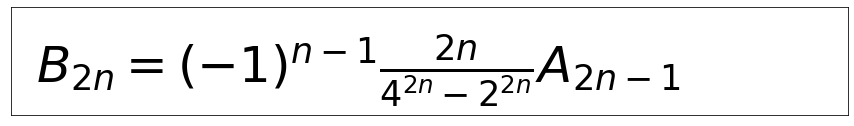

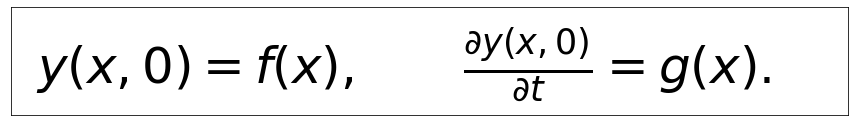

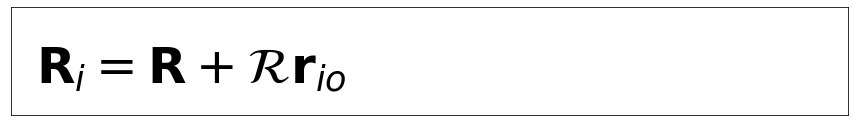

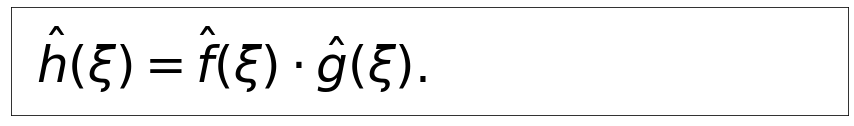

ValueError: 
1+{n\sigma _{\text{Treatment}}^{2}}/{\sigma _{\text{Error}}^{2}}
             ^
Unknown symbol: \text, found '\'  (at char 13), (line:1, col:14)

<Figure size 1080x144 with 1 Axes>

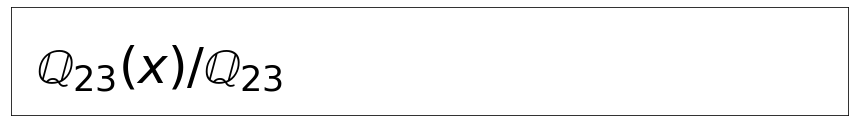

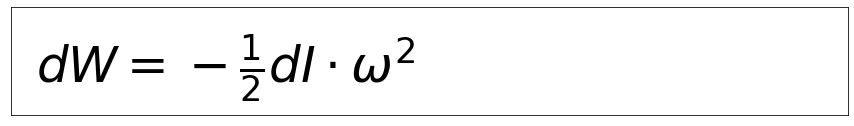

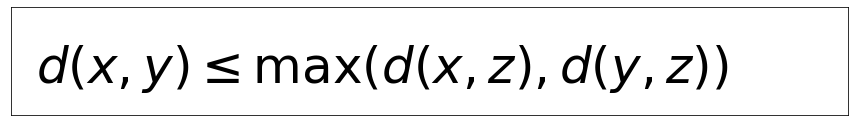

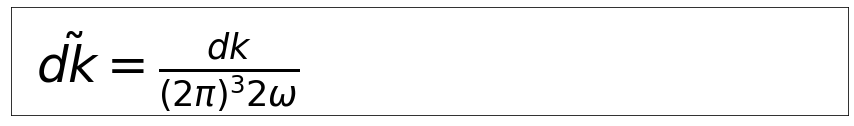

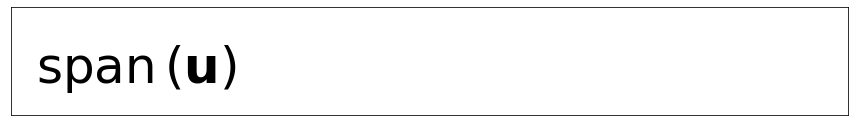

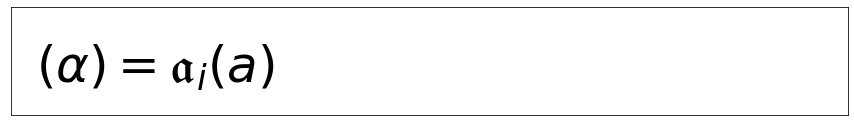

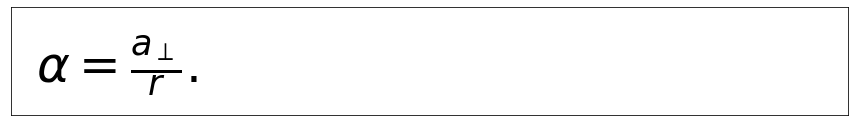

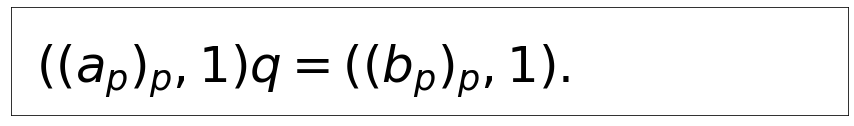

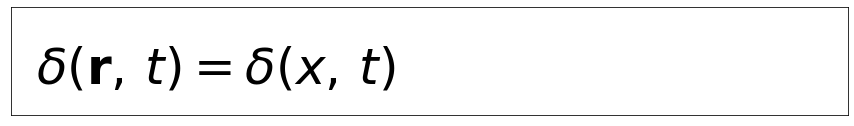

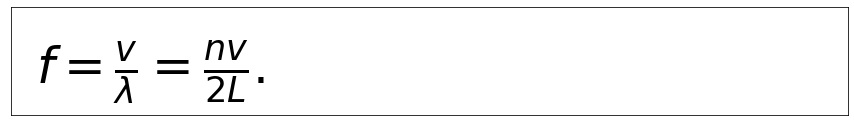

ValueError: 
W={\frac {d{\mathcal {R}}}{dt}}{\mathcal {R}}^{\text{T}}
                                               ^
Unknown symbol: \text, found '\'  (at char 47), (line:1, col:48)

<Figure size 1080x144 with 1 Axes>

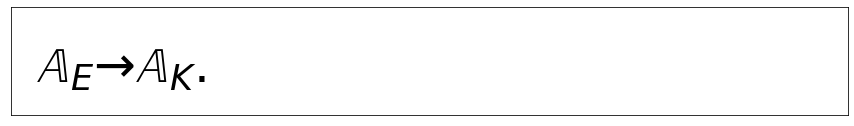

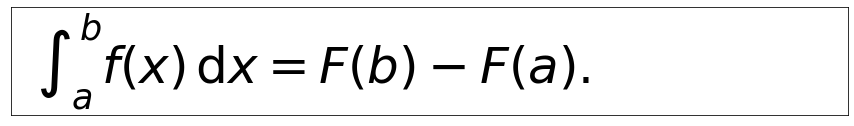

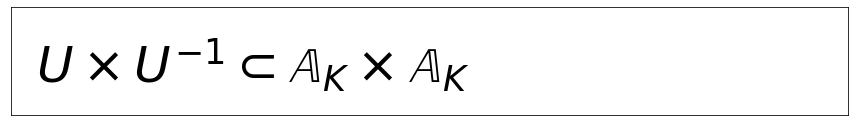

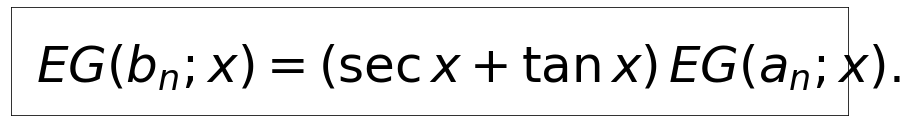

ValueError: 
(P\to Q)\leftrightarrow (P\to (P\land Q))
                                ^
Unknown symbol: \land, found '\'  (at char 32), (line:1, col:33)

<Figure size 1080x144 with 1 Axes>

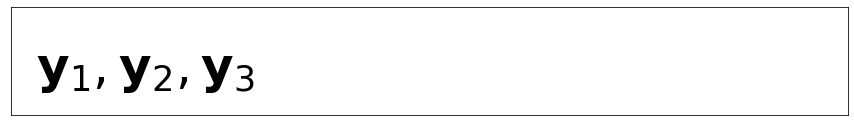

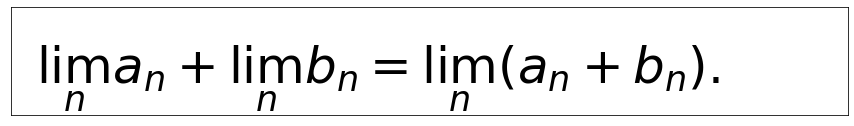

ValueError: 
W\mathbf {r} ={\boldsymbol {\omega }}\times \mathbf {r} 
               ^
Unknown symbol: \boldsymbol, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

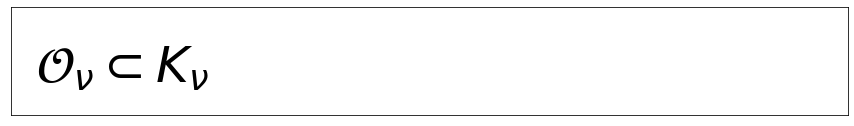

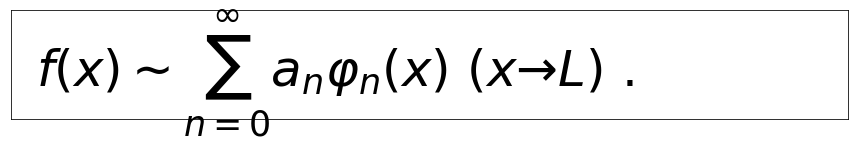

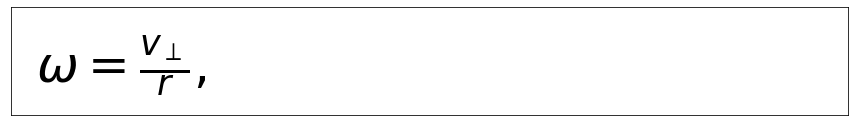

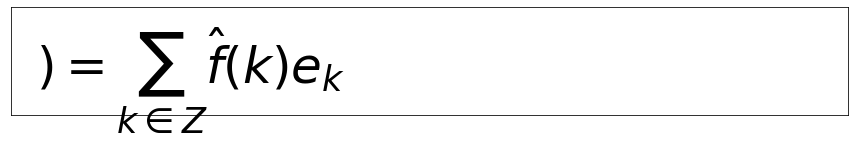

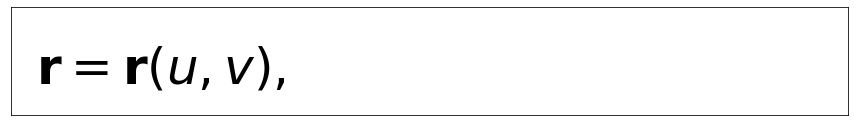

ValueError: 
\textstyle {\frac {4n-2}{n+1}}C_{n-1}=C_{n}.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

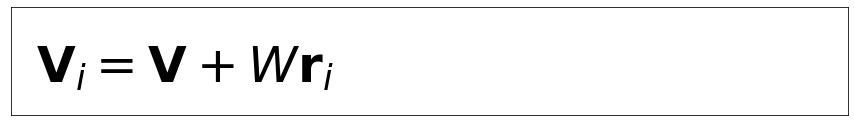

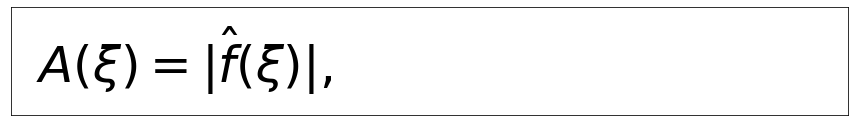

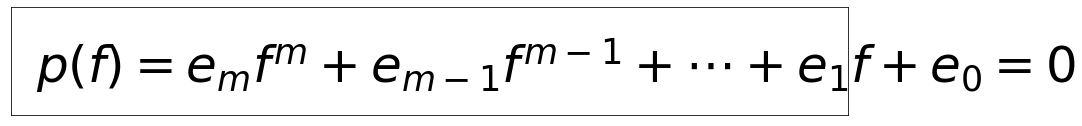

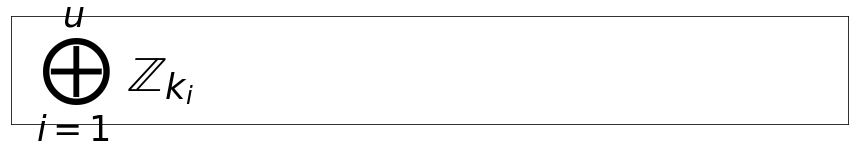

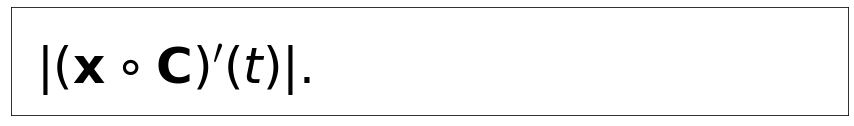

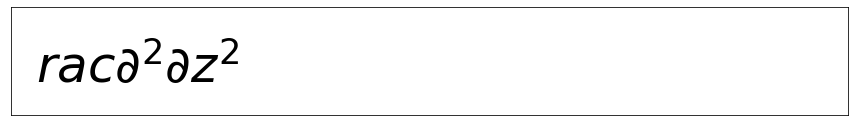

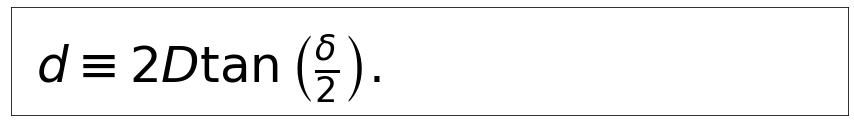

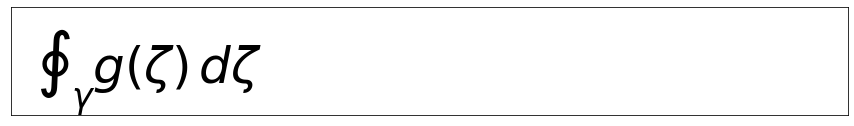

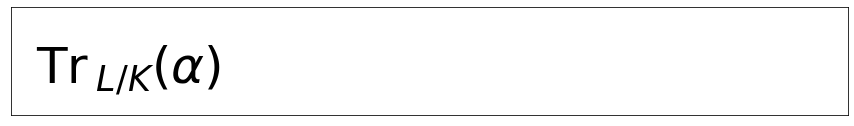

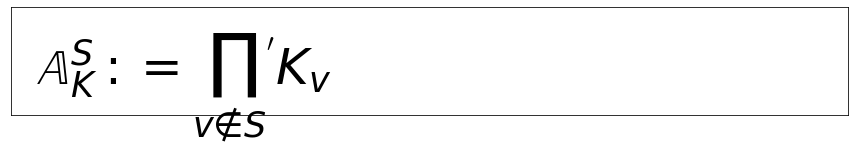

ValueError: 
\textstyle \sum _{k=1}^{\infty }f(k)
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

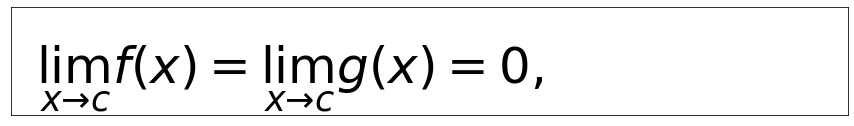

ValueError: 
\mathbf {a} _{\perp }={\boldsymbol {\alpha }}\times \mathbf {r} .
                       ^
Unknown symbol: \boldsymbol, found '\'  (at char 23), (line:1, col:24)

<Figure size 1080x144 with 1 Axes>

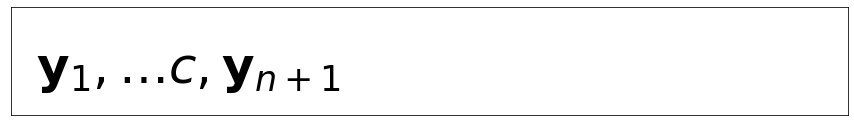

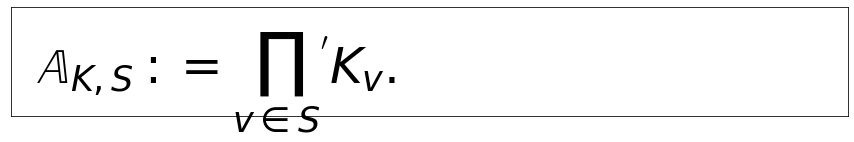

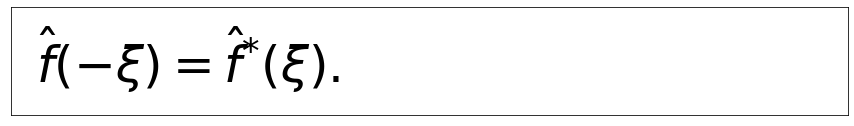

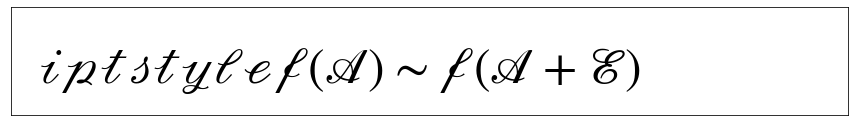

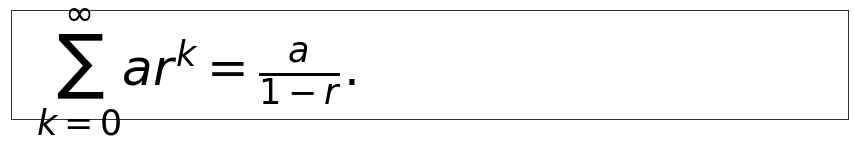

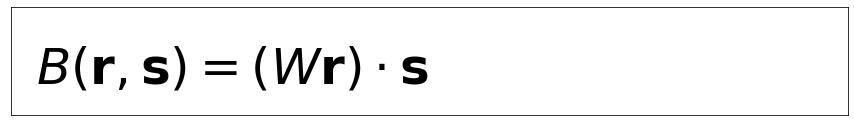

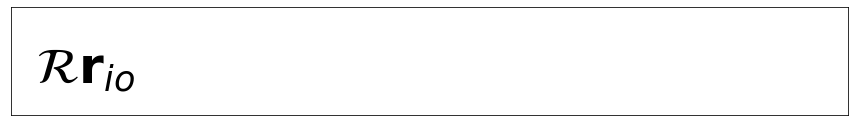

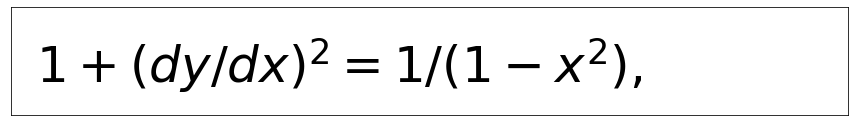

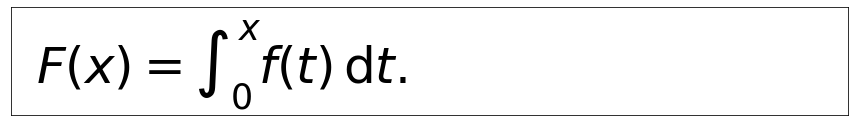

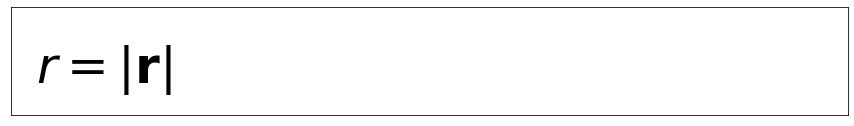

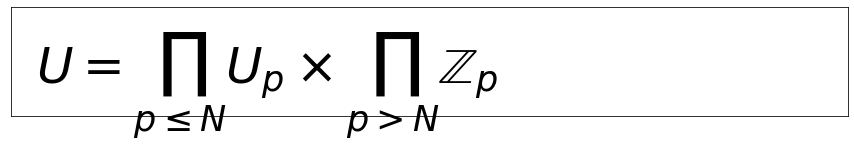

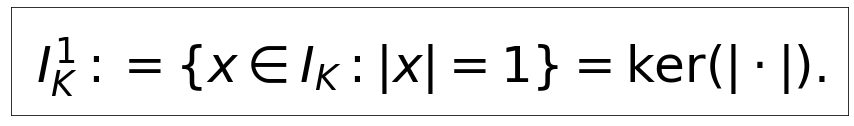

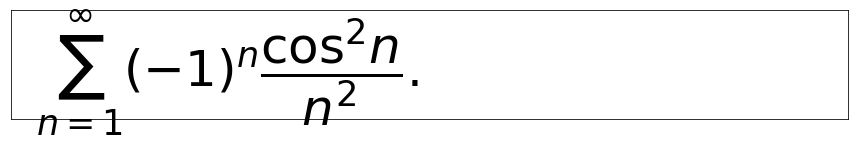

ValueError: 
I_{R}{\boldsymbol {\omega }}_{R}=\mathbf {0} ,
      ^
Unknown symbol: \boldsymbol, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

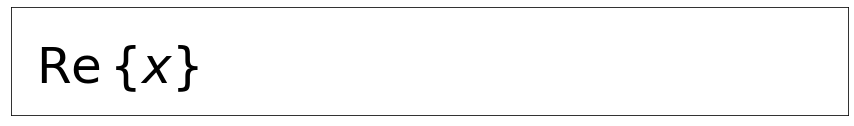

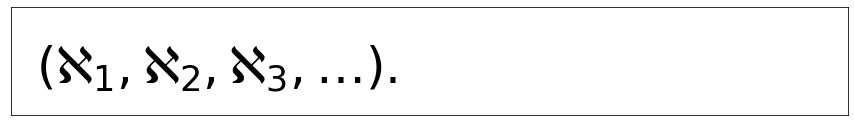

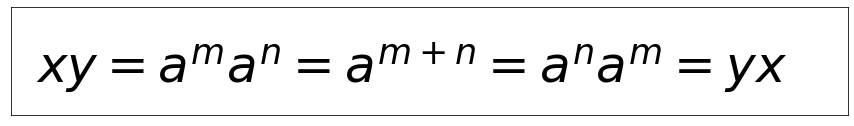

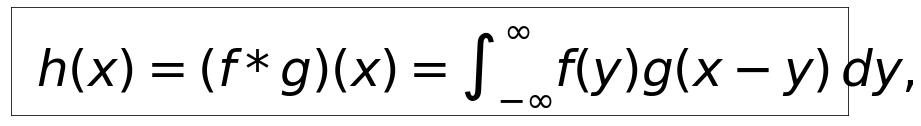

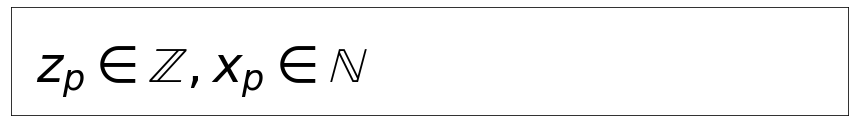

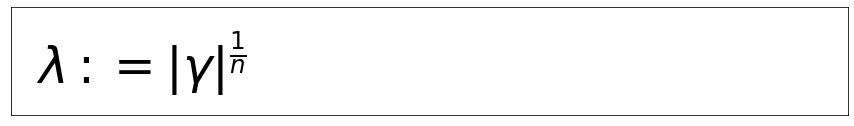

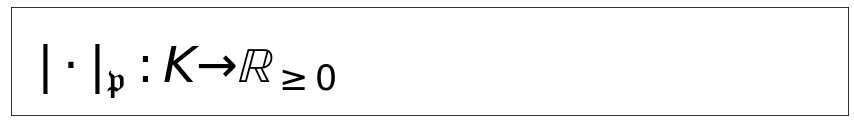

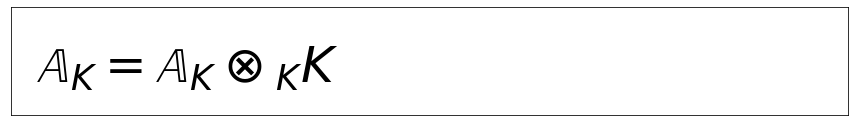

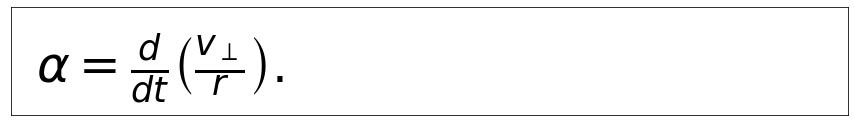

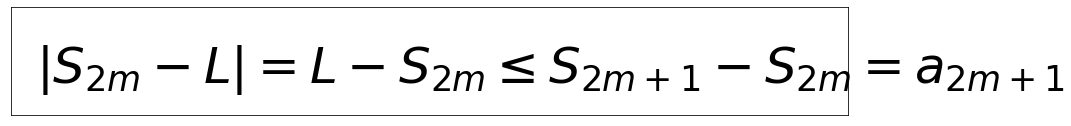

ValueError: 
F(x)={\tfrac {x^{n+1}}{n+1}}+c
      ^
Unknown symbol: \tfrac, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

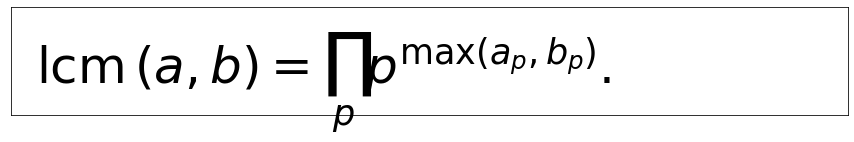

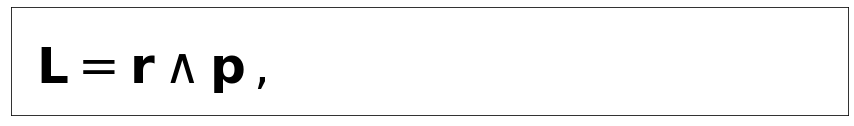

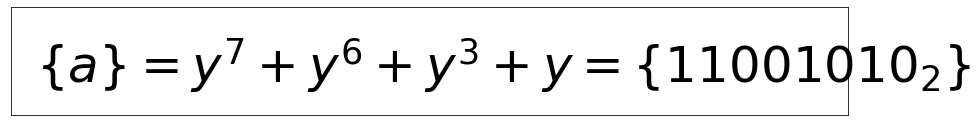

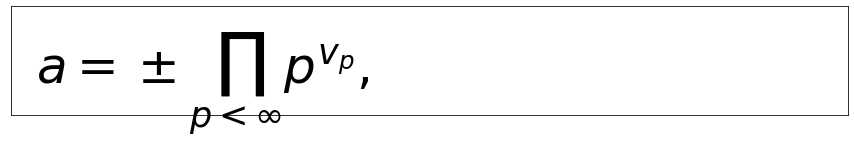

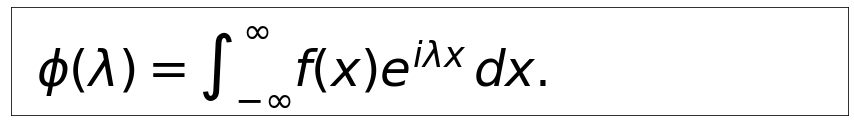

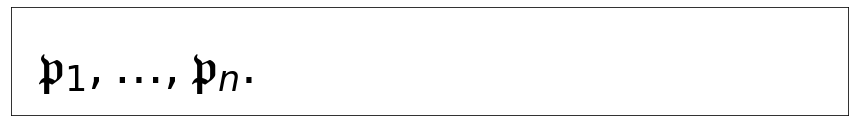

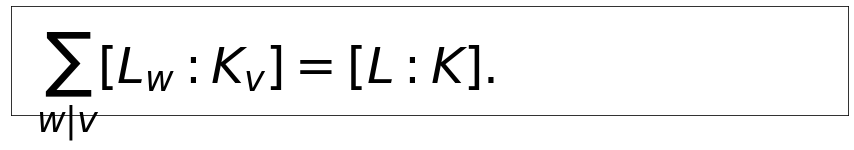

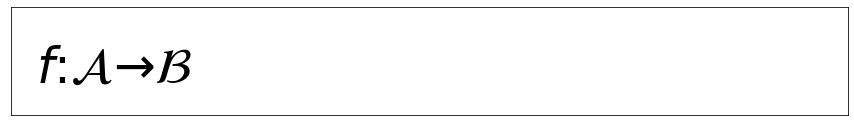

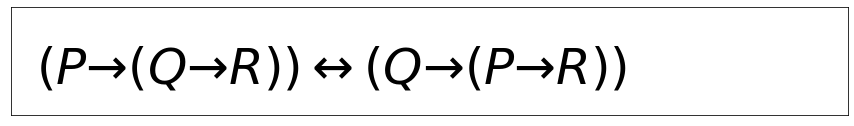

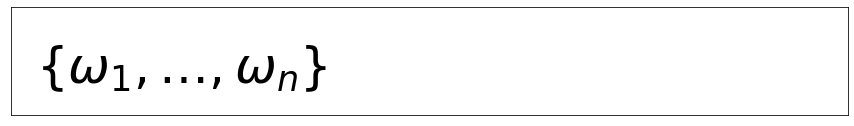

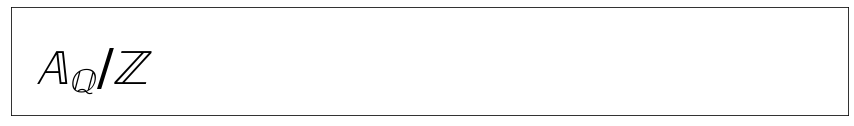

ValueError: 
R=I+W\cdot dt+{\tfrac {1}{2}}(W\cdot dt)^{2}+\cdots 
               ^
Unknown symbol: \tfrac, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

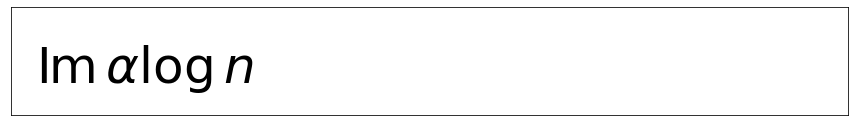

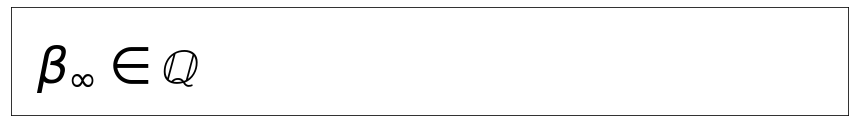

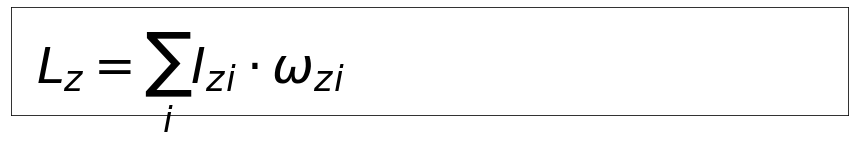

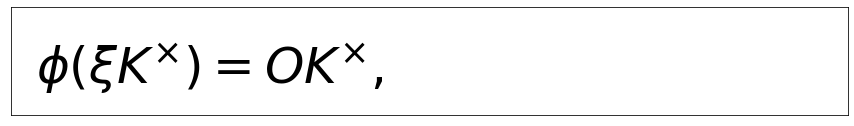

ValueError: 
E(n,0)=0\qquad {\mbox{for }}n>0
                ^
Unknown symbol: \mbox, found '\'  (at char 16), (line:1, col:17)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\gcd(a,b)=\sum _{k|a{\text{ and }}k|b}\varphi (k).
                     ^
Unknown symbol: \text, found '\'  (at char 21), (line:1, col:22)

<Figure size 1080x144 with 1 Axes>

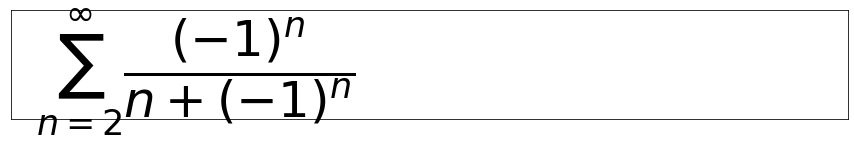

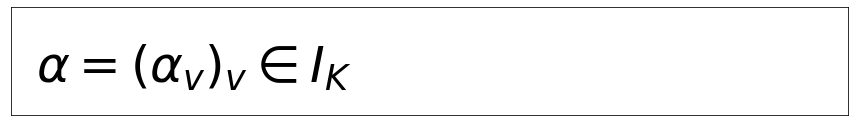

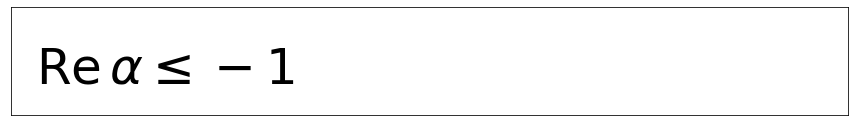

ValueError: 
{\hat {f}}(\xi )\to 0{\text{ as }}|\xi |\to \infty .
                      ^
Unknown symbol: \text, found '\'  (at char 22), (line:1, col:23)

<Figure size 1080x144 with 1 Axes>

ValueError: 
(P\lor Q)\Leftrightarrow (Q\lor P)
  ^
Unknown symbol: \lor, found '\'  (at char 2), (line:1, col:3)

<Figure size 1080x144 with 1 Axes>

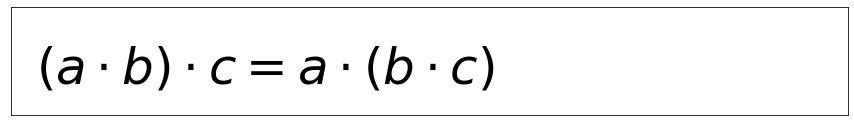

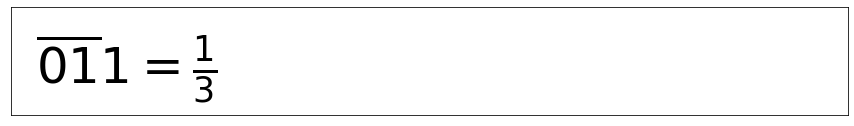

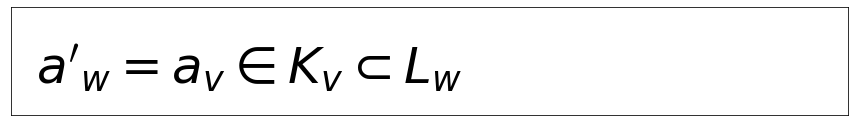

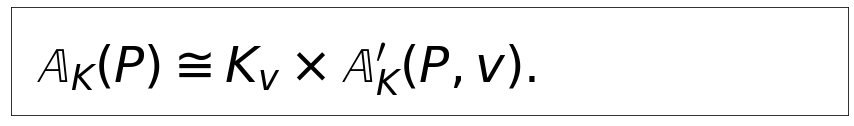

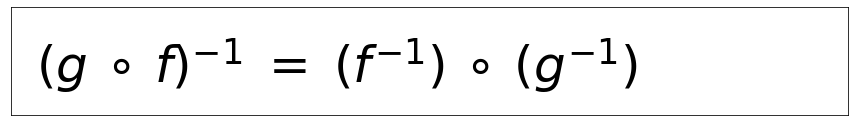

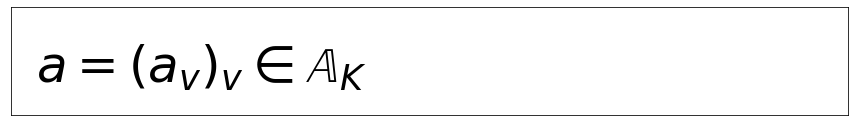

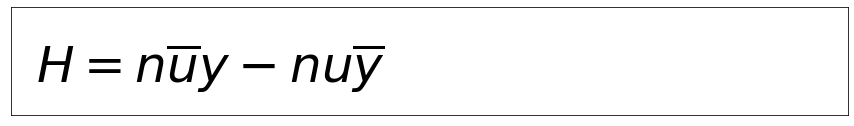

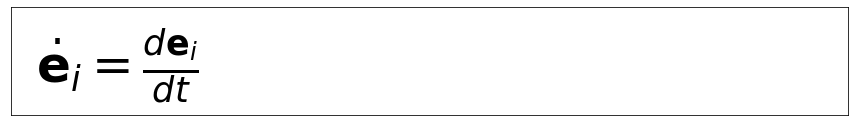

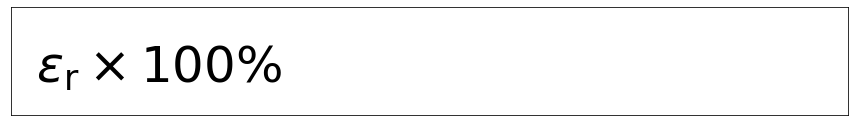

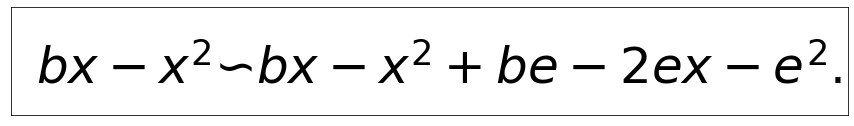

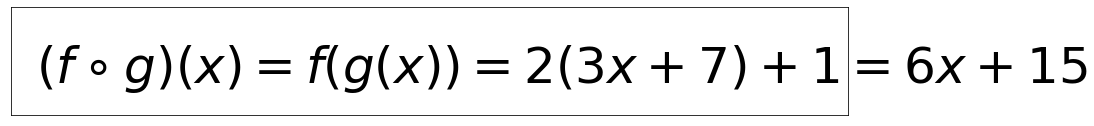

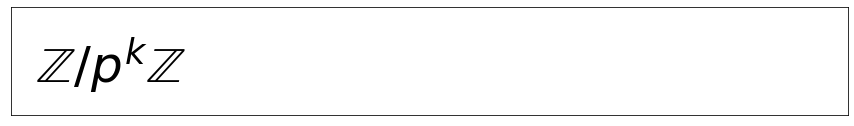

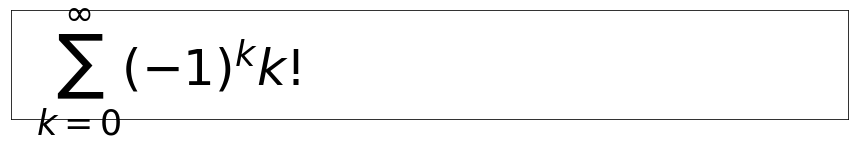

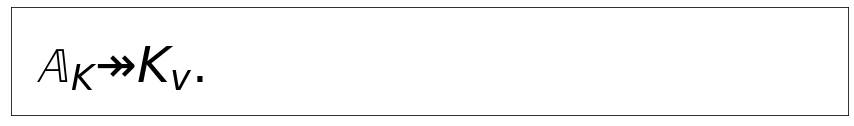

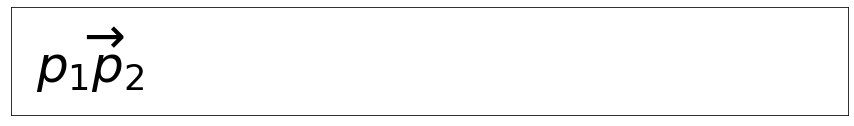

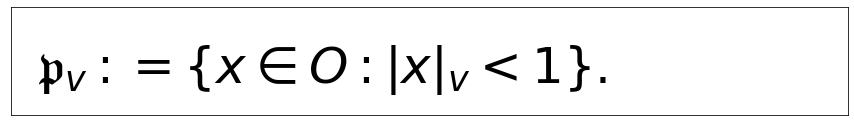

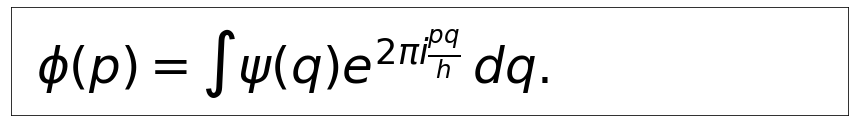

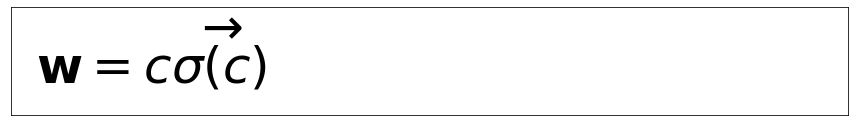

ValueError: 
ft|\mathbf {k} \right|=k={\omega  \over c}={2\pi  \over \lambda }
               ^
Unknown symbol: \right, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

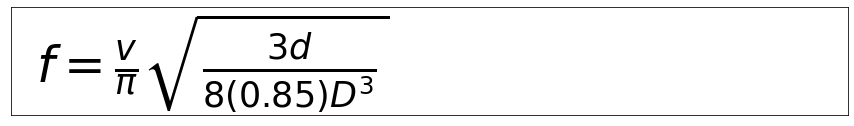

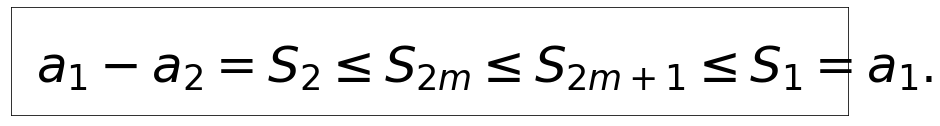

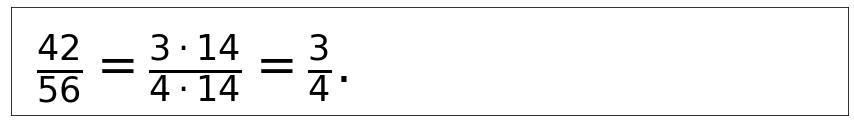

ValueError: 
(AB)^{\text{T}}=B^{\text{T}}A^{\text{T}}
      ^
Unknown symbol: \text, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

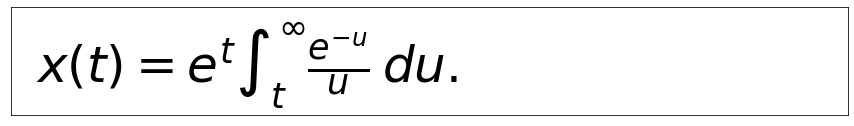

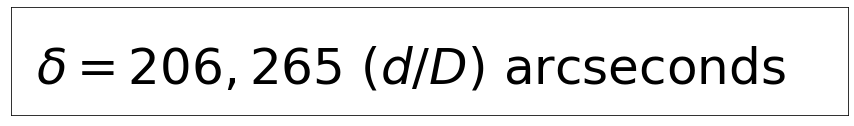

ValueError: 
\textstyle \prod _{v}{\mathfrak {p}}_{v}^{v(\xi '_{v})}=O.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

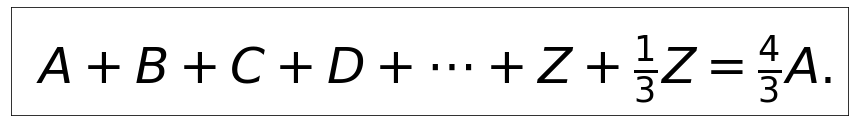

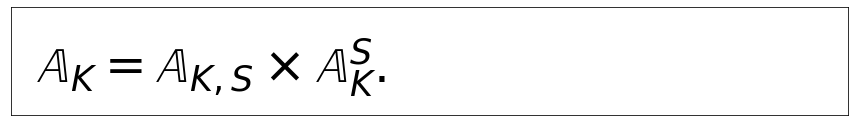

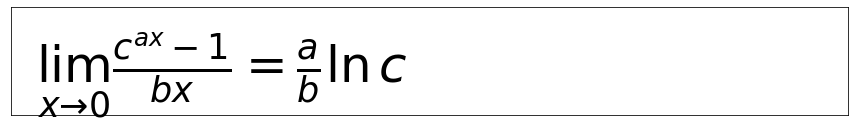

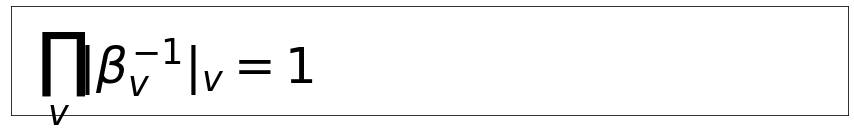

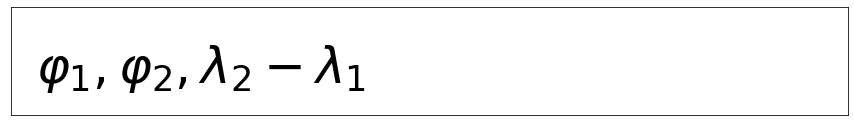

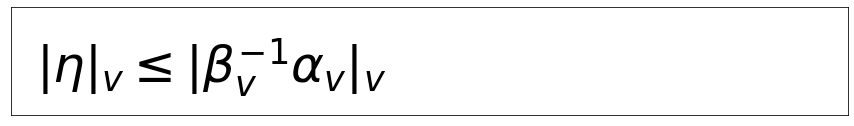

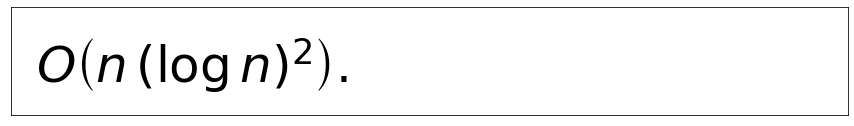

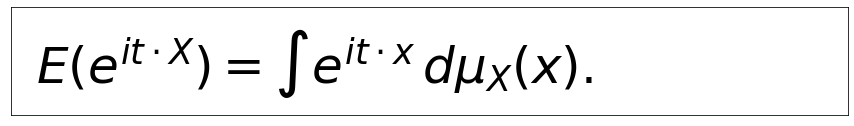

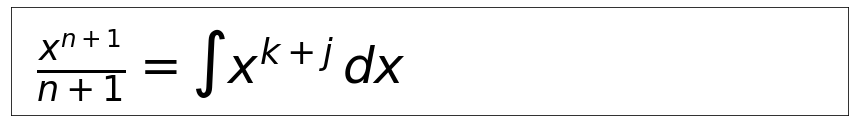

ValueError: 
{\boldsymbol {\tau }}=mr^{2}{\boldsymbol {\alpha }},
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

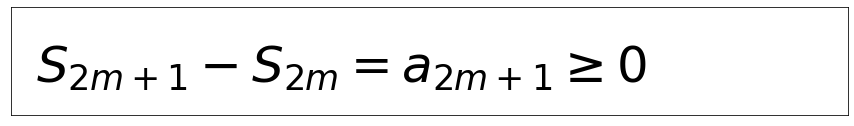

ValueError: 
{\frac {1}{2(2N+1)}}{2N+2 \choose N+1}=C_{N}
                          ^
Unknown symbol: \choose, found '\'  (at char 26), (line:1, col:27)

<Figure size 1080x144 with 1 Axes>

ValueError: 
X\in {\text{Ob}}(\mathbf {A} )
      ^
Unknown symbol: \text, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

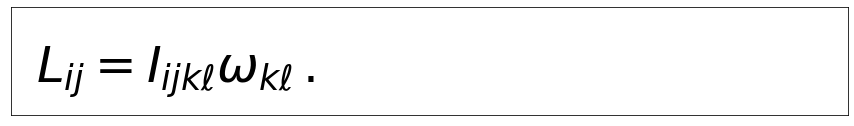

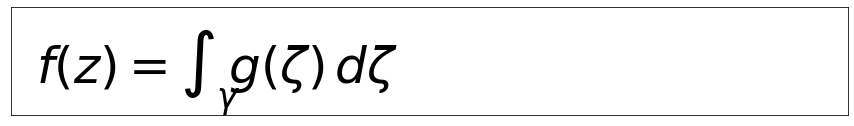

ValueError: 
\operatorname {Ei} \left({\tfrac {1}{t}}\right)
                          ^
Unknown symbol: \tfrac, found '\'  (at char 26), (line:1, col:27)

<Figure size 1080x144 with 1 Axes>

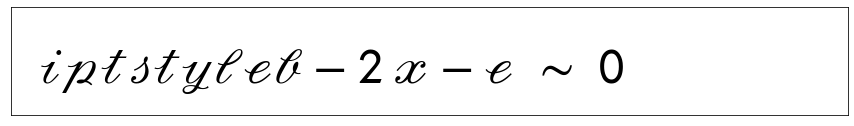

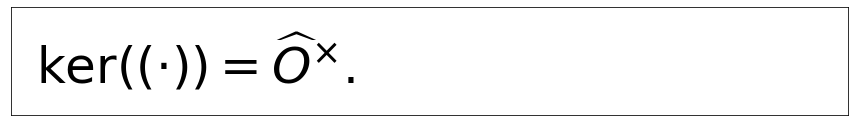

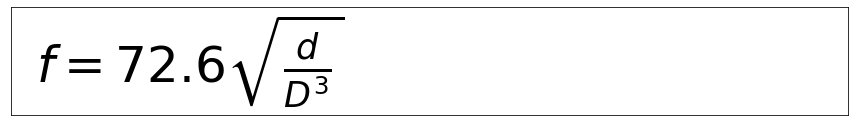

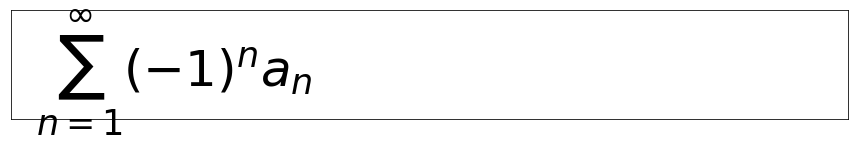

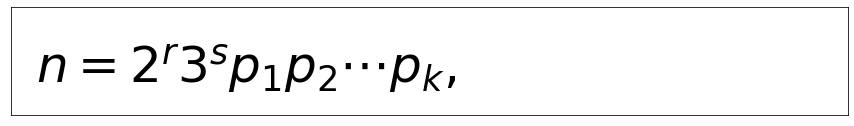

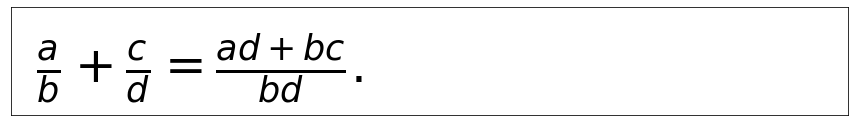

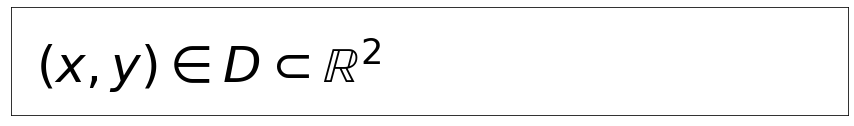

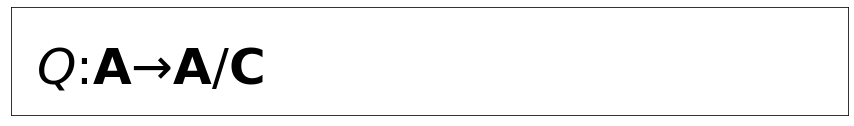

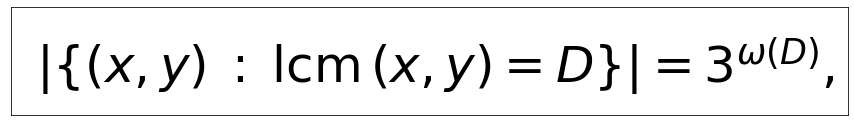

ValueError: 
{\tilde {\Phi }}:\mathbb {A} _{\mathbb {Q} ,{\text{fin}}}\to M
                                             ^
Unknown symbol: \text, found '\'  (at char 45), (line:1, col:46)

<Figure size 1080x144 with 1 Axes>

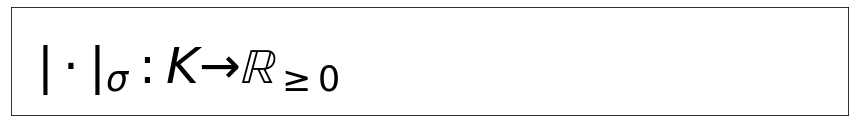

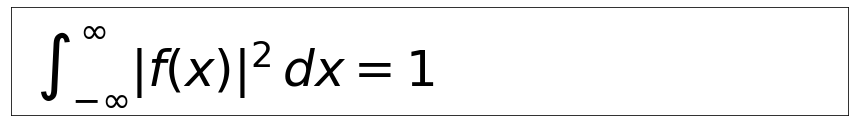

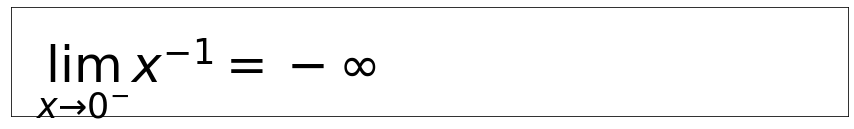

ValueError: 
{\text{Spec}}({\mathcal {O}}_{L})
 ^
Unknown symbol: \text, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

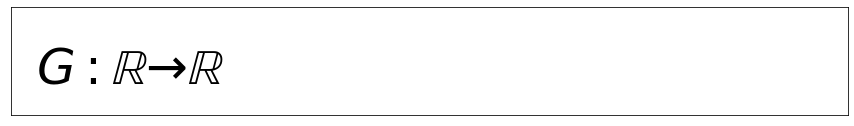

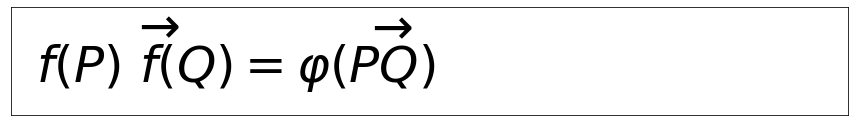

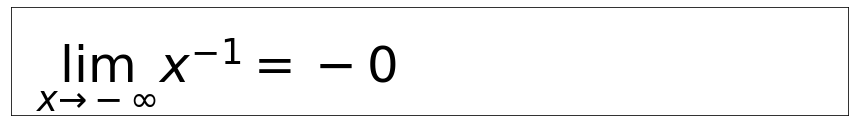

ValueError: 
\left[{\begin{array}{ccc|c}0&\cdots &0&1\end{array}}\right]
       ^
Unknown symbol: \begin, found '\'  (at char 7), (line:1, col:8)

<Figure size 1080x144 with 1 Axes>

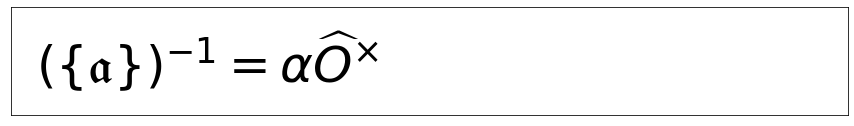

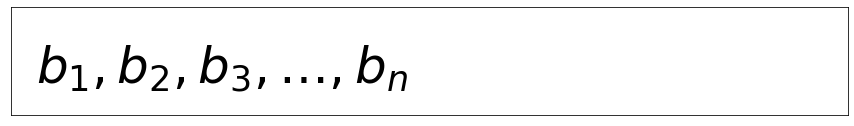

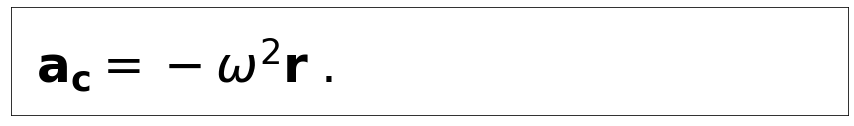

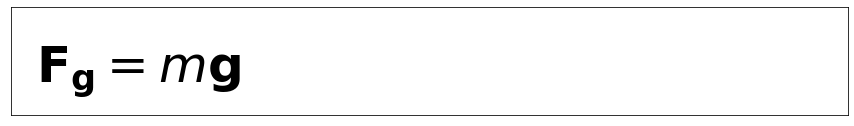

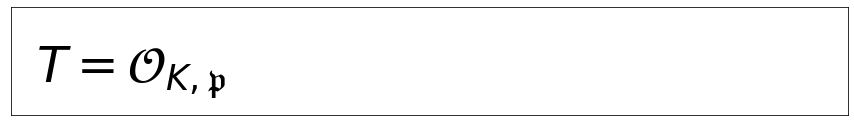

ValueError: 
left|{\alpha  \choose k}\right|\geq 1
              ^
Unknown symbol: \choose, found '\'  (at char 14), (line:1, col:15)

<Figure size 1080x144 with 1 Axes>

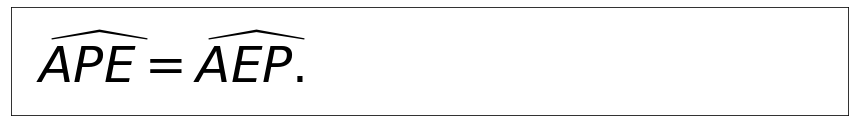

ValueError: 
\alpha \in I_{K,{\text{fin}}}.
                 ^
Unknown symbol: \text, found '\'  (at char 17), (line:1, col:18)

<Figure size 1080x144 with 1 Axes>

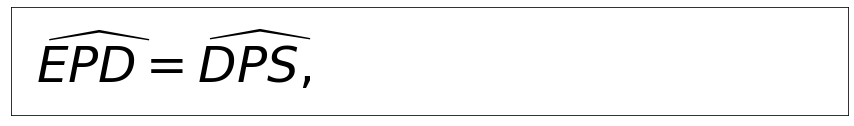

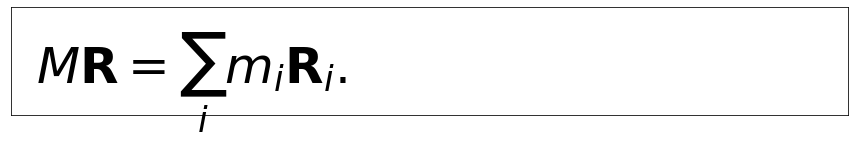

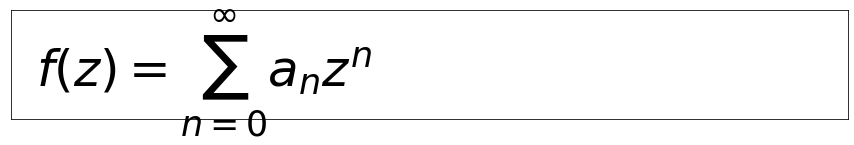

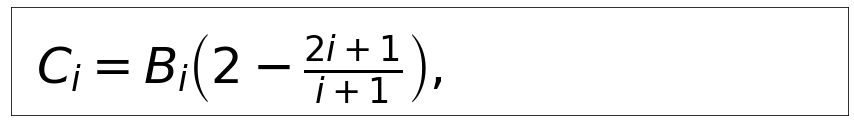

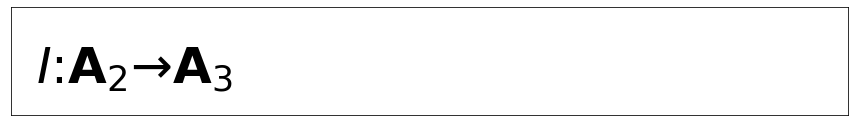

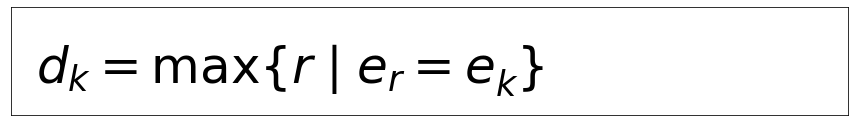

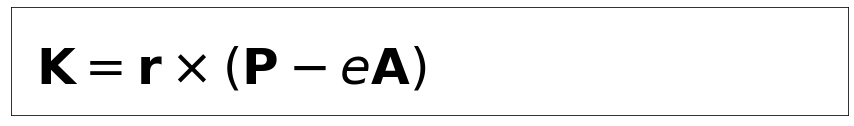

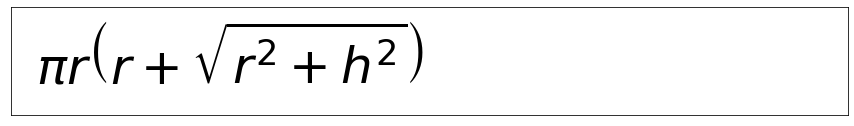

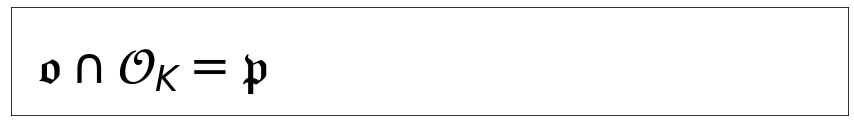

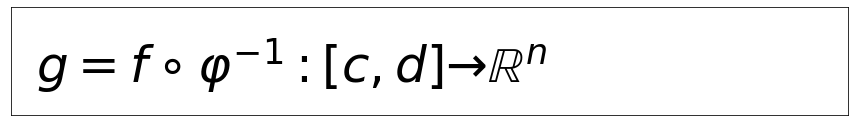

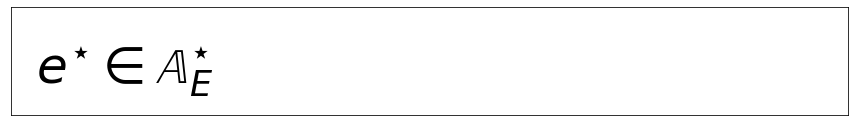

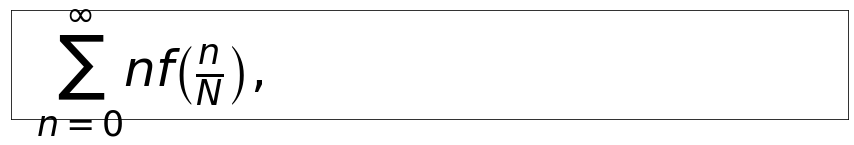

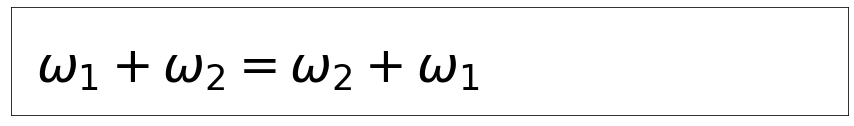

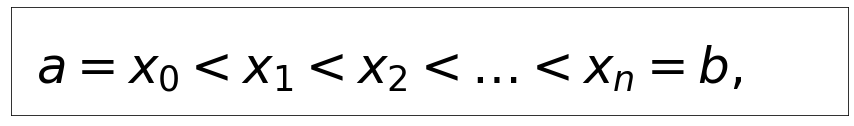

ValueError: 
{\boldsymbol {\omega }}={\frac {1}{2}}\nabla \times \mathbf {v} 
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

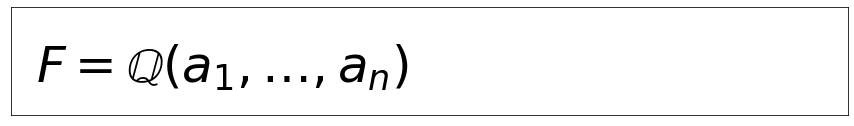

ValueError: 
\sum _{i}I_{i}{\boldsymbol {\omega }}_{i}=\mathbf {0} ,
               ^
Unknown symbol: \boldsymbol, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\lim _{h\to 0}{f(a+h)-f(a) \over {h}}.
                           ^
Unknown symbol: \over, found '\'  (at char 27), (line:1, col:28)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\textstyle \prod _{v}|\alpha _{v}|_{v}>C
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

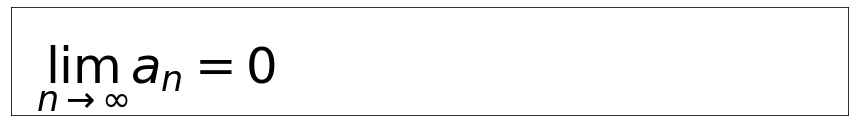

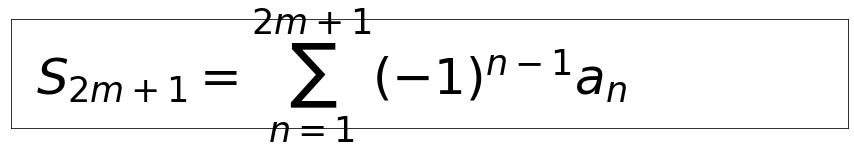

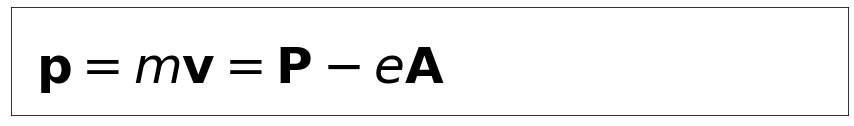

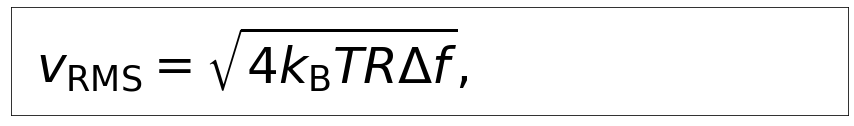

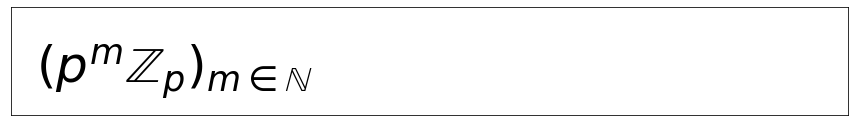

ValueError: 
\textstyle \prod _{v}|\alpha _{v}|_{v}>C,
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

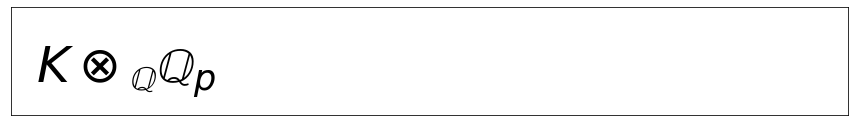

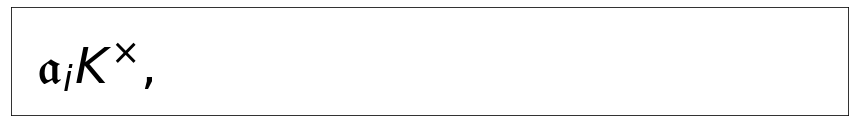

ValueError: 
\textstyle B_{n}={2n \choose n}
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

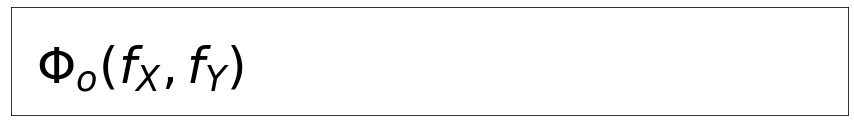

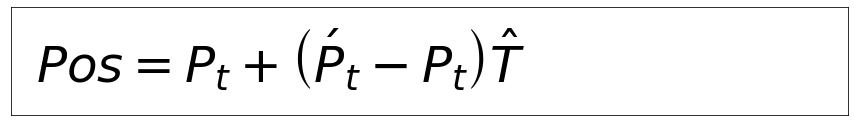

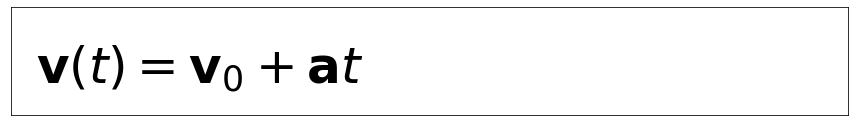

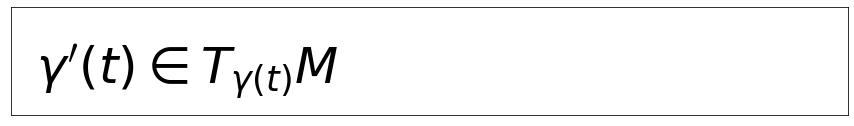

ValueError: 
{\mathfrak {p}}\in {\text{Spec}}({\mathcal {O}}_{K})
                    ^
Unknown symbol: \text, found '\'  (at char 20), (line:1, col:21)

<Figure size 1080x144 with 1 Axes>

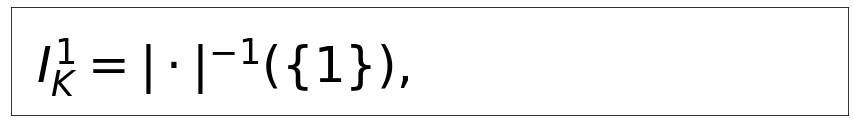

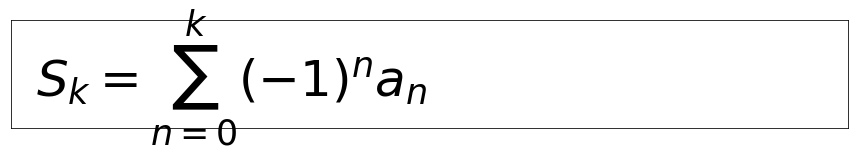

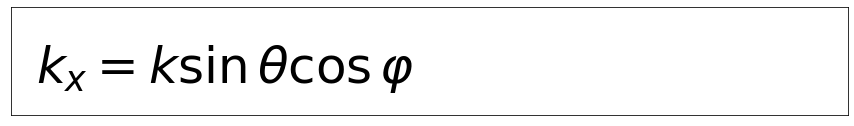

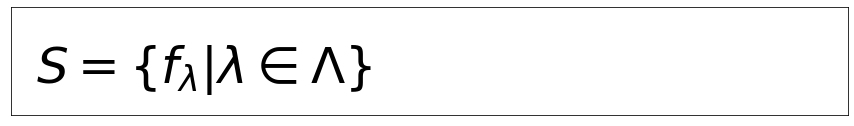

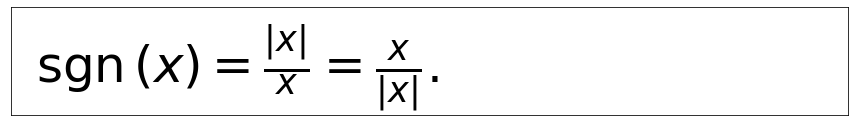

ValueError: 
\mathbf {v} _{\perp }={\boldsymbol {\omega }}\times \mathbf {r} 
                       ^
Unknown symbol: \boldsymbol, found '\'  (at char 23), (line:1, col:24)

<Figure size 1080x144 with 1 Axes>

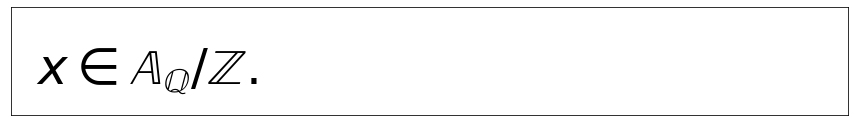

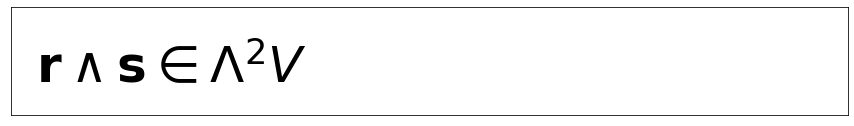

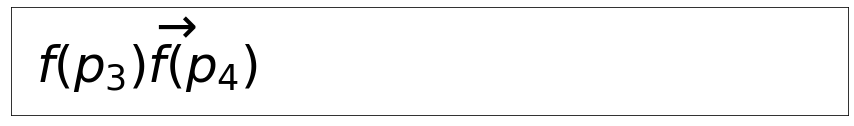

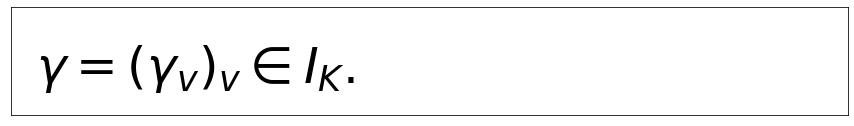

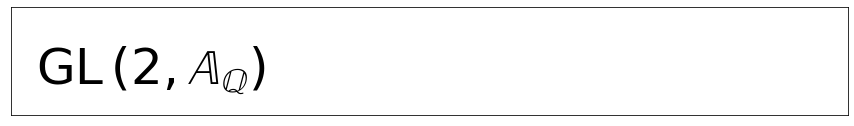

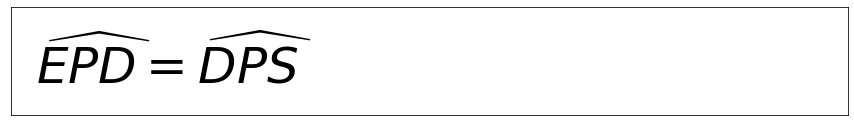

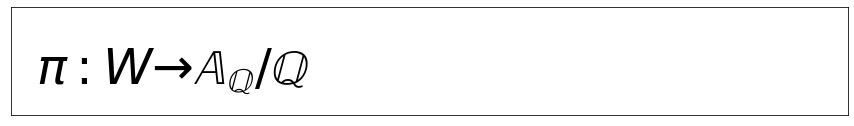

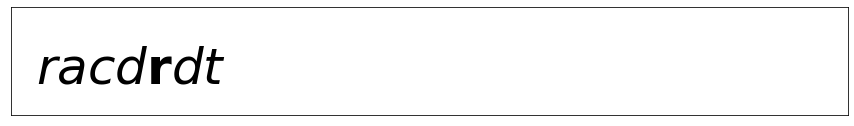

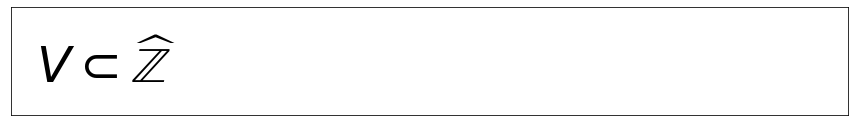

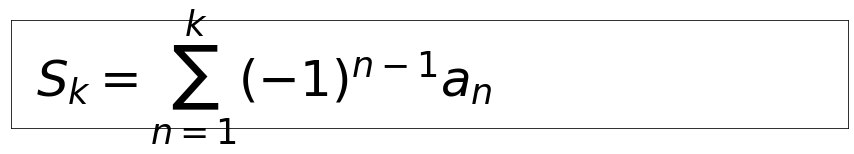

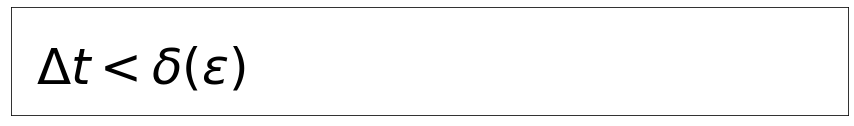

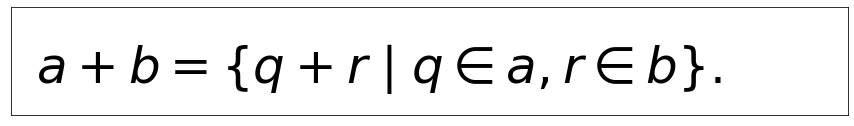

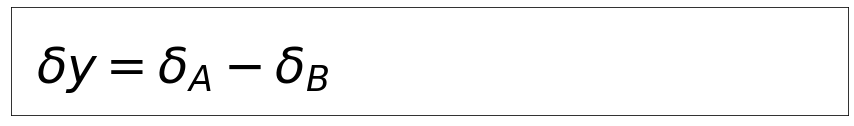

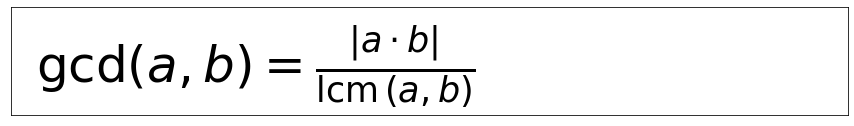

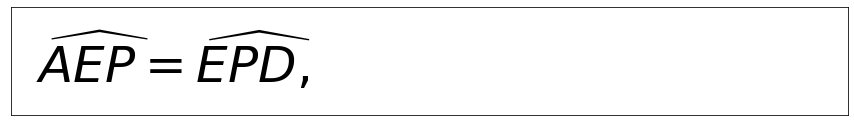

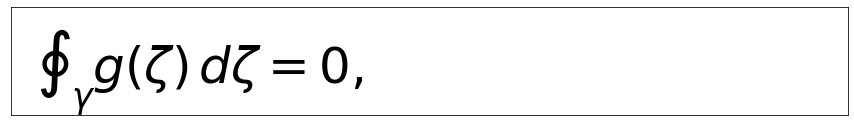

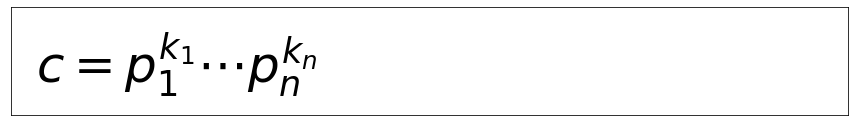

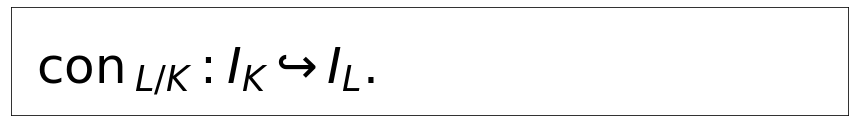

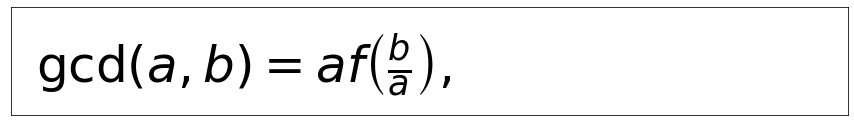

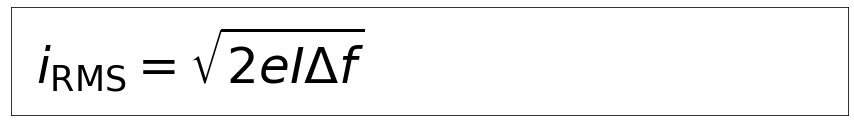

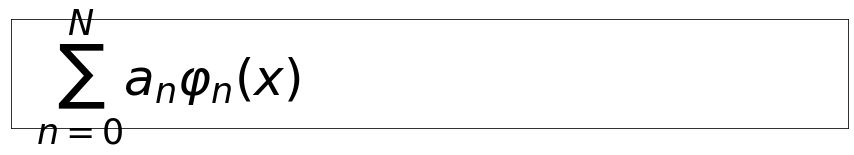

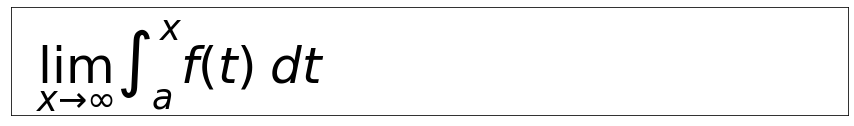

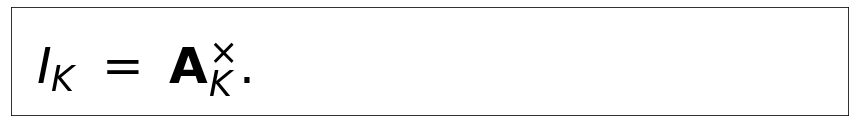

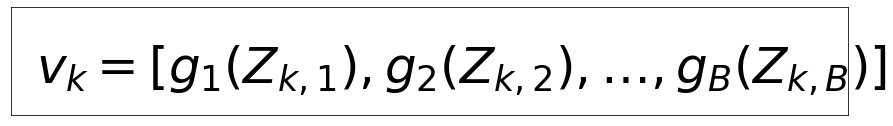

ValueError: 
L=\lim _{\stackrel {x\to p}{x\in S}}f(x).
         ^
Unknown symbol: \stackrel, found '\'  (at char 9), (line:1, col:10)

<Figure size 1080x144 with 1 Axes>

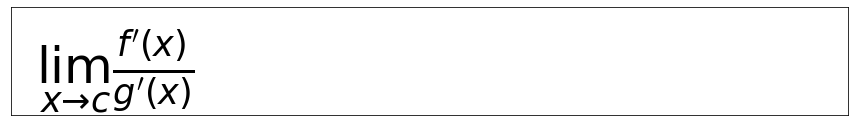

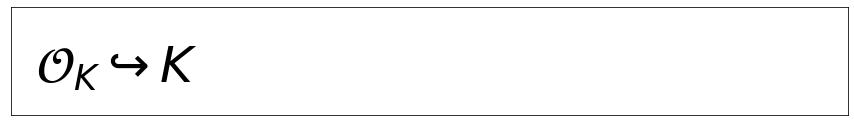

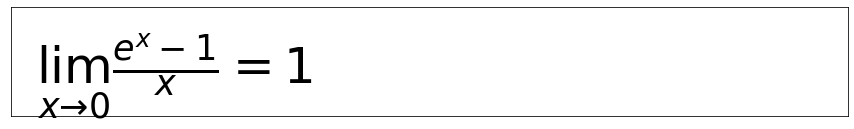

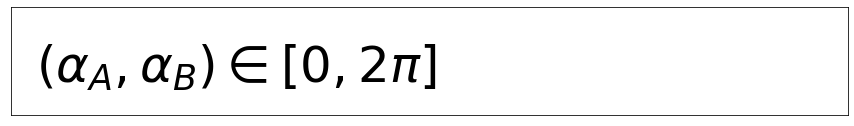

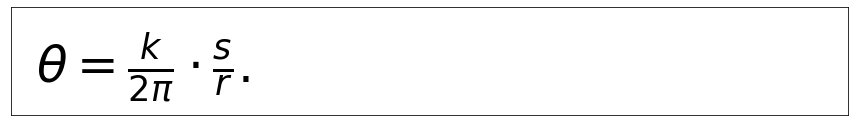

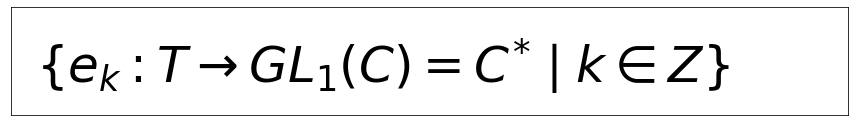

ValueError: 
a\mapsto {\begin{bmatrix}1&a\\0&1\end{bmatrix}}
          ^
Unknown symbol: \begin, found '\'  (at char 10), (line:1, col:11)

<Figure size 1080x144 with 1 Axes>

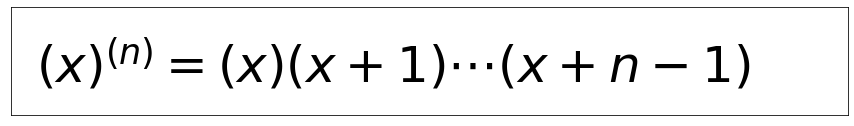

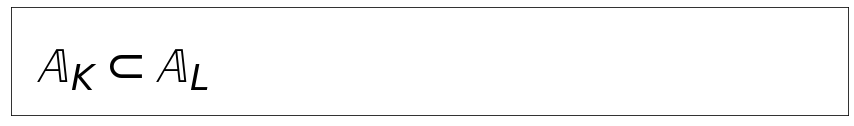

ValueError: 
\tau _{\text{true}}={\frac {d_{\text{spacing}}}{c}}
       ^
Unknown symbol: \text, found '\'  (at char 7), (line:1, col:8)

<Figure size 1080x144 with 1 Axes>

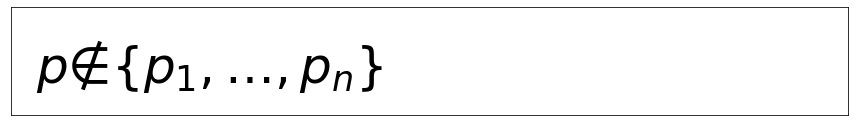

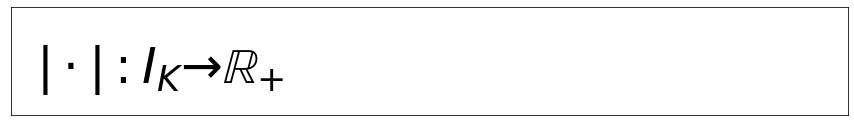

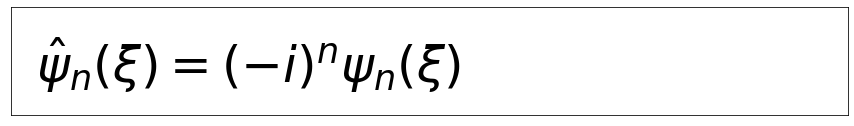

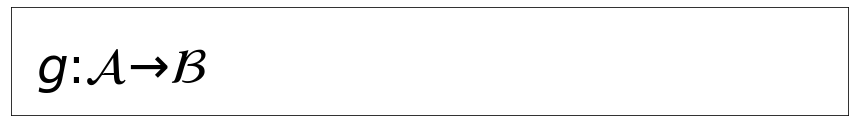

ValueError: 
\textstyle 1\cdot 1=1\,,\quad 1\cdot a=a\,,\quad a\cdot 1=a\,.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\mathbb {A} _{\mathbb {Q} ,{\text{fin}}}
                            ^
Unknown symbol: \text, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

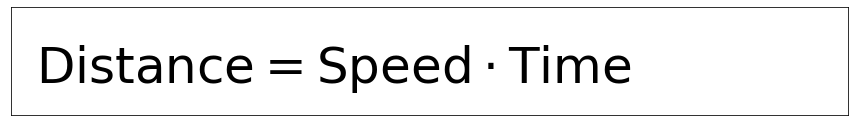

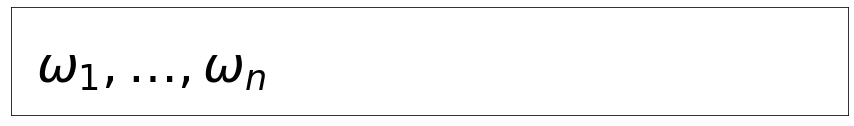

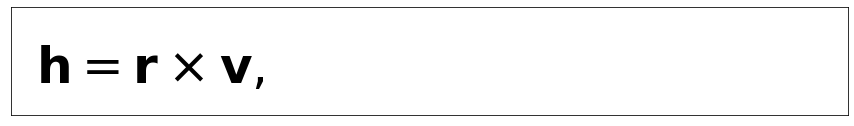

ValueError: 
\textstyle C_{n}={\frac {1}{n+1}}{2n \choose n}.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

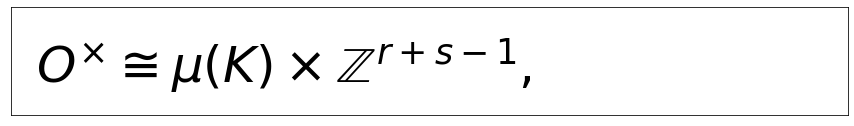

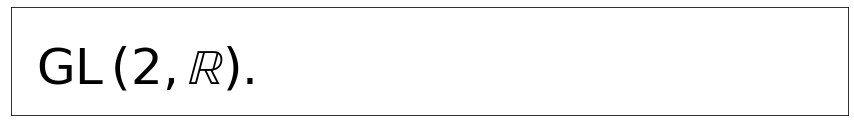

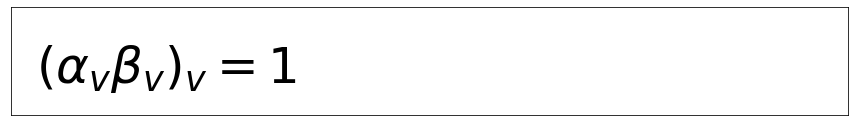

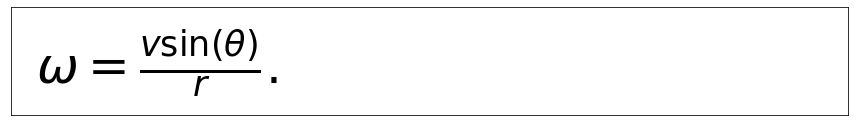

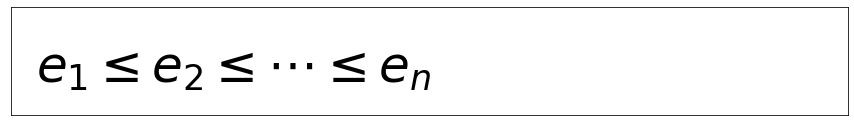

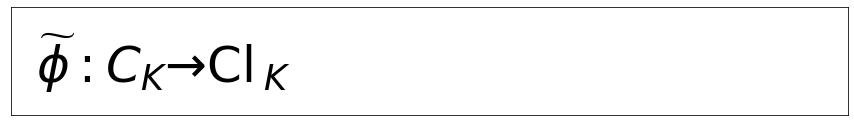

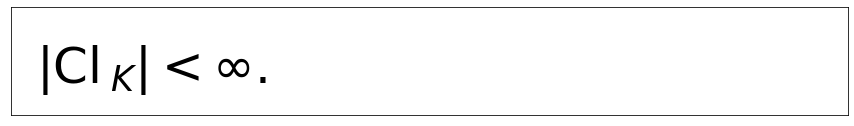

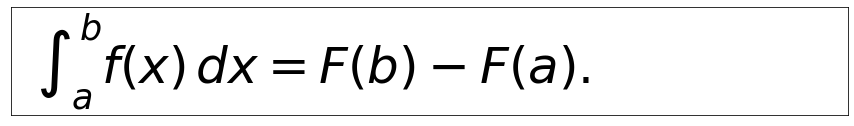

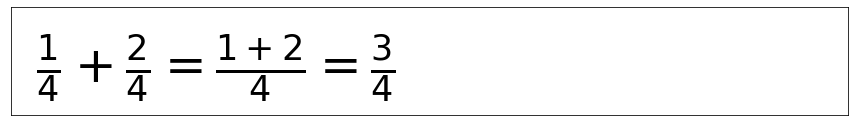

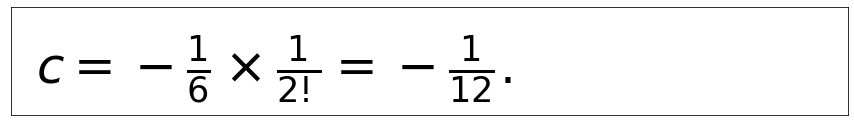

ValueError: 
(P\lor Q)\leftrightarrow (Q\lor P)
  ^
Unknown symbol: \lor, found '\'  (at char 2), (line:1, col:3)

<Figure size 1080x144 with 1 Axes>

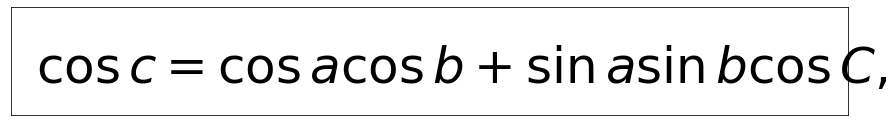

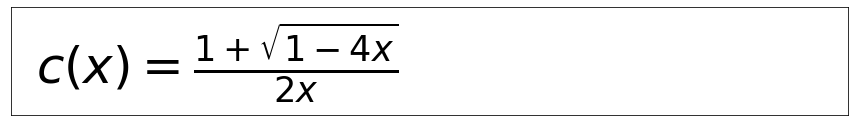

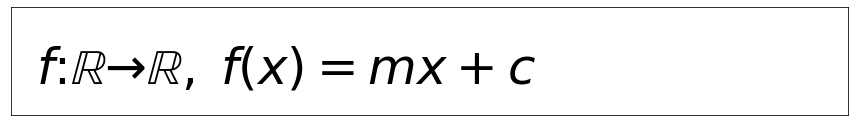

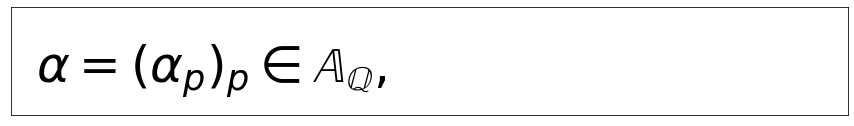

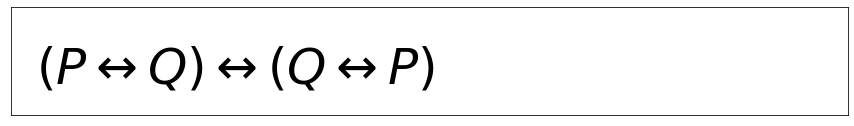

ValueError: 
0={\begin{bmatrix}0&0\\0&0\end{bmatrix}}
   ^
Unknown symbol: \begin, found '\'  (at char 3), (line:1, col:4)

<Figure size 1080x144 with 1 Axes>

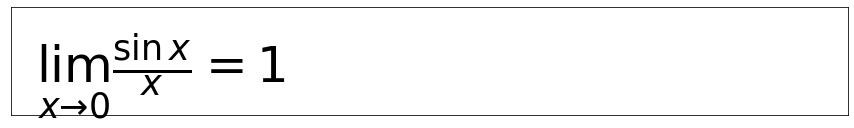

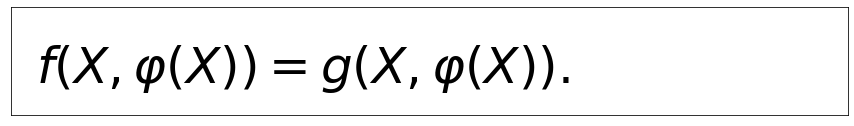

ValueError: 
{n-1+n+1 \choose n-1}={2n \choose n-1}={2n \choose n+1}
         ^
Unknown symbol: \choose, found '\'  (at char 9), (line:1, col:10)

<Figure size 1080x144 with 1 Axes>

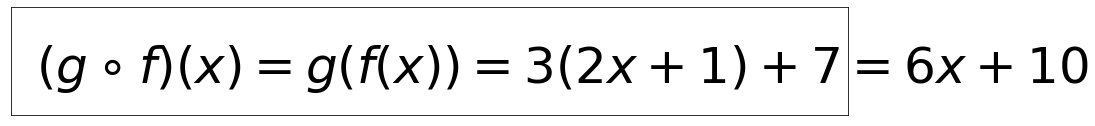

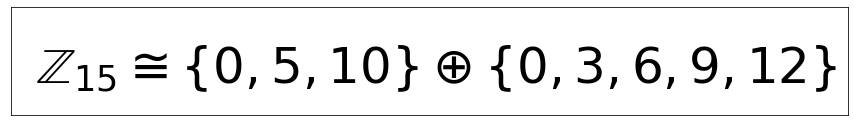

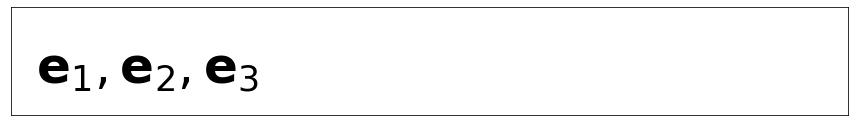

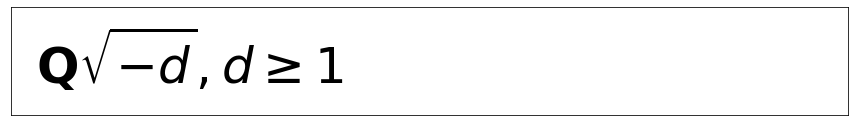

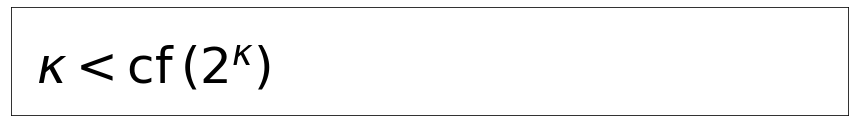

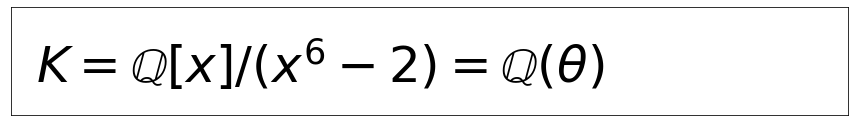

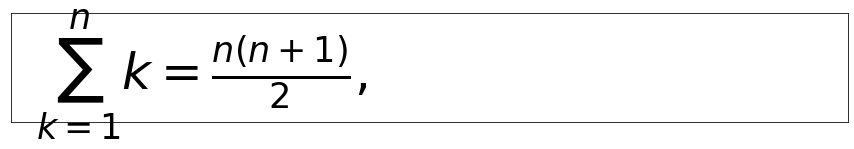

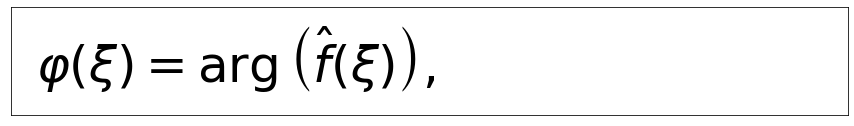

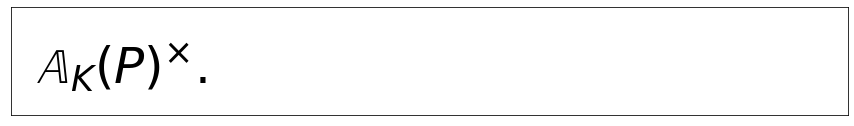

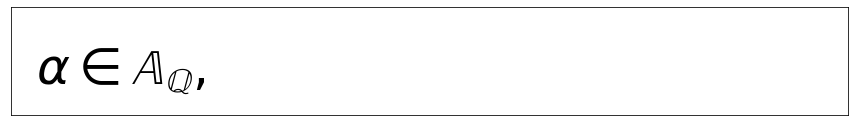

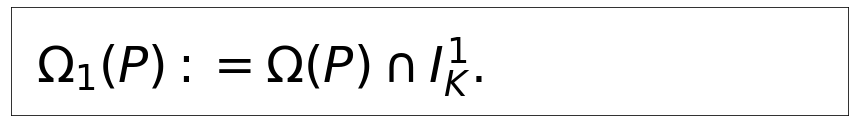

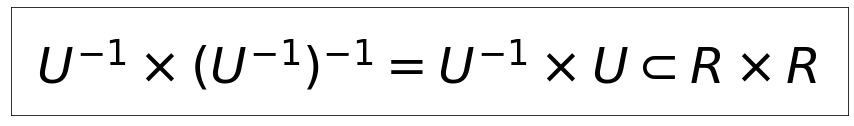

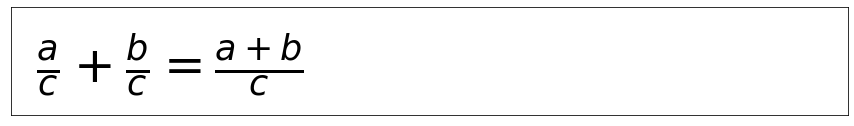

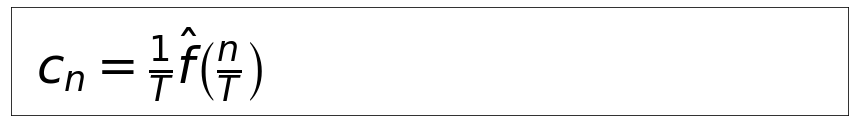

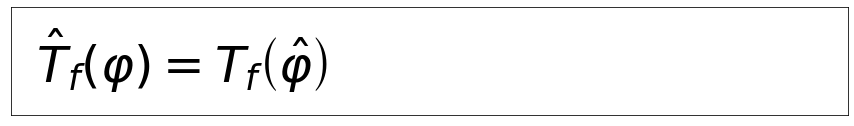

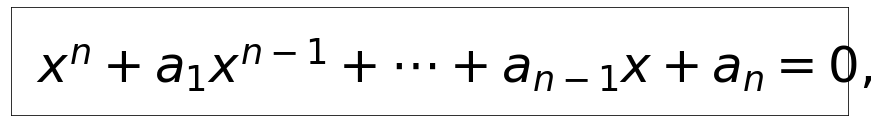

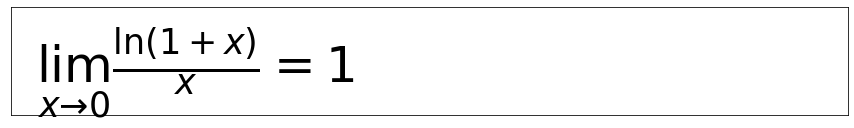

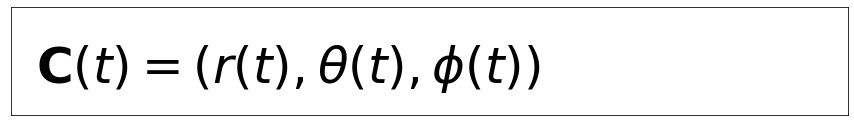

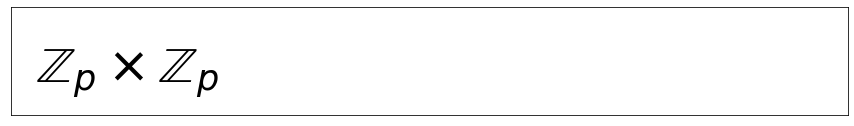

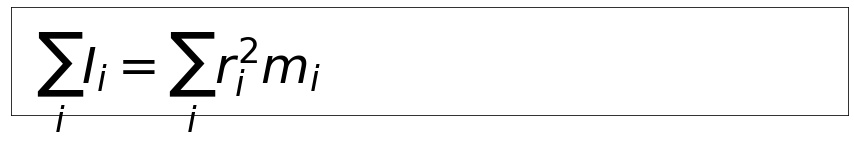

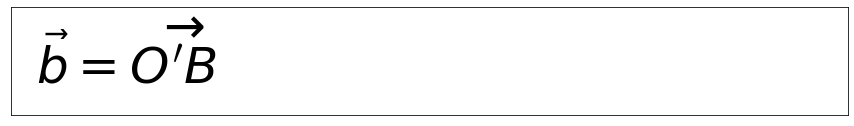

ValueError: 
{\tbinom {2n}{n+1}}={\tfrac {n}{n+1}}{\tbinom {2n}{n}}
 ^
Unknown symbol: \tbinom, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

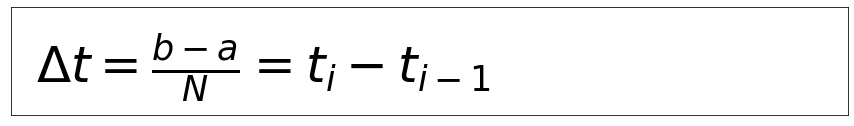

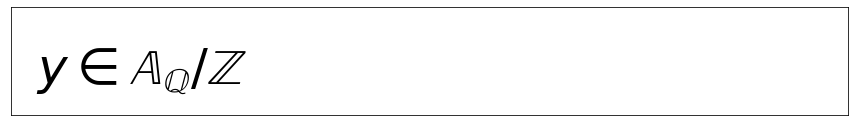

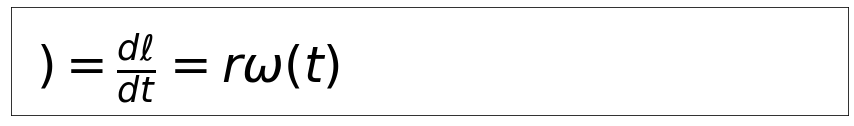

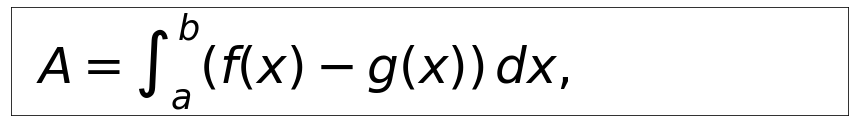

ValueError: 
\textstyle {\frac {n!}{k_{1}!\,k_{2}!\cdots k_{m}!}}
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

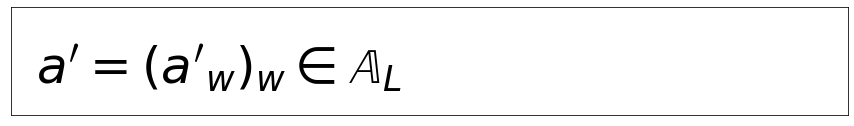

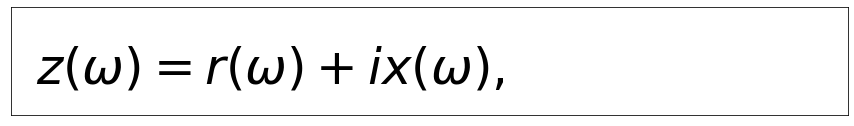

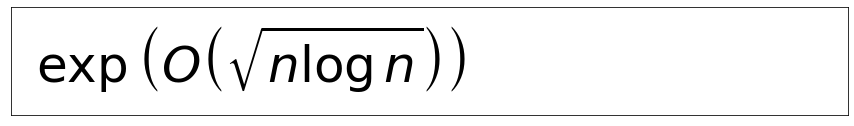

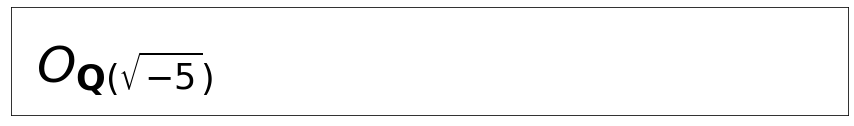

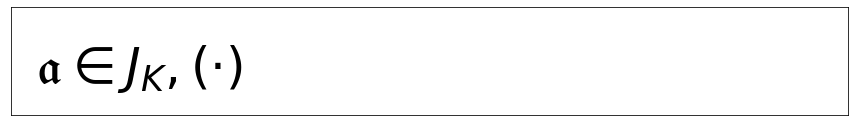

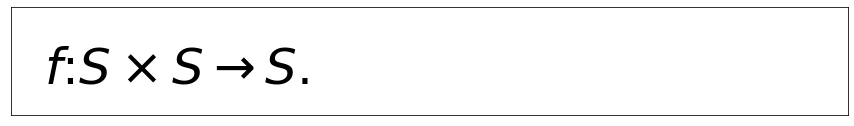

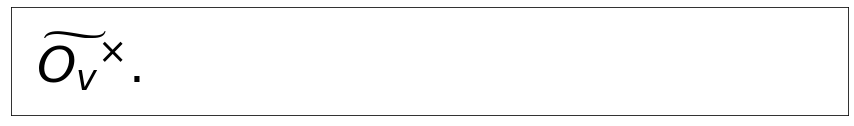

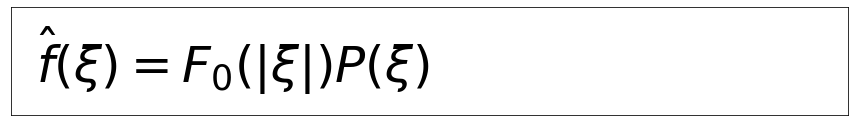

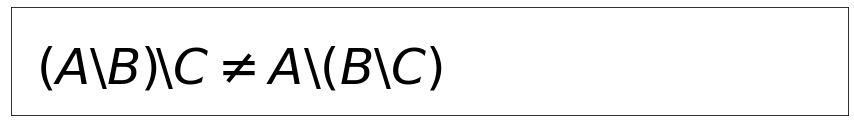

ValueError: 
\det {\begin{bmatrix}2\end{bmatrix}}=2
      ^
Unknown symbol: \begin, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

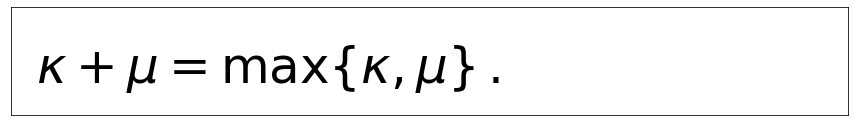

ValueError: 
l\equiv a_{p}{\bmod {p}}^{l_{p}}.
              ^
Unknown symbol: \bmod, found '\'  (at char 14), (line:1, col:15)

<Figure size 1080x144 with 1 Axes>

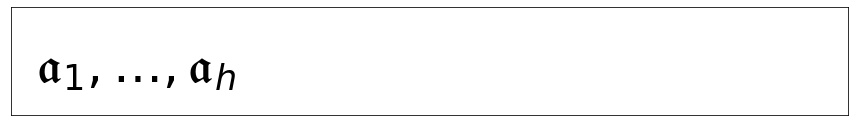

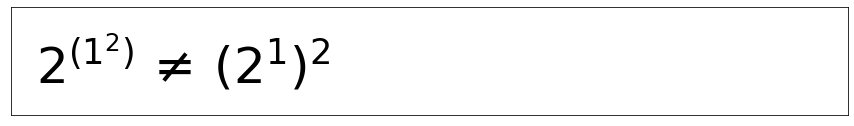

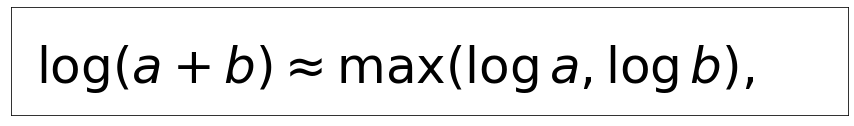

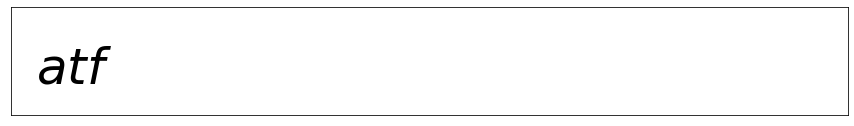

ValueError: 
AC=\varepsilon {\sqrt {1+{9 \over 4}a\,}}.
                            ^
Unknown symbol: \over, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

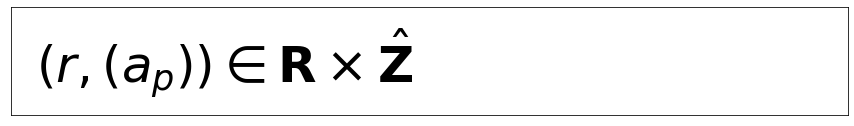

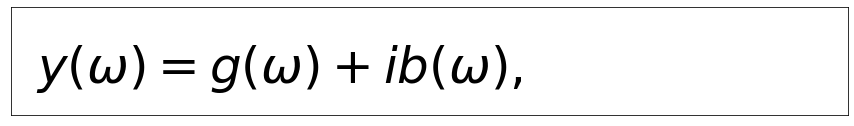

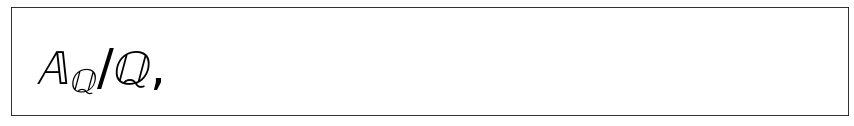

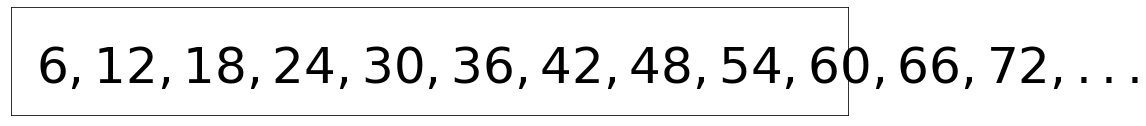

ValueError: 
{\begin{aligned}y&=x^{2}\\{\frac {dy}{dx}}&=2x.\end{aligned}}
 ^
Unknown symbol: \begin, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

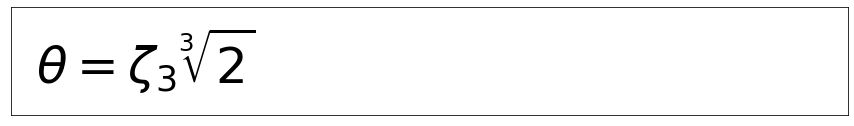

ValueError: 
\sum _{N=0}^{\infty }{\frac {1}{2(2N+1)}}{2N+2 \choose N+1}x^{N}
                                               ^
Unknown symbol: \choose, found '\'  (at char 47), (line:1, col:48)

<Figure size 1080x144 with 1 Axes>

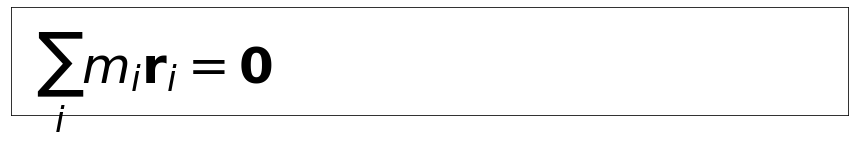

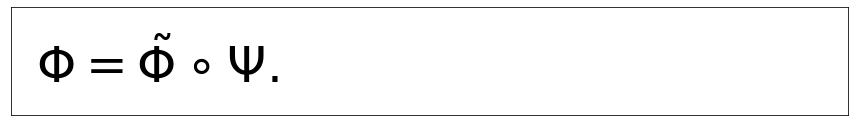

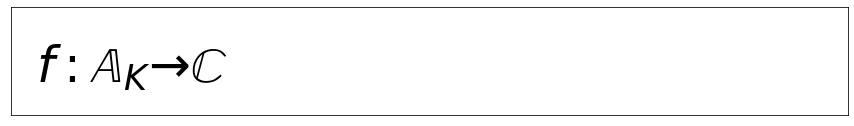

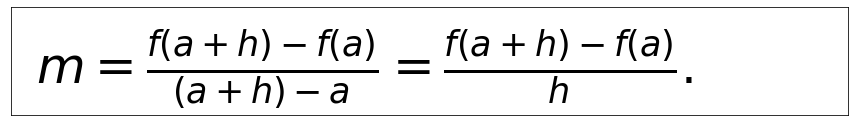

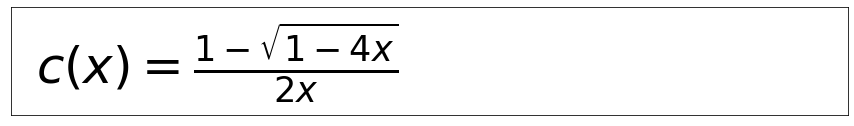

ValueError: 
\textstyle aa=a\,,\quad bb=0\,,\quad ab=ba=0
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

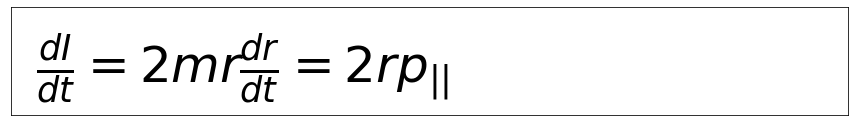

ValueError: 
\textstyle aa=0\,,\quad bb=0\,,\quad ab=ba=0
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

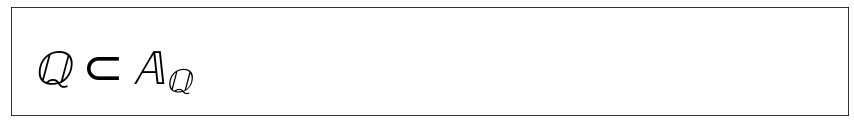

ValueError: 
{\tbinom {n}{0}}=1={\tbinom {n}{n}}
 ^
Unknown symbol: \tbinom, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

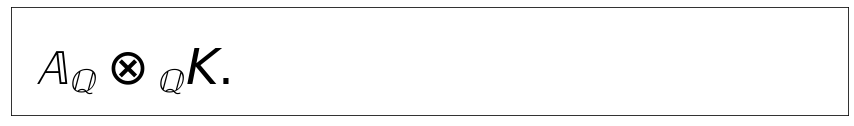

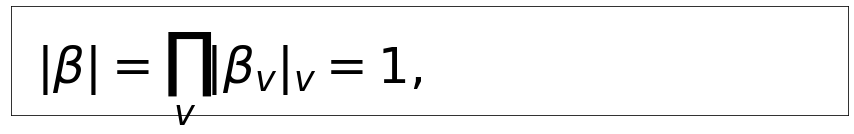

ValueError: 
C_{n}={\frac {1}{n+1}}{2n \choose n}
                          ^
Unknown symbol: \choose, found '\'  (at char 26), (line:1, col:27)

<Figure size 1080x144 with 1 Axes>

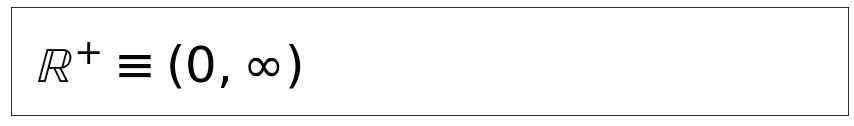

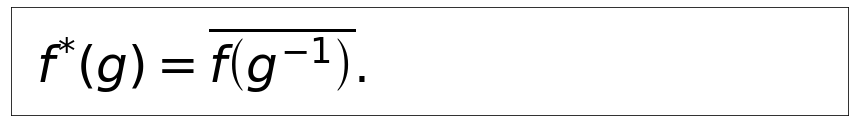

ValueError: 
{\boldsymbol {\tau }}=\mathbf {r} \times \mathbf {F} ,
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

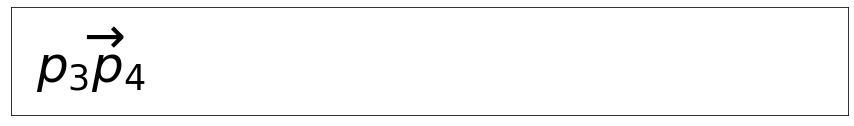

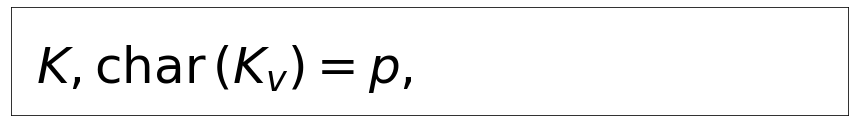

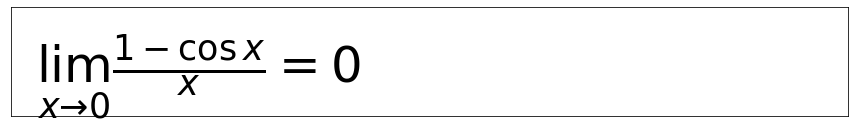

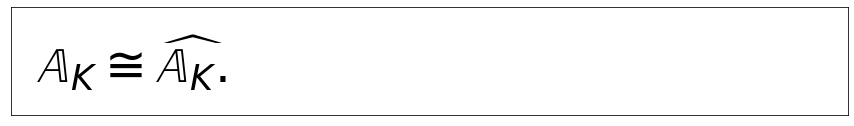

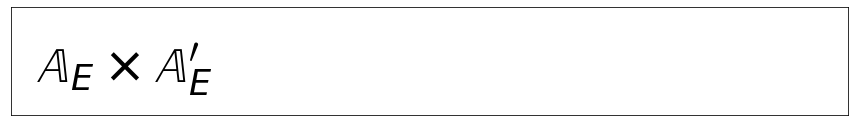

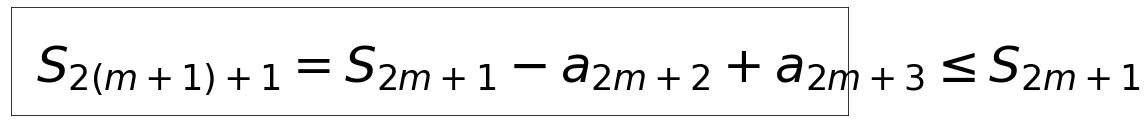

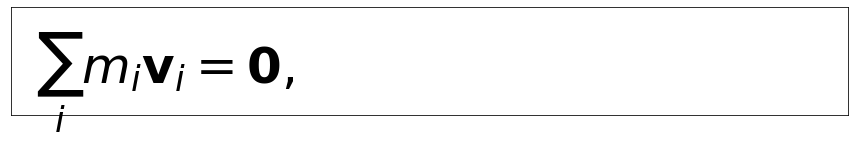

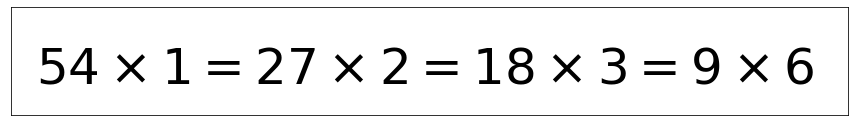

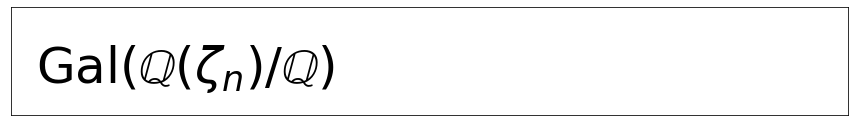

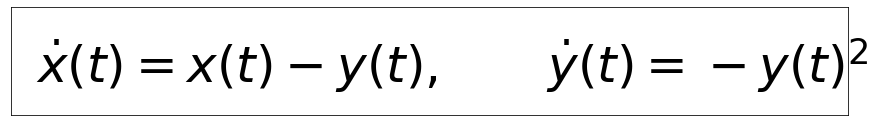

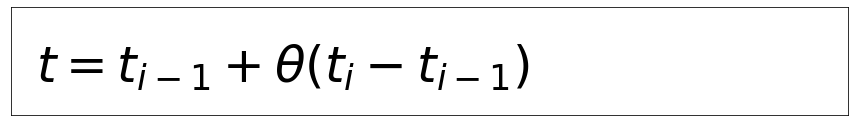

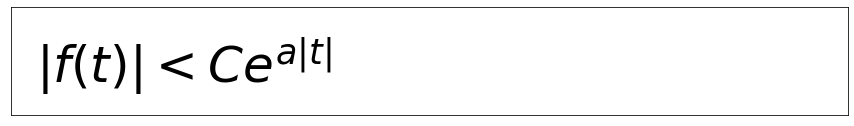

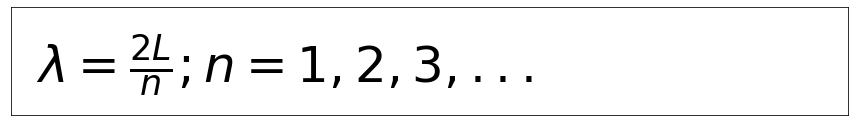

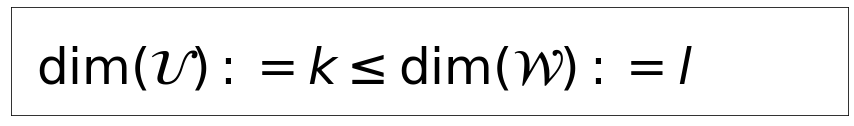

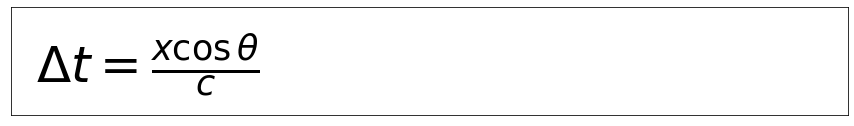

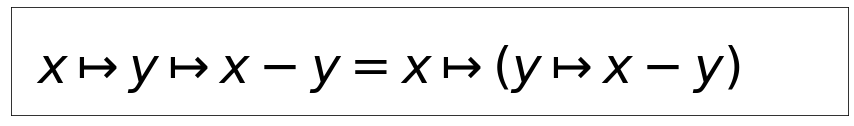

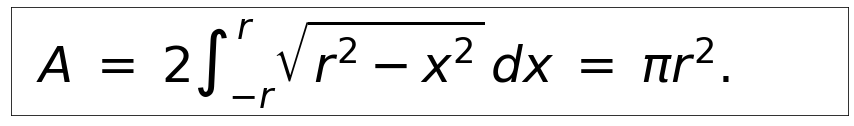

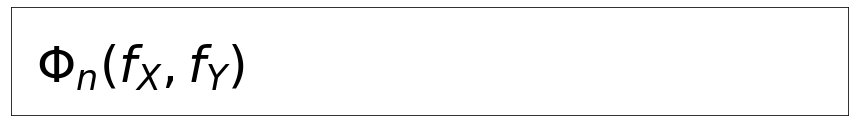

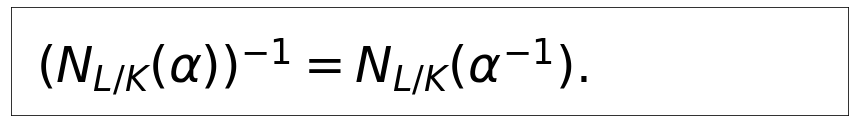

ValueError: 
\textstyle aa=1\,,\quad bb=0\,,\quad ab=-ba=b
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

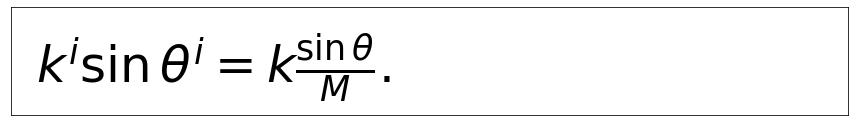

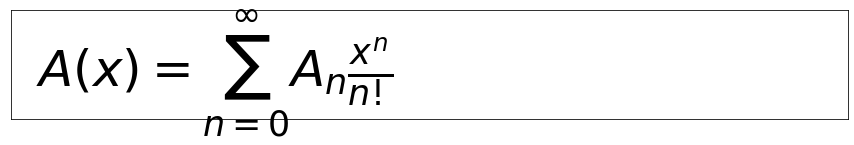

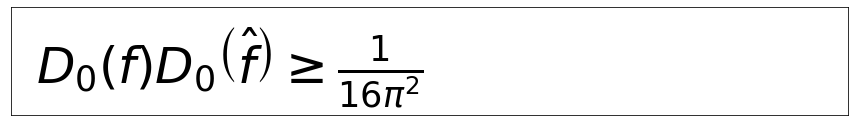

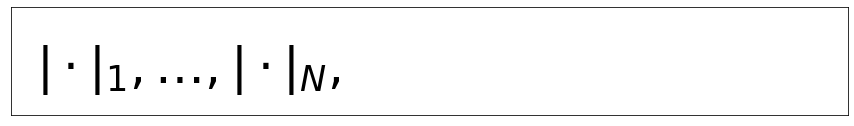

ValueError: 
\textstyle aa=b\,,\quad bb=0\,,\quad ab=ba=0
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

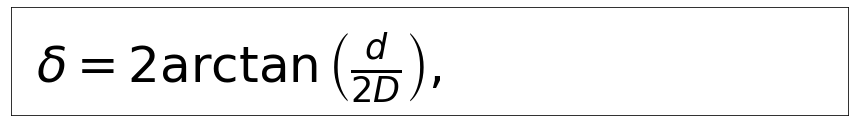

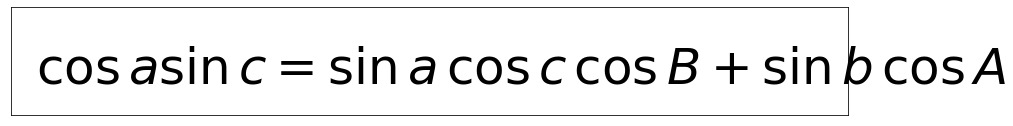

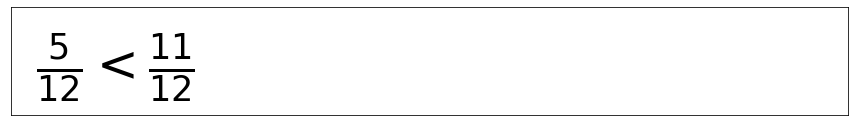

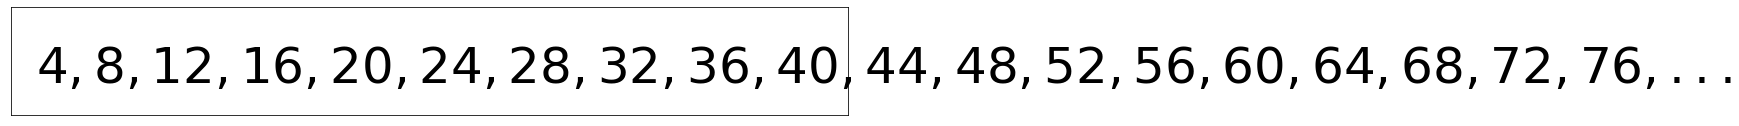

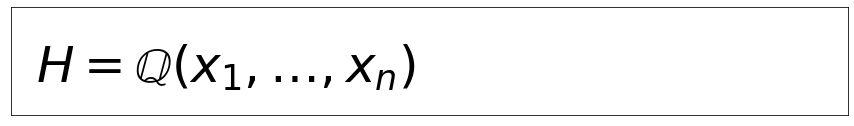

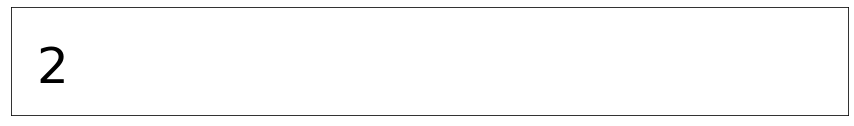

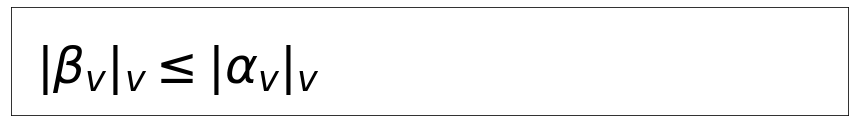

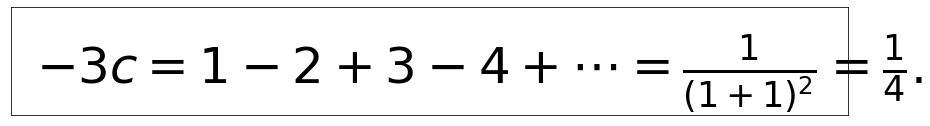

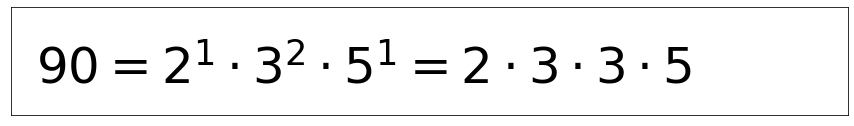

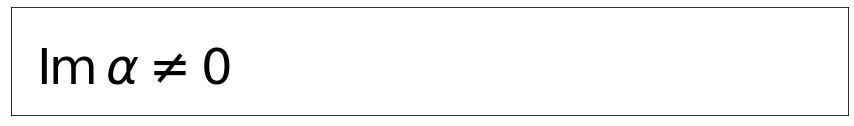

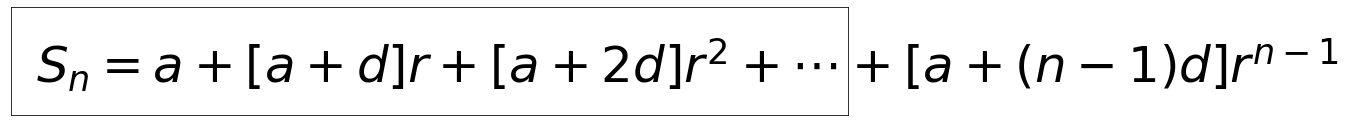

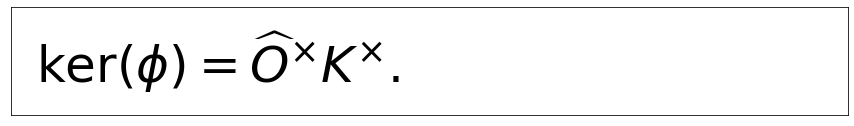

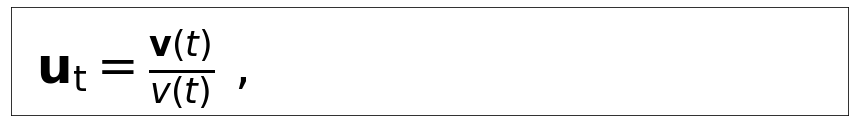

ValueError: 
\alpha =(\alpha _{v})_{v}\in \mathbb {A} _{K,{\text{fin}}},
                                              ^
Unknown symbol: \text, found '\'  (at char 46), (line:1, col:47)

<Figure size 1080x144 with 1 Axes>

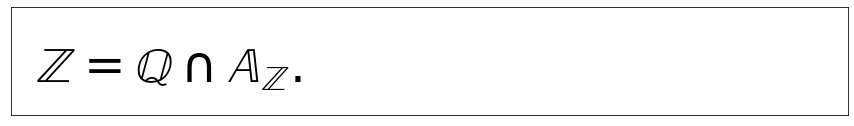

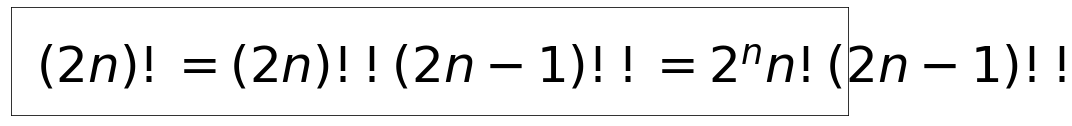

ValueError: 
\textstyle \sum _{j=1}^{n}\alpha _{j}\omega _{j},
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

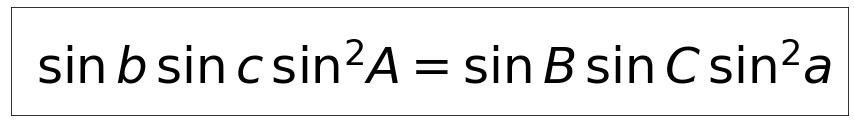

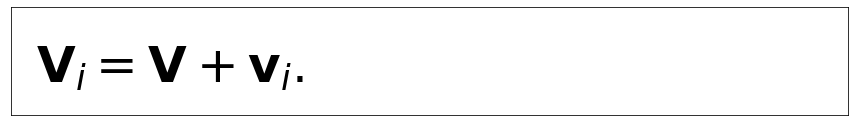

ValueError: 
\mathbf {L} =I{\boldsymbol {\omega }}
               ^
Unknown symbol: \boldsymbol, found '\'  (at char 15), (line:1, col:16)

<Figure size 1080x144 with 1 Axes>

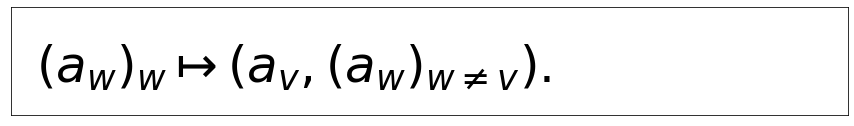

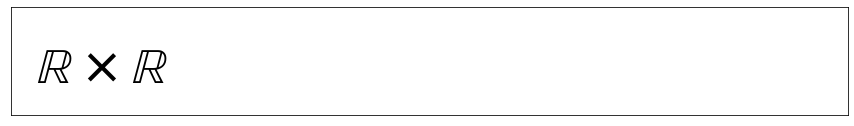

ValueError: 
\operatorname {lcm} (m,n) \over n
                          ^
Unknown symbol: \over, found '\'  (at char 26), (line:1, col:27)

<Figure size 1080x144 with 1 Axes>

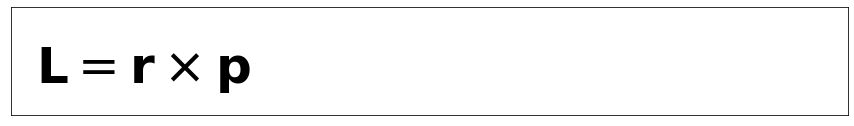

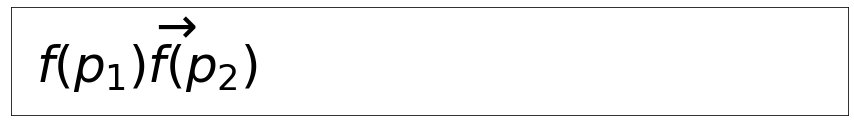

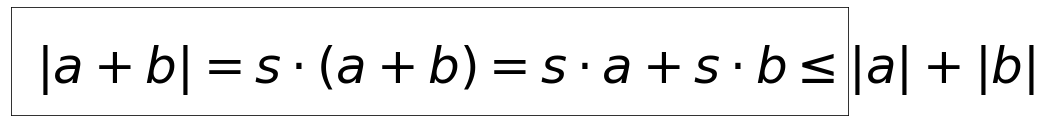

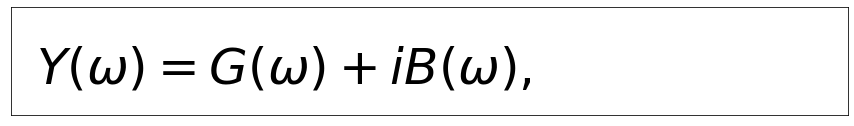

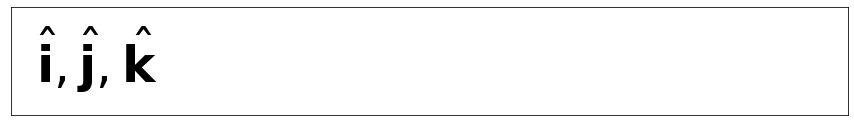

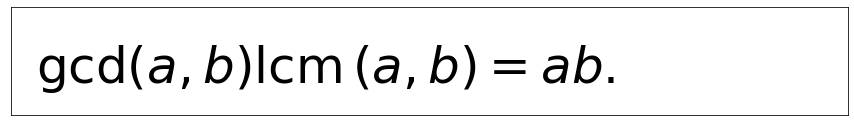

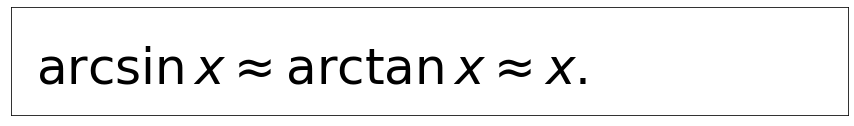

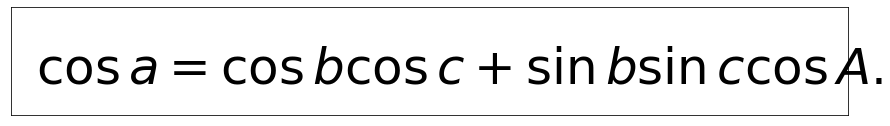

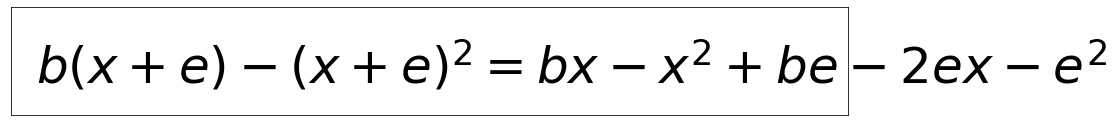

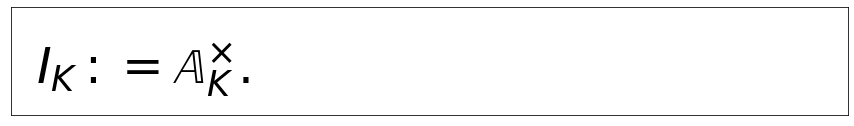

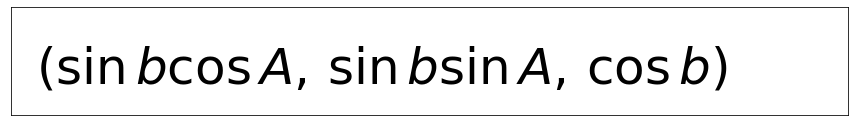

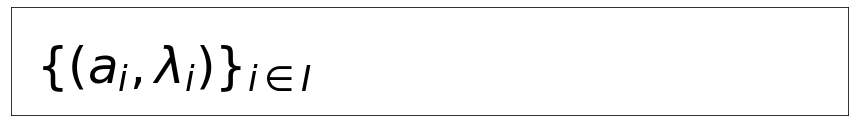

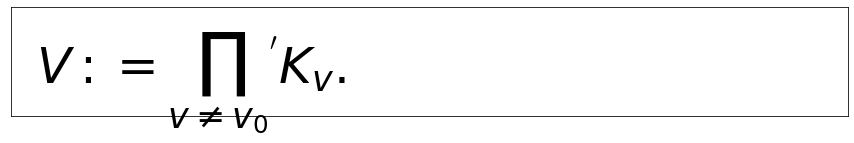

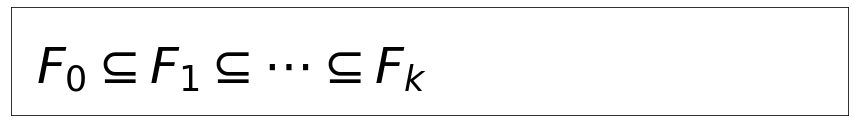

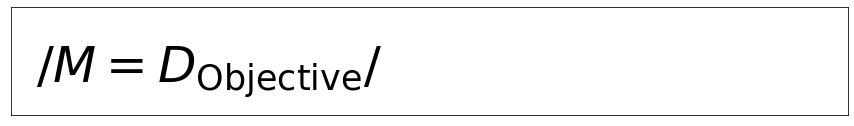

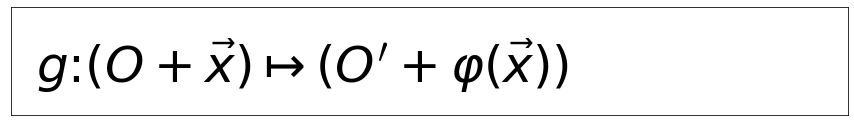

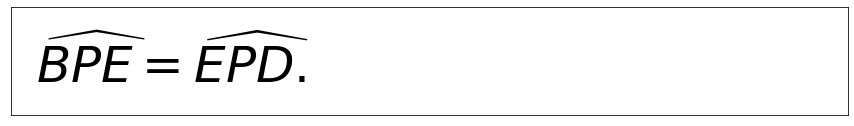

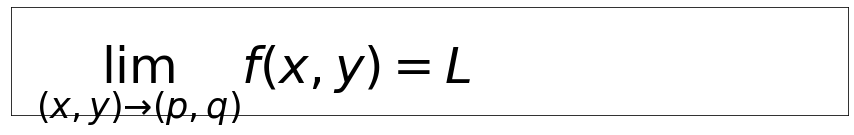

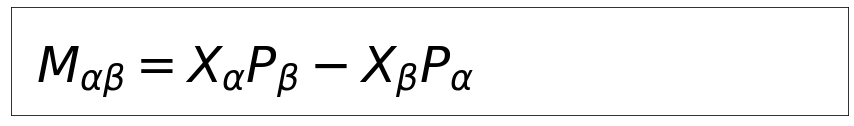

ValueError: 
u_{p}={\tfrac {1}{u}}\cdot v_{p}
       ^
Unknown symbol: \tfrac, found '\'  (at char 7), (line:1, col:8)

<Figure size 1080x144 with 1 Axes>

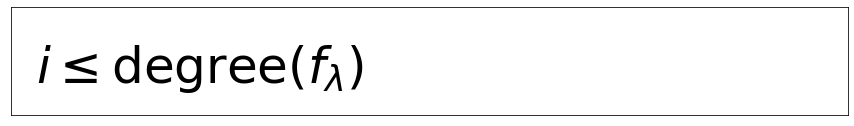

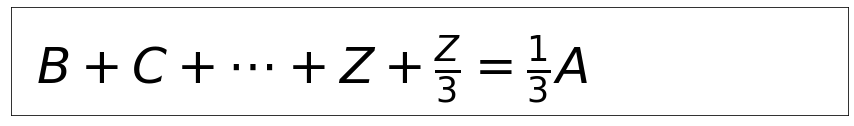

ValueError: 
{\boldsymbol {\omega }}=(\omega _{x},\omega _{y},\omega _{z})
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

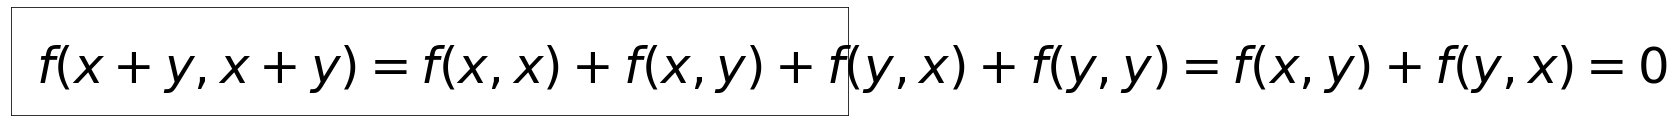

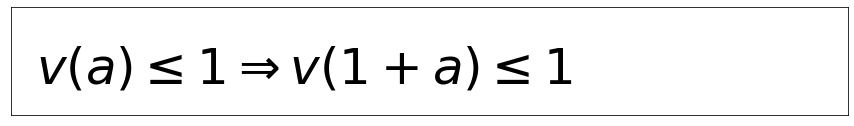

ValueError: 
\{X_{i}\}_{i\in I}\in {\text{Ob}}(\mathbf {A} )
                       ^
Unknown symbol: \text, found '\'  (at char 23), (line:1, col:24)

<Figure size 1080x144 with 1 Axes>

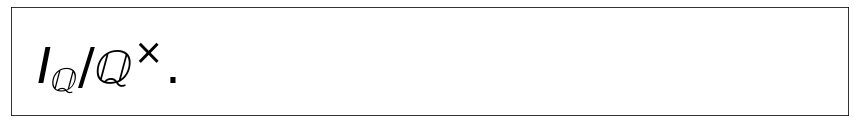

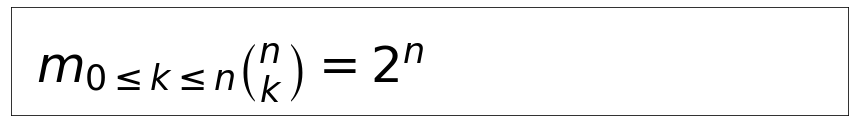

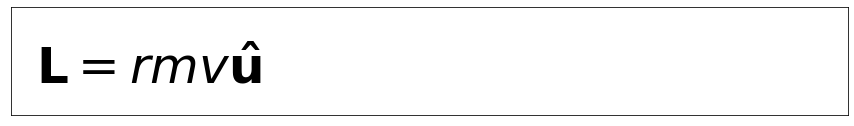

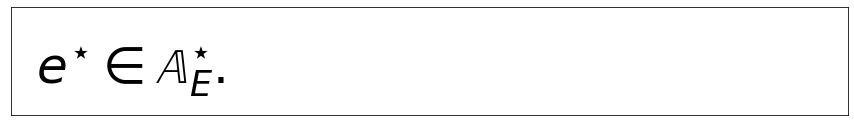

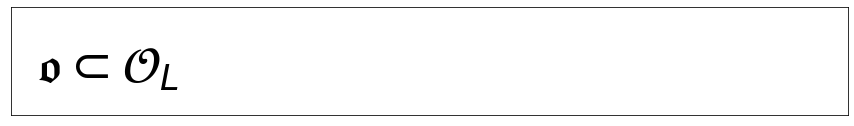

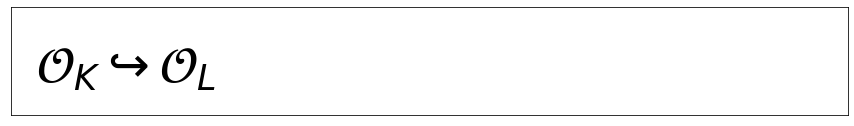

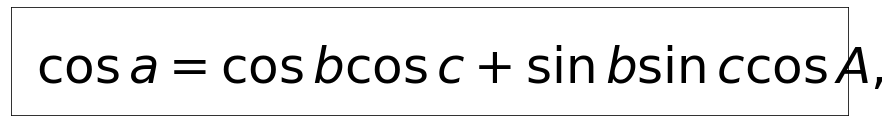

ValueError: 
s={\frac {\pi r\theta }{200{\text{ grad}}}},
                            ^
Unknown symbol: \text, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

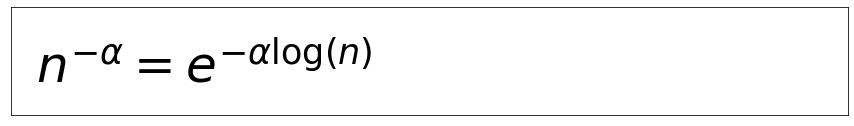

ValueError: 
W={\frac {dA(t)}{dt}}\cdot A^{\text{T}}
                              ^
Unknown symbol: \text, found '\'  (at char 30), (line:1, col:31)

<Figure size 1080x144 with 1 Axes>

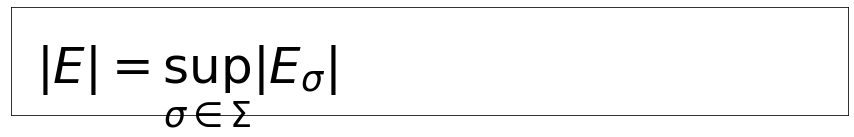

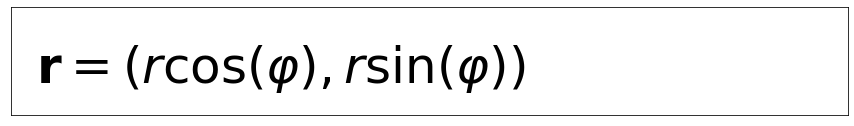

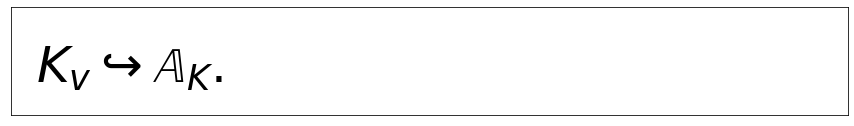

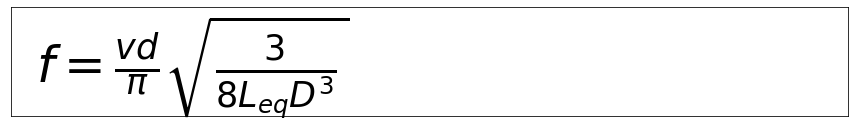

ValueError: 
\mathbf {Hom} _{K{\text{-alg}}}(A,B).
                  ^
Unknown symbol: \text, found '\'  (at char 18), (line:1, col:19)

<Figure size 1080x144 with 1 Axes>

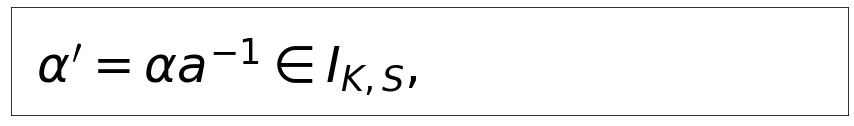

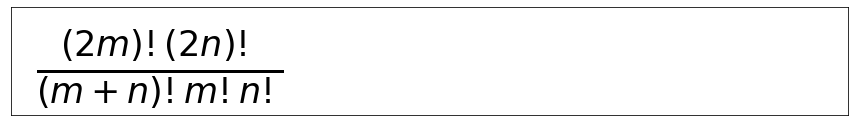

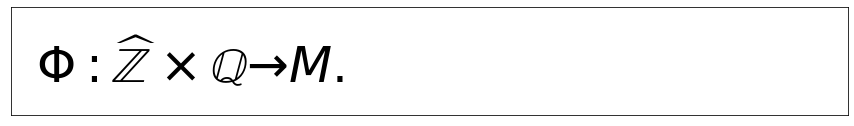

ValueError: 
\operatorname {lcm} (l,m,n) \over l
                            ^
Unknown symbol: \over, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

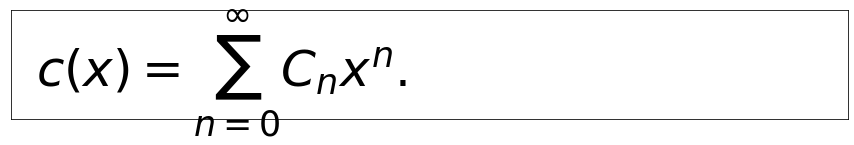

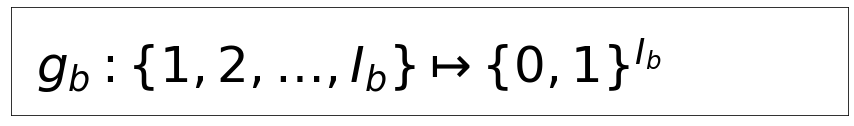

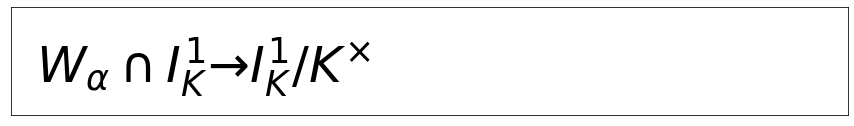

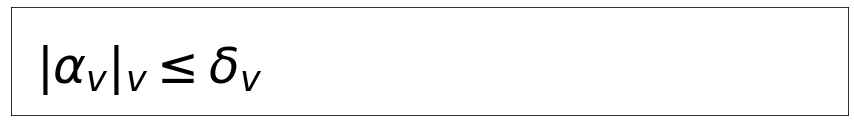

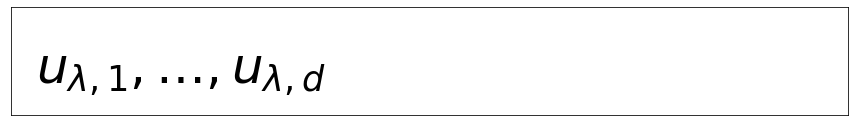

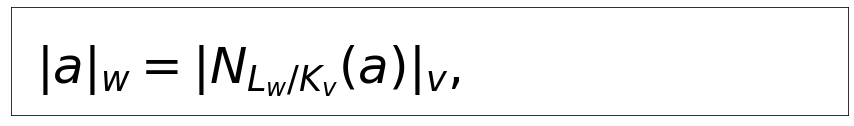

ValueError: 
\textstyle \prod _{v}|\beta _{v}|_{v}=1,
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\mathbb {Q} \subset \mathbb {A} _{\mathbb {Q} ,{\text{fin}}}
                                                ^
Unknown symbol: \text, found '\'  (at char 48), (line:1, col:49)

<Figure size 1080x144 with 1 Axes>

ValueError: 
rac {k-\#{\text{samples chosen}}}{n-\#{\text{samples visited}}}}
          ^
Unknown symbol: \text, found '\'  (at char 10), (line:1, col:11)

<Figure size 1080x144 with 1 Axes>

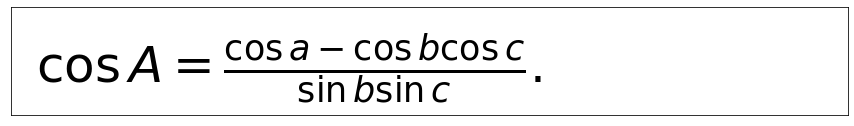

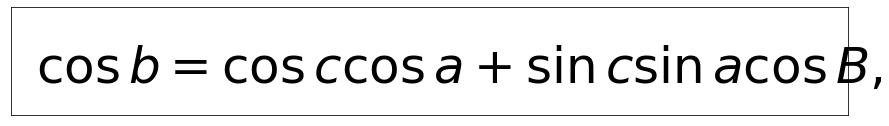

ValueError: 
\mathbb {A} _{K}\setminus I_{K}.
                ^
Unknown symbol: \setminus, found '\'  (at char 16), (line:1, col:17)

<Figure size 1080x144 with 1 Axes>

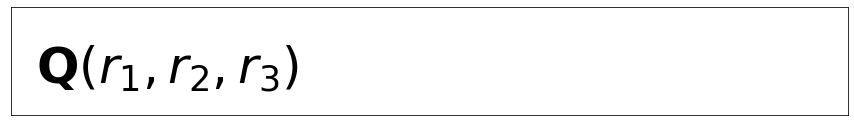

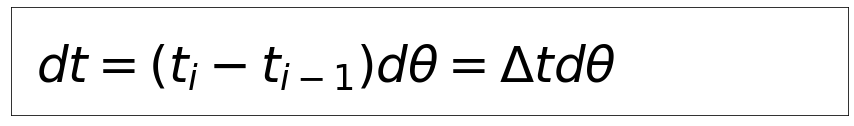

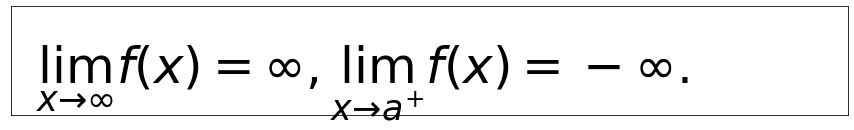

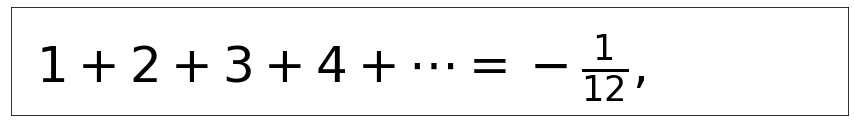

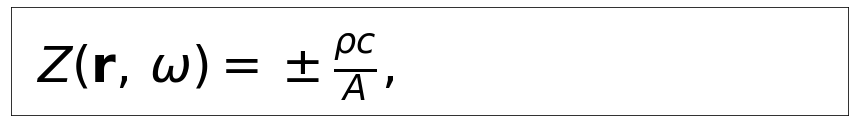

ValueError: 
k={\omega  \over c}={2\pi  \over \lambda }
           ^
Unknown symbol: \over, found '\'  (at char 11), (line:1, col:12)

<Figure size 1080x144 with 1 Axes>

ValueError: 
2B_{i}-C_{i}={2i+1 \choose i}={\frac {2i+1}{i+1}}B_{i},
                   ^
Unknown symbol: \choose, found '\'  (at char 19), (line:1, col:20)

<Figure size 1080x144 with 1 Axes>

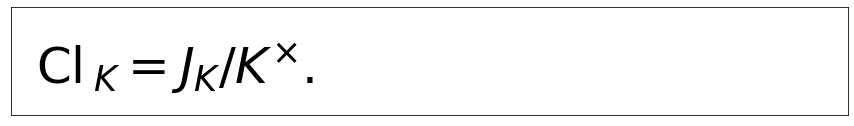

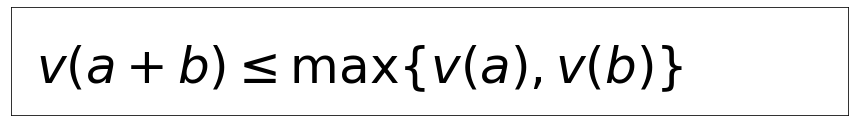

ValueError: 
\textstyle \mathbb {A} _{L}={\prod _{v}}^{'}L_{v}.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

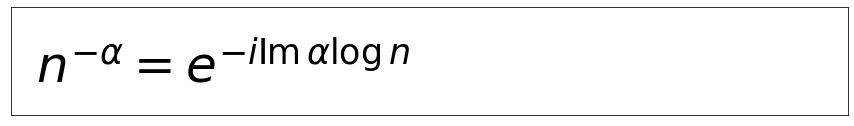

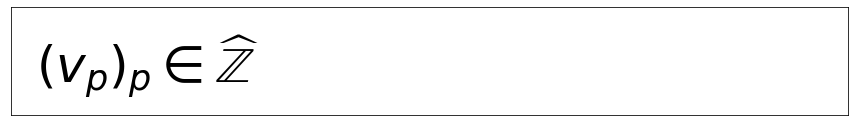

ValueError: 
{\boldsymbol {\omega }}:={\star }(L^{\sharp })
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

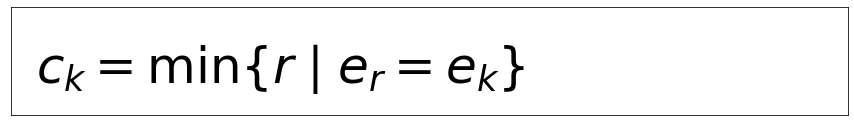

ValueError: 
a\mapsto {\bigl (}\varphi \mapsto \varphi (a){\bigr )}
          ^
Unknown symbol: \bigl, found '\'  (at char 10), (line:1, col:11)

<Figure size 1080x144 with 1 Axes>

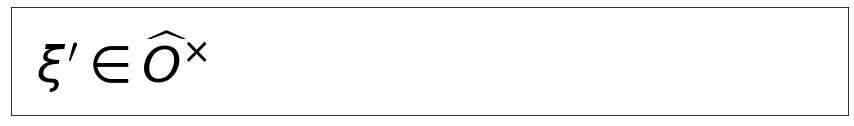

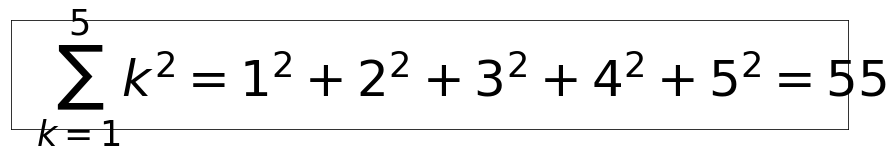

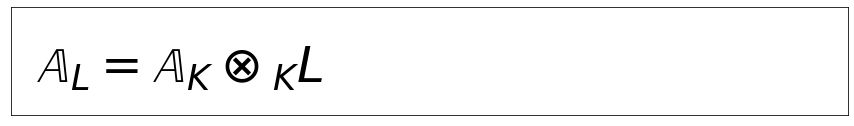

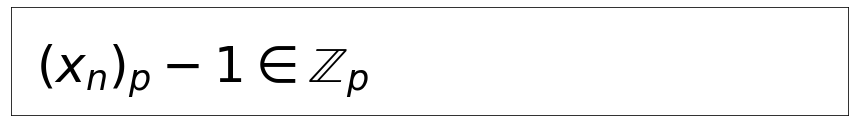

ValueError: 
(P\land Q)\leftrightarrow (Q\land P)
  ^
Unknown symbol: \land, found '\'  (at char 2), (line:1, col:3)

<Figure size 1080x144 with 1 Axes>

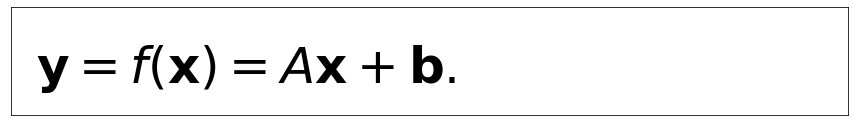

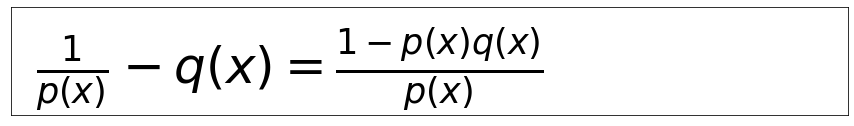

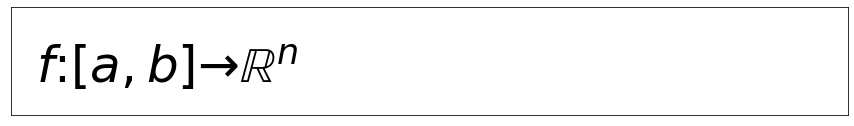

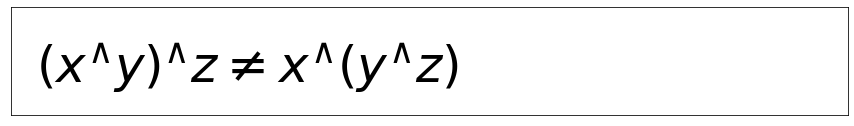

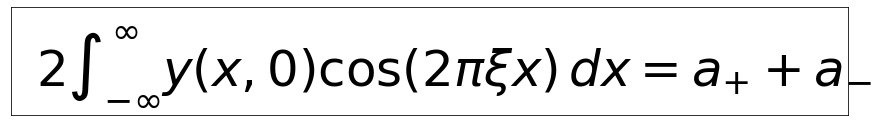

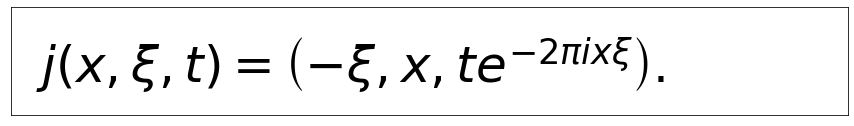

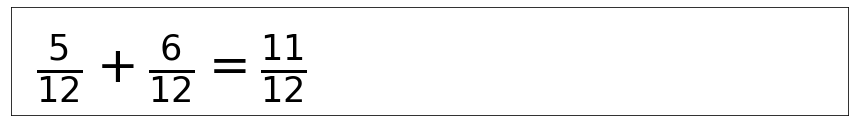

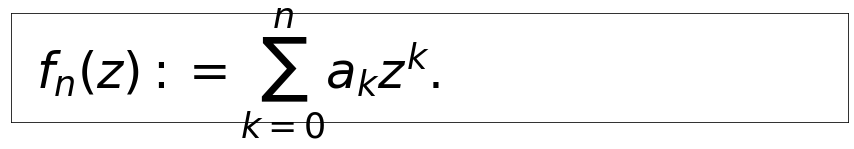

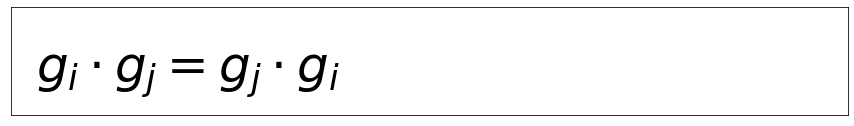

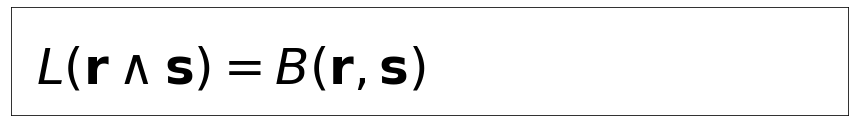

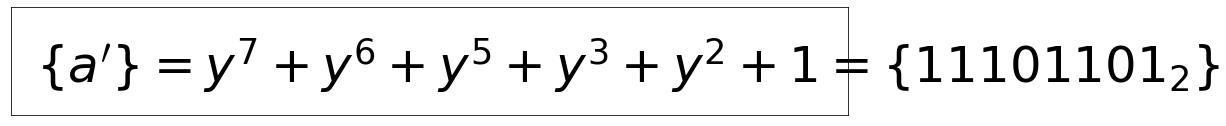

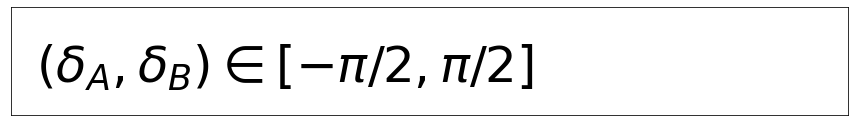

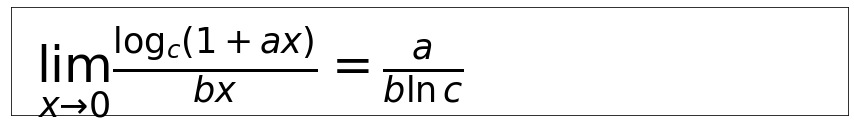

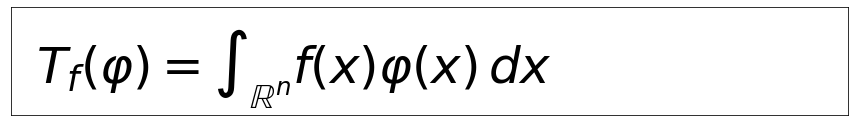

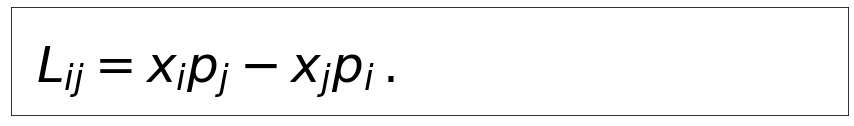

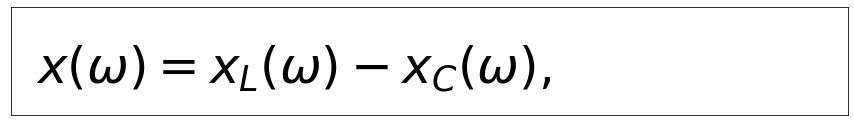

ValueError: 
{\mathcal {I}}={\mathcal {R}}^{\text{T}}{\mathcal {R}}
                               ^
Unknown symbol: \text, found '\'  (at char 31), (line:1, col:32)

<Figure size 1080x144 with 1 Axes>

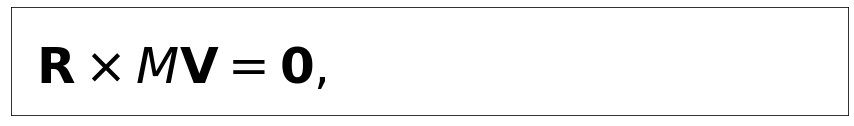

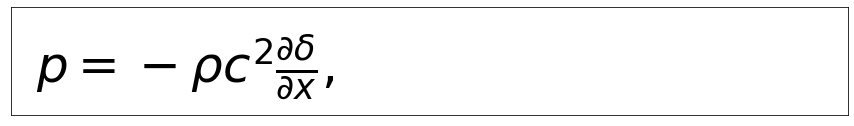

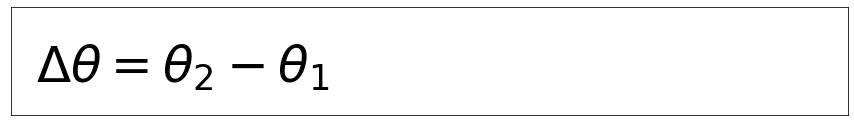

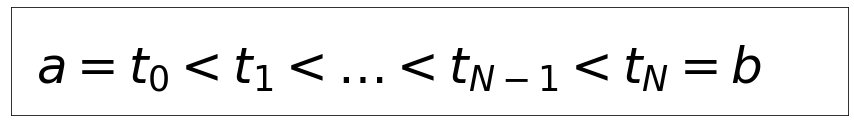

ValueError: 
{2 \over 21}+{1 \over 6}={4 \over 42}+{7 \over 42}={11 \over 42}
   ^
Unknown symbol: \over, found '\'  (at char 3), (line:1, col:4)

<Figure size 1080x144 with 1 Axes>

ValueError: 
s={\frac {C\theta }{400{\text{ grad}}}}.
                        ^
Unknown symbol: \text, found '\'  (at char 24), (line:1, col:25)

<Figure size 1080x144 with 1 Axes>

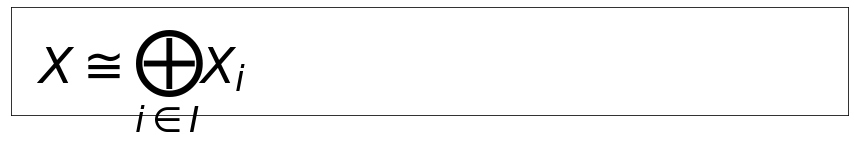

ValueError: 
\operatorname {lcm} (m,n) \over m
                          ^
Unknown symbol: \over, found '\'  (at char 26), (line:1, col:27)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\textstyle \prod _{v}|\alpha _{v}|_{v}>C.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

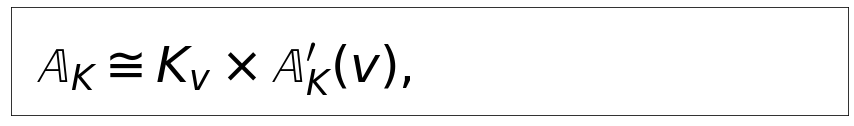

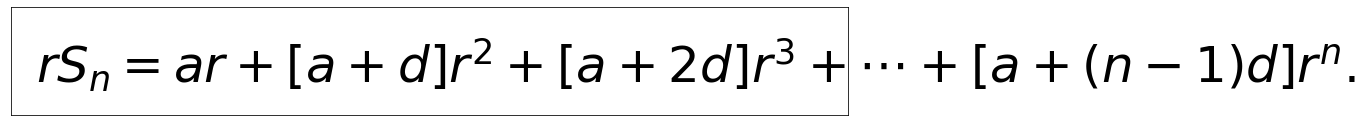

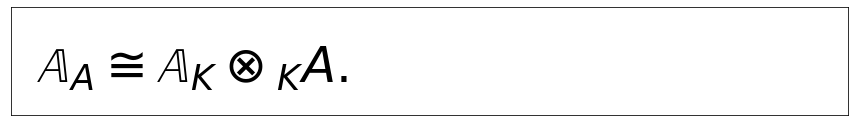

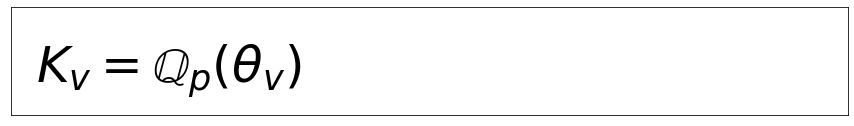

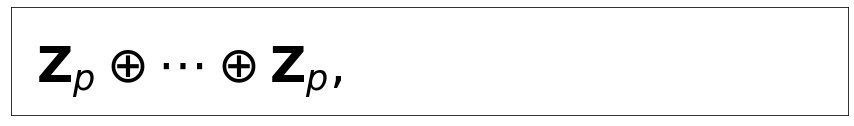

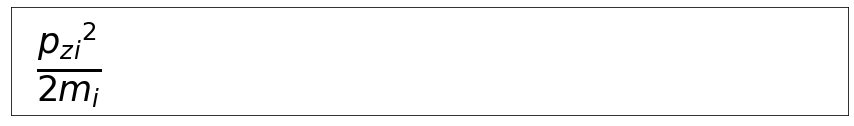

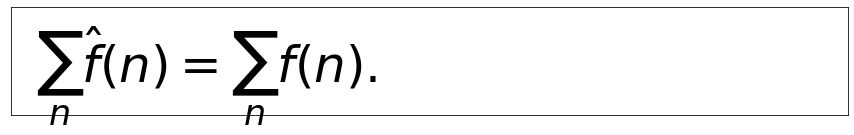

ValueError: 
B_{n+1}-C_{n+1}=\sum _{i=0}^{n}{2i+1 \choose i}C_{n-i}
                                     ^
Unknown symbol: \choose, found '\'  (at char 37), (line:1, col:38)

<Figure size 1080x144 with 1 Axes>

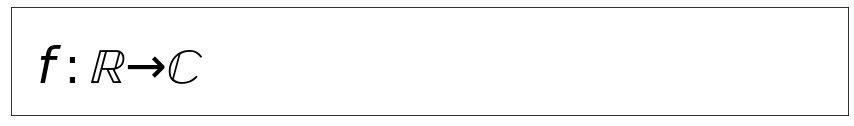

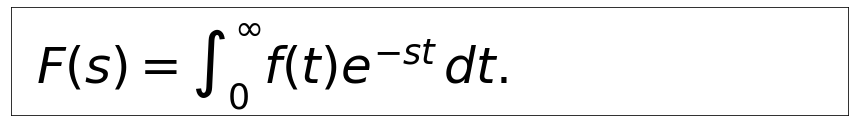

ValueError: 
\{p\in \mathbb {N} :p{\text{ prime}}\}\cup \{\infty \},
                      ^
Unknown symbol: \text, found '\'  (at char 22), (line:1, col:23)

<Figure size 1080x144 with 1 Axes>

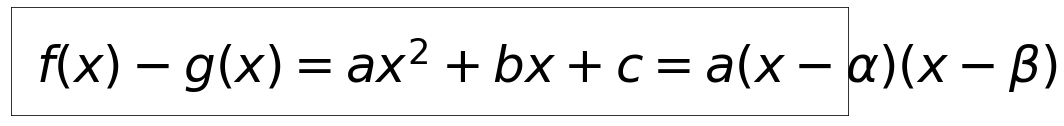

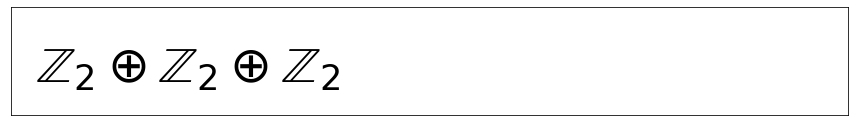

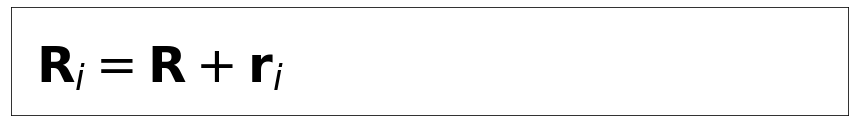

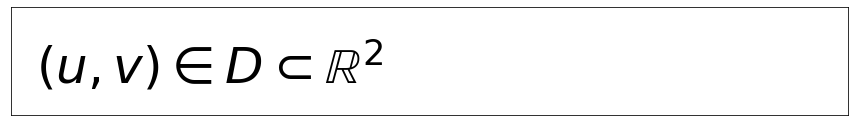

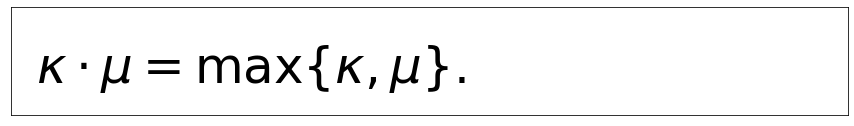

ValueError: 
p(b_{i})=x_{i}\quad {\text{for }}i=1,\ldots ,n.
                     ^
Unknown symbol: \text, found '\'  (at char 21), (line:1, col:22)

<Figure size 1080x144 with 1 Axes>

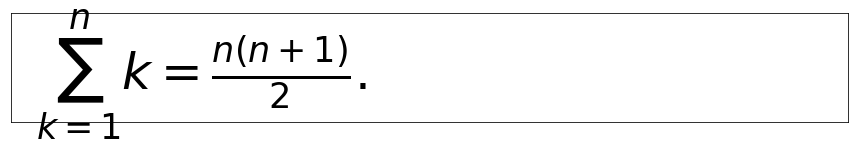

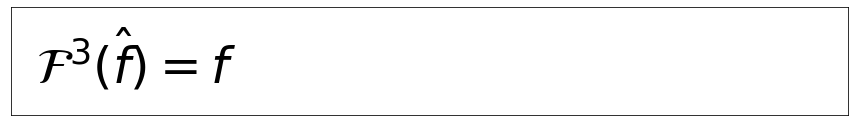

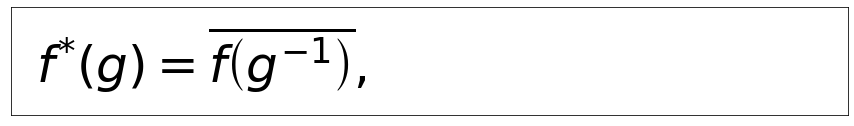

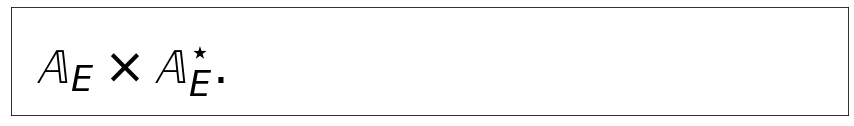

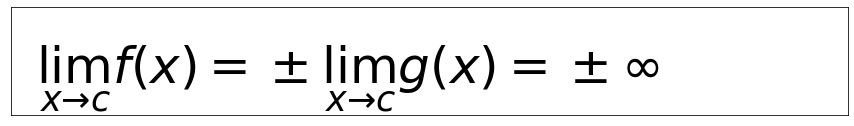

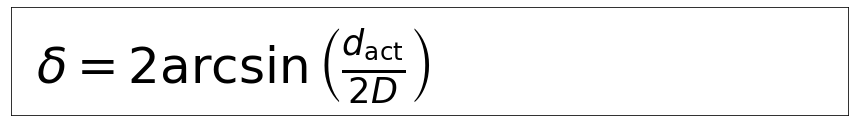

ValueError: 
C_{n}={2n \choose n}-{2n \choose n+1}
          ^
Unknown symbol: \choose, found '\'  (at char 10), (line:1, col:11)

<Figure size 1080x144 with 1 Axes>

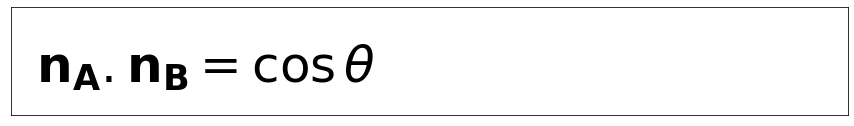

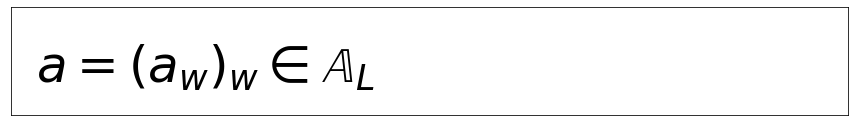

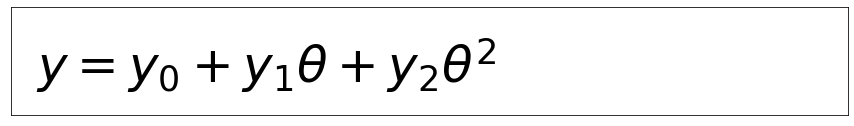

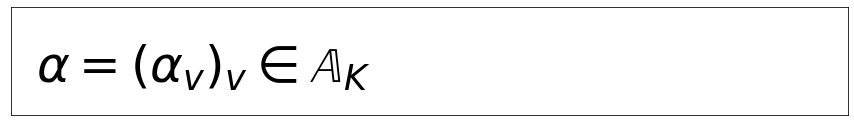

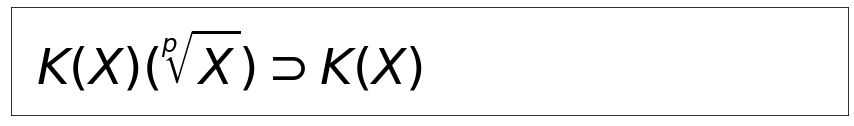

ValueError: 
c(x)=\sum _{n=0}^{\infty }{2n \choose n}{\frac {x^{n}}{n+1}}.
                              ^
Unknown symbol: \choose, found '\'  (at char 30), (line:1, col:31)

<Figure size 1080x144 with 1 Axes>

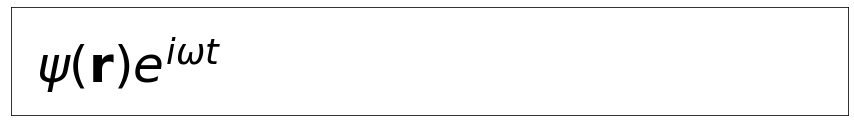

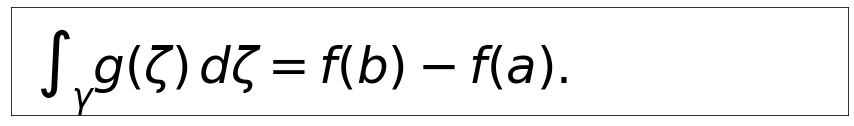

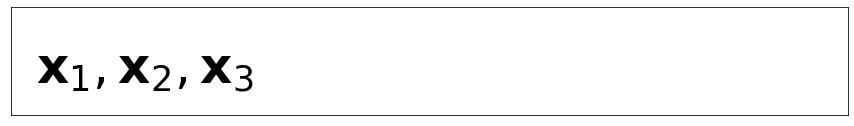

ValueError: 
\textstyle aa=a\,,\quad bb=b\,,\quad ab=ba=0
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

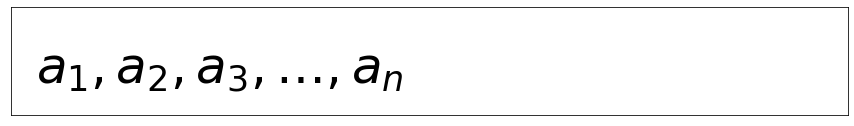

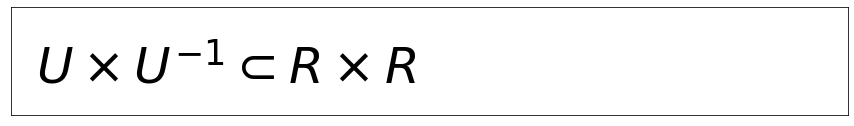

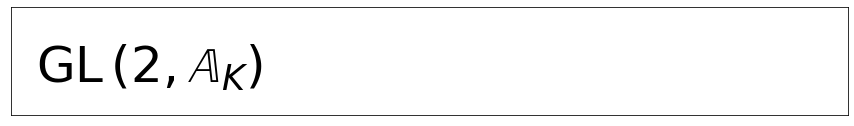

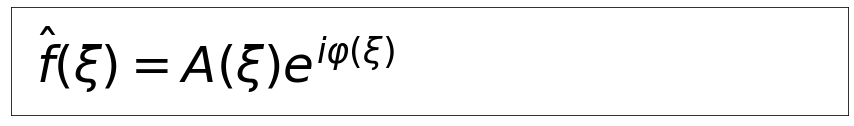

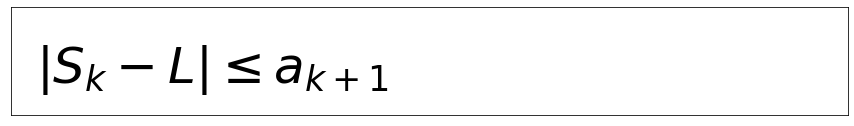

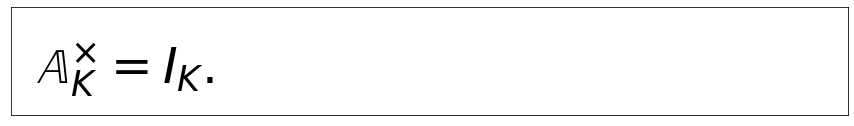

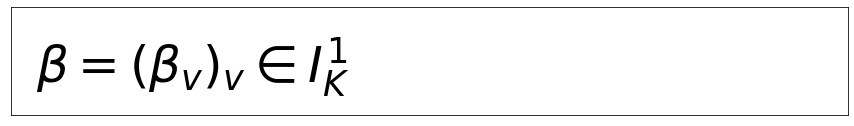

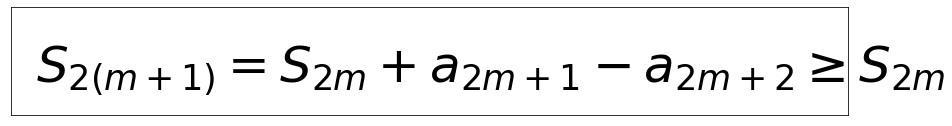

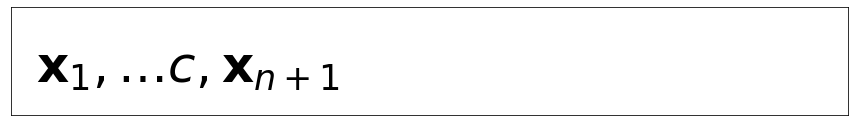

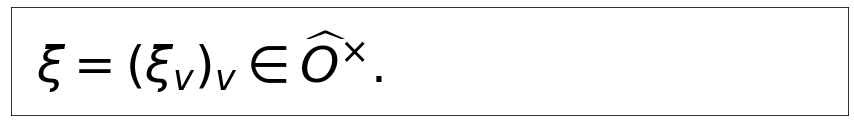

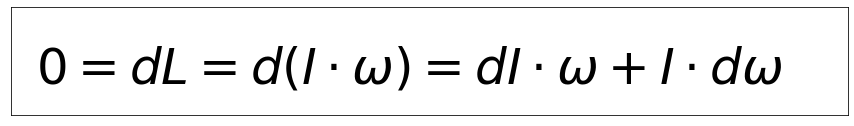

ValueError: 
\xi K^{\times }\in C_{K,{\text{fin}}}
                         ^
Unknown symbol: \text, found '\'  (at char 25), (line:1, col:26)

<Figure size 1080x144 with 1 Axes>

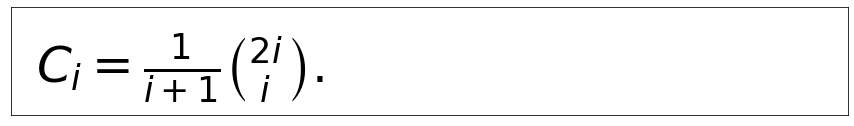

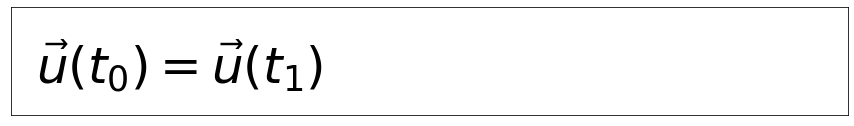

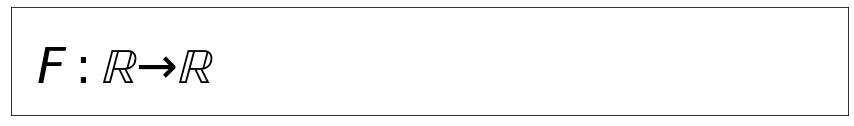

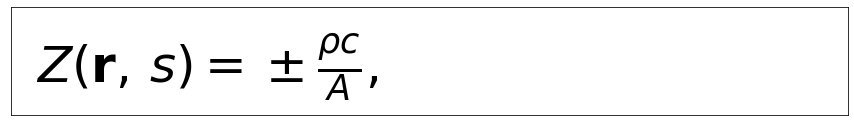

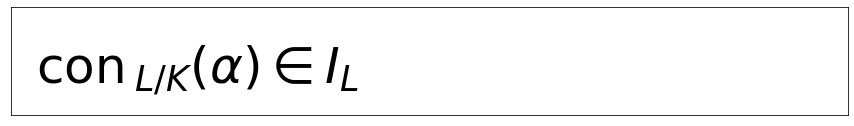

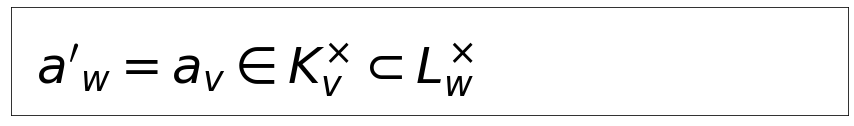

ValueError: 
\textstyle |\alpha |:=\prod _{v}|\alpha _{v}|_{v}.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

ValueError: 
-{\frac {2}{r}}{\frac {dr}{dt}}{\boldsymbol {\omega }}
                                ^
Unknown symbol: \boldsymbol, found '\'  (at char 32), (line:1, col:33)

<Figure size 1080x144 with 1 Axes>

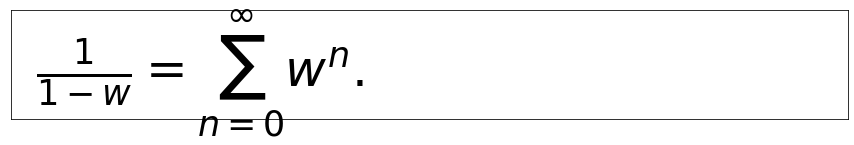

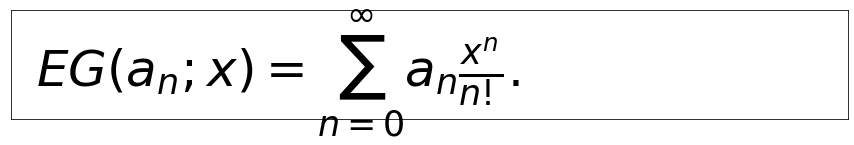

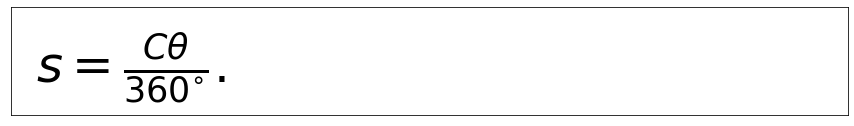

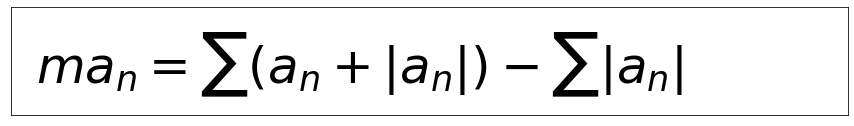

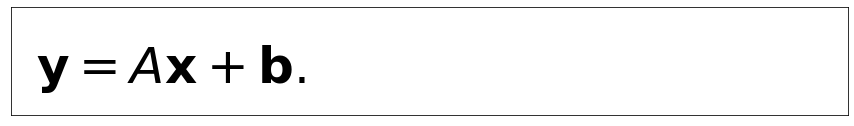

ValueError: 
\operatorname {lcm} (l,m,n) \over n
                            ^
Unknown symbol: \over, found '\'  (at char 28), (line:1, col:29)

<Figure size 1080x144 with 1 Axes>

ValueError: 
{\sqrt {\textstyle \sum _{i=1}^{n}(a_{i}-b_{i})^{2}}}.
        ^
Unknown symbol: \textstyle, found '\'  (at char 8), (line:1, col:9)

<Figure size 1080x144 with 1 Axes>

ValueError: 
A={1 \over 2}\int r^{2}\,d\theta .
     ^
Unknown symbol: \over, found '\'  (at char 5), (line:1, col:6)

<Figure size 1080x144 with 1 Axes>

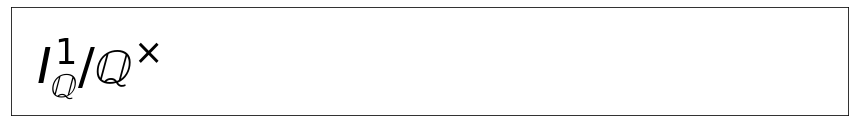

ValueError: 
\textstyle \beta ={\frac {\gamma }{\alpha }}.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

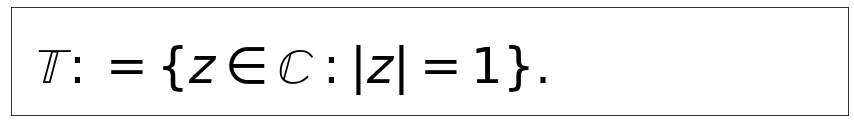

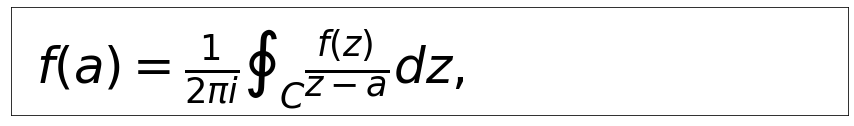

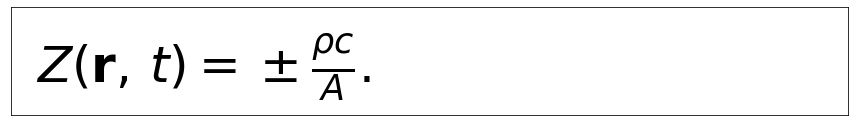

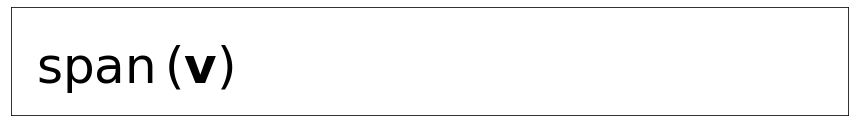

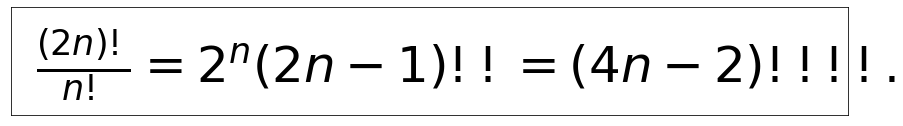

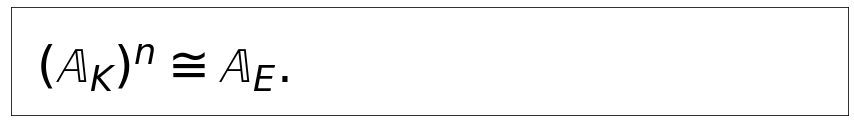

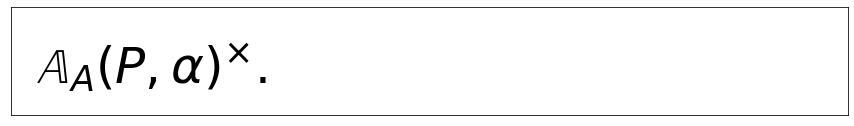

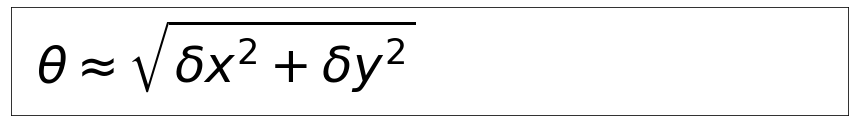

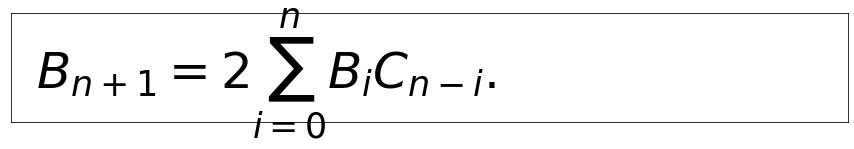

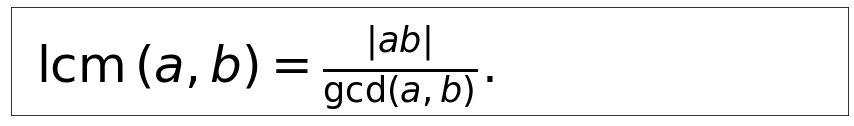

ValueError: 
\mathbb {A} _{K,{\text{fin}}},
                 ^
Unknown symbol: \text, found '\'  (at char 17), (line:1, col:18)

<Figure size 1080x144 with 1 Axes>

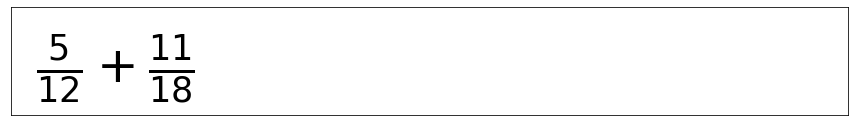

ValueError: 
(P\land Q)\Leftrightarrow (Q\land P)
  ^
Unknown symbol: \land, found '\'  (at char 2), (line:1, col:3)

<Figure size 1080x144 with 1 Axes>

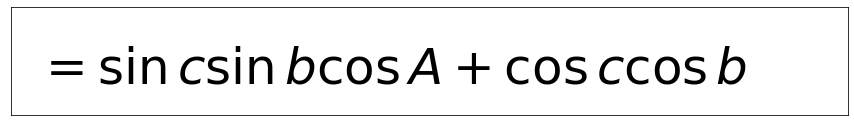

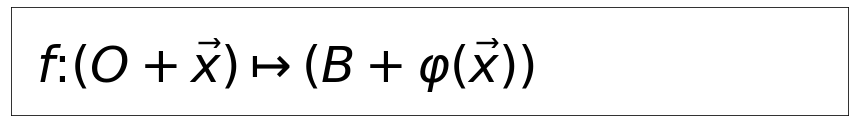

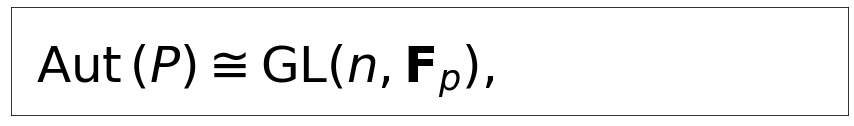

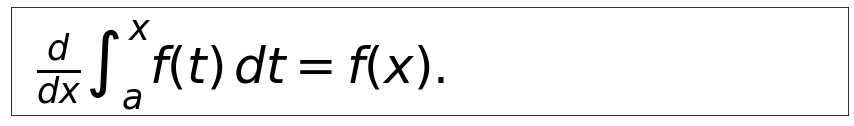

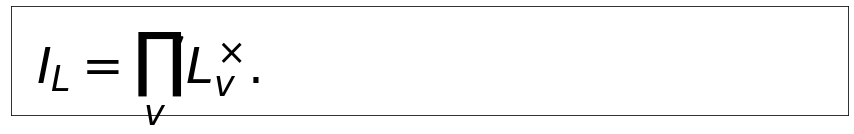

ValueError: 
\textstyle \left(\prod _{p<\infty }|a_{p}|_{p}\right)\cdot 1=1.
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

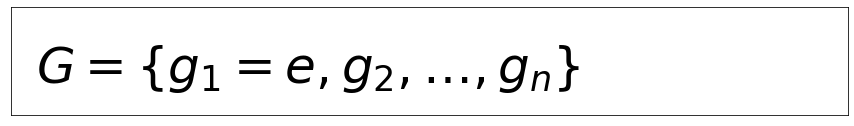

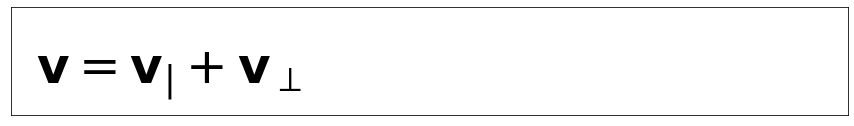

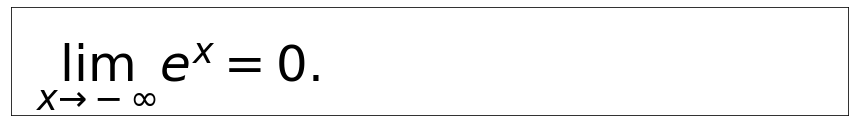

ValueError: 
\omega =|{\boldsymbol {\omega }}|
          ^
Unknown symbol: \boldsymbol, found '\'  (at char 10), (line:1, col:11)

<Figure size 1080x144 with 1 Axes>

ValueError: 
{\boldsymbol {\omega }}_{1}={\boldsymbol {\omega }}_{2}
 ^
Unknown symbol: \boldsymbol, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

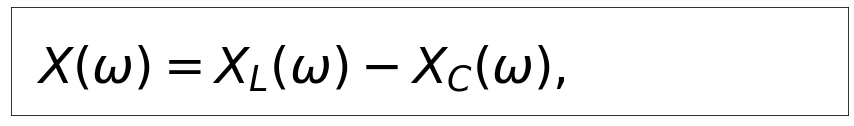

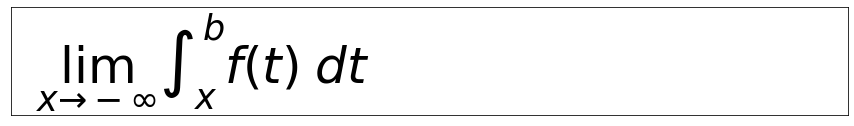

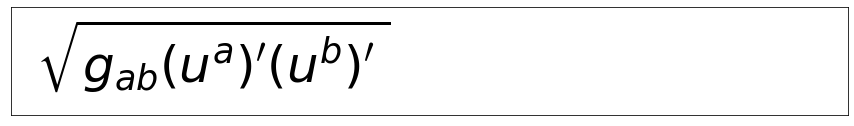

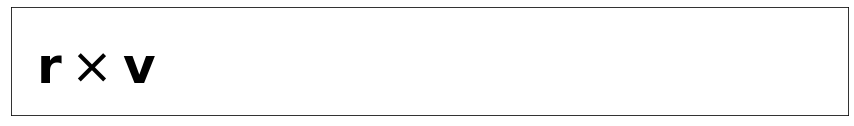

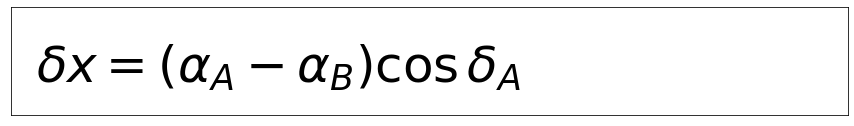

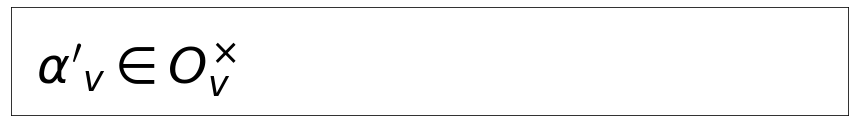

ValueError: 
0={\frac {dA}{dt}}A^{\text{T}}+A{\frac {dA^{\text{T}}}{dt}}
                     ^
Unknown symbol: \text, found '\'  (at char 21), (line:1, col:22)

<Figure size 1080x144 with 1 Axes>

ValueError: 
\textstyle {\widehat {O}}:=\prod _{v<\infty }O_{v}
^
Unknown symbol: \textstyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1080x144 with 1 Axes>

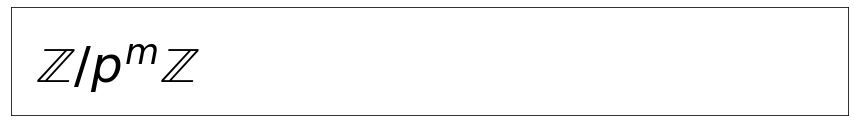

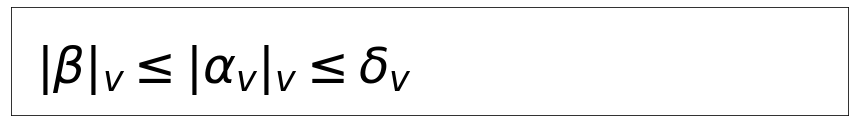

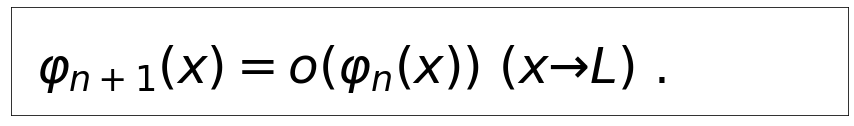

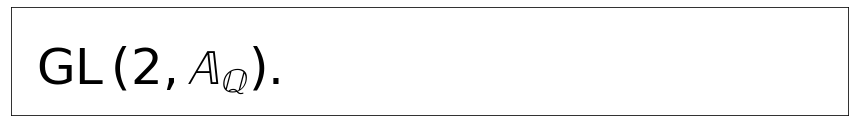

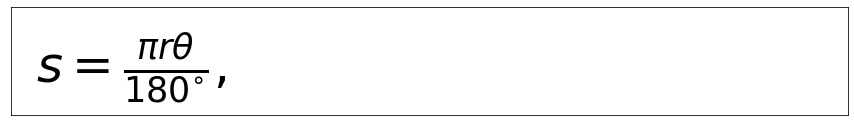

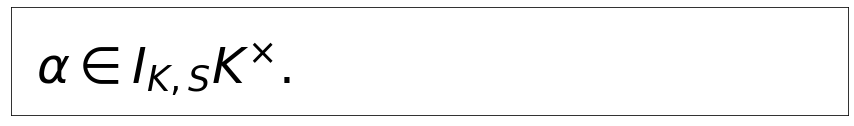

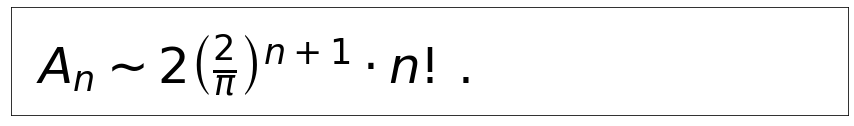

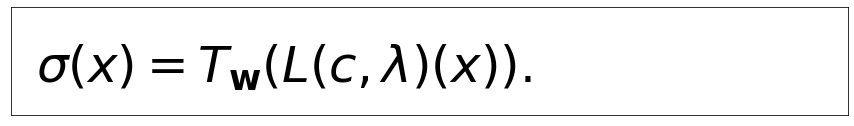

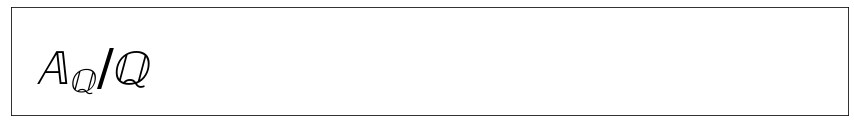

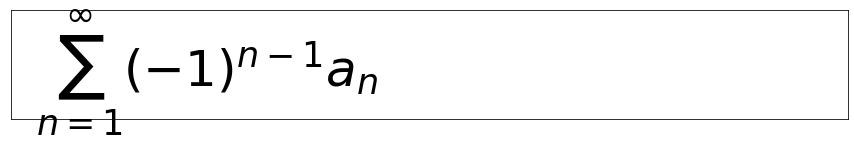

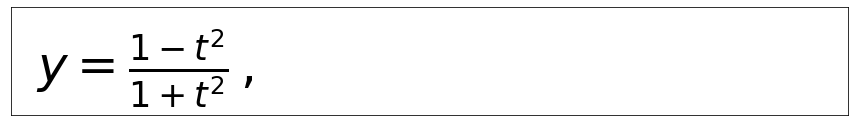

ValueError: 
y={3 \over 2}a^{\frac {1}{2}}(x-a)+f(a).
     ^
Unknown symbol: \over, found '\'  (at char 5), (line:1, col:6)

<Figure size 1080x144 with 1 Axes>

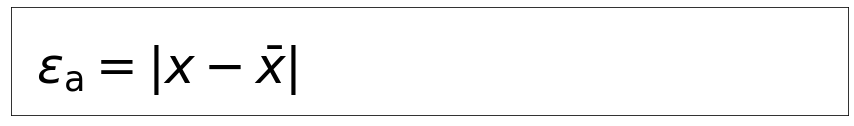

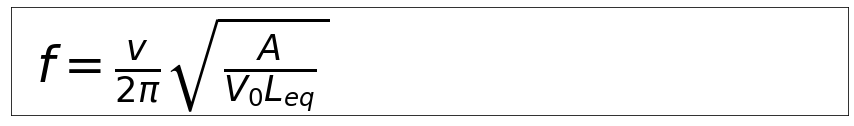

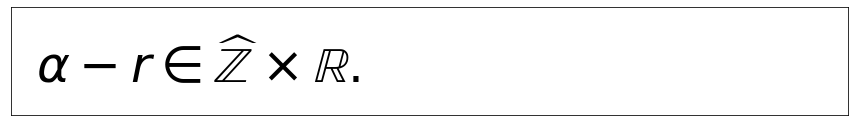

ValueError: 
\xi ={\tfrac {\omega }{2\pi }}
      ^
Unknown symbol: \tfrac, found '\'  (at char 6), (line:1, col:7)

<Figure size 1080x144 with 1 Axes>

ValueError: 
((P\lor Q)\lor R)\leftrightarrow (P\lor (Q\lor R))
   ^
Unknown symbol: \lor, found '\'  (at char 3), (line:1, col:4)

<Figure size 1080x144 with 1 Axes>

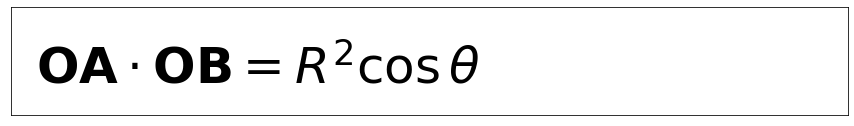

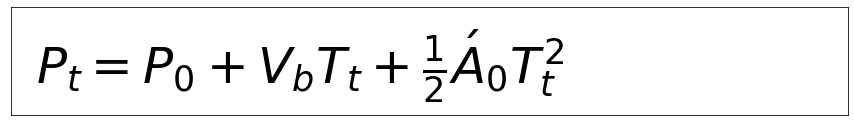

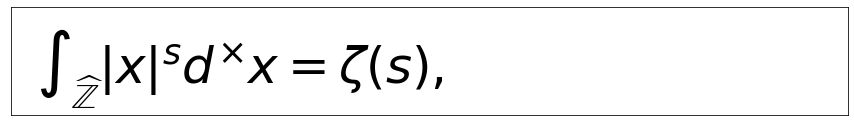

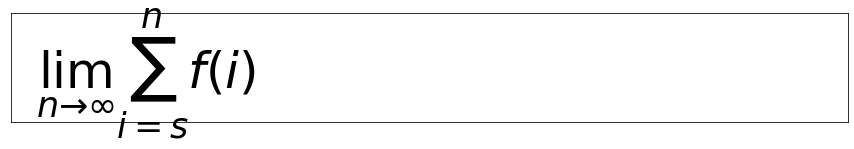

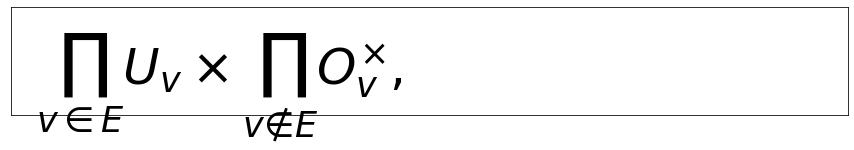

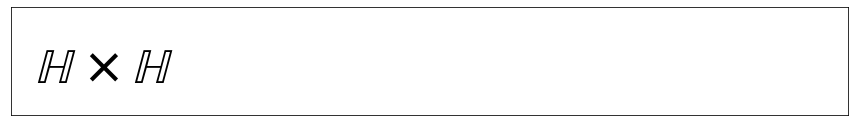

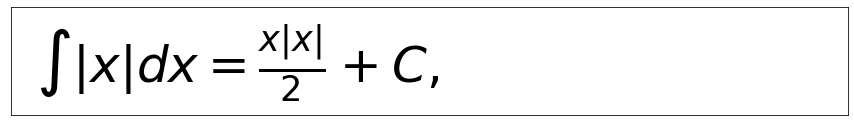

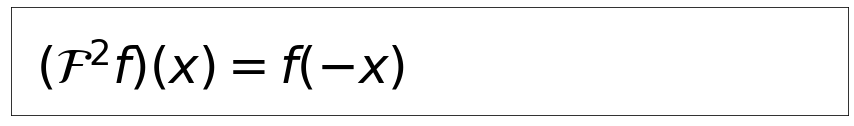

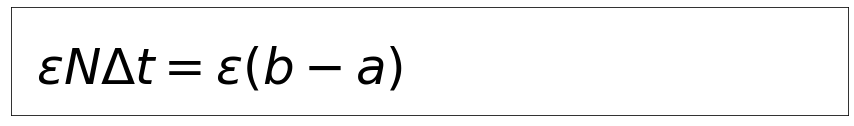

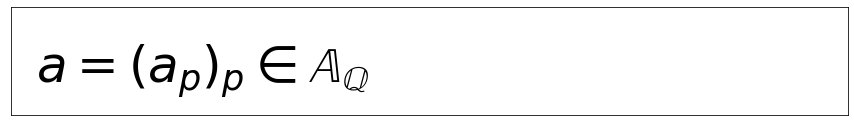

ValueError: 
{\tfrac {x^{3}}{3}},{\tfrac {x^{3}}{3}}+1,{\tfrac {x^{3}}{3}}-2
 ^
Unknown symbol: \tfrac, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

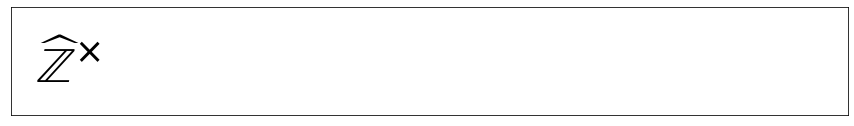

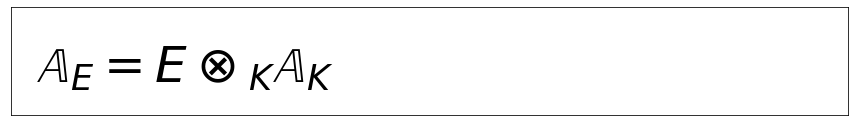

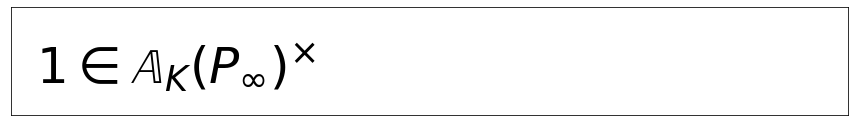

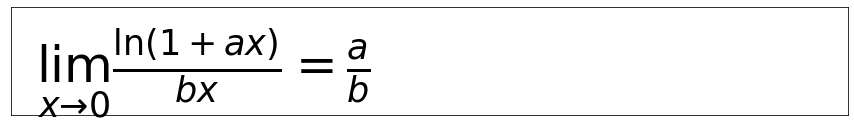

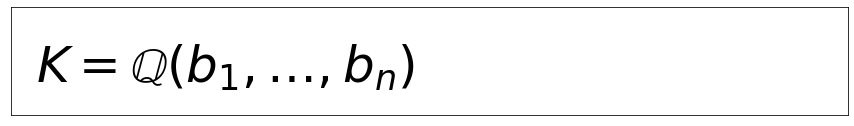

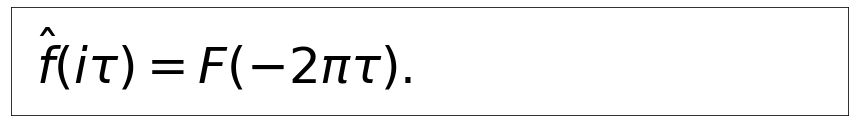

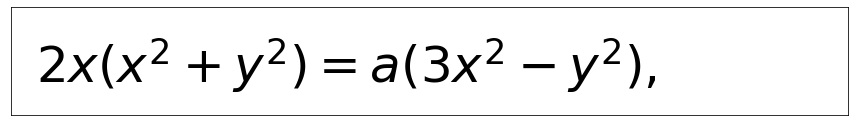

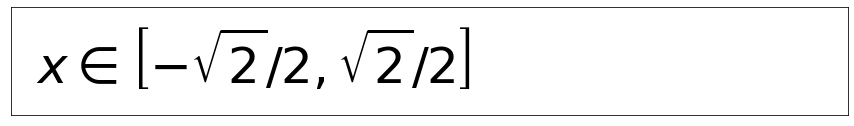

ValueError: 
{\tfrac {1}{p}}-a_{p}\notin \mathbb {Z} _{p}
 ^
Unknown symbol: \tfrac, found '\'  (at char 1), (line:1, col:2)

<Figure size 1080x144 with 1 Axes>

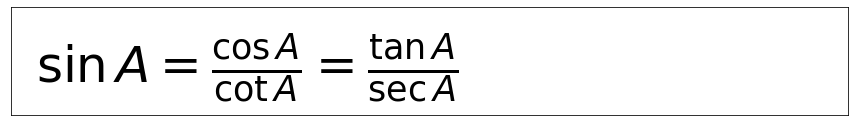

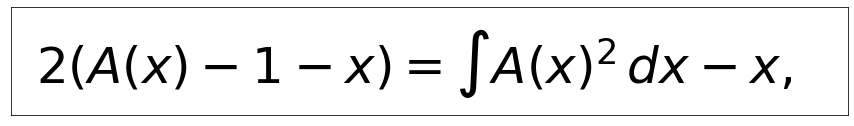

In [168]:
import matplotlib.pyplot as plt                                                 
import sympy                                                                    

df_list = []
img_id = 0
for e in norm_expr:
    try:
        lat = e
        #add text       
        fig = plt.figure(figsize=(15,2),facecolor='w') 
        plt.text(0.03, 0.3, r"$%s$" % lat, fontsize = 50)                                  
        #hide axes                                                                      
        fig = plt.gca()                                                                 
        fig.axes.get_xaxis().set_visible(False)                                         
        fig.axes.get_yaxis().set_visible(False)                                         
        plt.draw() #or savefig                                                  
        plt.savefig('imgs/'+ str(img_id) + '.png', bbox_inches='tight',dpi=100)
        df_list += [(img_id, e)]
        img_id += 1
    except Exception as e:
        print(e) 

In [169]:
df_list

[(0, '\\mathbb {C} \\to \\mathbb {C} ,z\\mapsto z^{n}'),
 (1, '\\max(a,b)=\\lim _{h\\to 0}h\\log(e^{a/h}+e^{b/h}).'),
 (2, 'p=1+\\operatorname {Re} \\alpha '),
 (3, '\\mathbb {A} _{L}\\cong \\mathbb {A} _{K}\\otimes _{K}L'),
 (4, '\\lim _{x\\to 0^{+}}\\ln x=-\\infty .'),
 (5, '\\sum _{k=1}^{\\infty }\\;{\\frac {1}{k^{p}}},'),
 (6, '\\mathbf {x} _{i}\\cdot \\mathbf {x} _{j}'),
 (7, "\\langle e,e'\\rangle =\\chi ([e,e^{\\star }])"),
 (8, 'd={\\rm {degree}}(f_{\\lambda })'),
 (9, '\\mathbf {C} (t)=(r(t),\\theta (t))'),
 (10, 'B_{x}=\\{1,x,x^{2},\\ldots ,x^{n-1}\\}'),
 (11, '\\lim _{x\\to 0}{\\frac {e^{ax}-1}{bx}}={\\frac {a}{b}}'),
 (12, '1\\in \\mathbb {A} _{\\mathbb {Q} }.'),
 (13, 'k_{y}=k\\sin \\theta \\sin \\varphi \\,'),
 (14, '\\gcd(a,b)=\\prod _{p}p^{\\min(a_{p},b_{p})}'),
 (15, 'K_{1}\\times \\cdots \\times K_{N}.'),
 (16, '\\omega ={\\frac {d\\phi }{dt}}={\\frac {v_{\\perp }}{r}}.'),
 (17, 'k_{x}^{2}+k_{y}^{2}+k_{z}^{2}=k^{2}'),
 (18, '\\sum _{n=1}^{\\infty }1=+\\infty \\,,'),
 

In [ ]:
df = pd.DataFrame(df_list, columns=['id','latex'])
df['path'] = '/latexf/' + df['id'].astype(str) + '.png'
df['path'] = df['path'].astype(str)
df.to_csv('source.csv')
df.drop(['latex'],axis=1).to_csv('output.tsv',sep='\t',index=False)

In [ ]:


# importing the requests library
import requests
# api-endpoint
URL = "http://svgkit.sourceforge.net/cgi-bin/latex2svg.py"
  
# location given here
location = "\\frac{1}{2\\pi}"
  
# defining a params dict for the parameters to be sent to the API
PARAMS = {"latex":location}
  
# sending get request and saving the response as response object
r = requests.get(url = URL, params = PARAMS)
  
# extracting data in json format
r.text

import urllib
import urllib2

def latex2svg(latexcode):
    """
    Turn LaTeX string to an SVG formatted string using the online SVGKit
    found at: http://svgkit.sourceforge.net/tests/latex_tests.html
    """
    txdata = urllib.urlencode({"latex": latexcode})
    url = ""
    req = urllib2.Request(url, txdata)
    return urllib2.urlopen(req).read()

print(latex2svg("2+2=4"))
print(latex2svg("\\frac{1}{2\\pi}"))

!whereis latex
!apt install texlive-fonts-recommended texlive-fonts-extra
!apt install dvipng

from latex2svg import latex2svg
out = latex2svg(r'\( e^{i \pi} + 1 = 0 \)')
print(out['depth'])  # baseline position in em
print(out['svg'])  # rendered SVG


!pip install pylatex
!pip install sympy

print_expressions(norm_expr[:100])

!brew install texmaker
!brew install mactex
!brew install latex-mk

import matplotlib.pyplot as plt
plt.rc(usetex=True)
x = range(0, 10)
y = [t**2 for t in x]
z = [t**2+1 for t in x]
plt.plot(x, y, label=r'$\beta=\alpha^2$')
plt.plot(x, z, label=r'$\beta=\alpha^2+1$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
#plt.legend(loc=0)
plt.savefig('my_pgf_plot.pgf')


import pandas as pd
df = pd.DataFrame()

result # 1:09-1:18 - 23

"""
{'': '',
 'k=0,\\ldots ,n-1.': 'ка равно ноль и так далее эн минус один',
 '\\log(a+b)\\approx \\max(\\log a,\\log b),': 'логарифм а плюс бэ приблизительно равно максимуму из логарифма а и логарифм бэ',
 '{\\frac {\\left|{\\tilde {X}}-\\mathrm {mode} \\right|}{\\sigma }}\\leq 3^{1/2}.': 'модуль из скобка открывается икс минус мода скобка закрывается разделить на сигма меньше или равно три в степени одна вторая',
 'c_{1}\\geq c_{2}\\geq \\cdots \\geq c_{k}': 'цэ первое больше или равно цэ второе больше или равно цэ второе больше или равно и так далее больше или равно цэ катое',
 '(g\\circ f)(x)=g(f(x))=3(2x+1)+7=6x+10': 'жэ кружок эф от икс равно жэ от эф от икс равно три умножить на скобка открывается два икс плюс один скобка закрывается плюс семь равно шесть икс плюс десять',
 '{\\bar {x}}={\\frac {1}{n}}\\left(\\sum _{i=1}^{n}{x_{i}}\\right)={\\frac {x_{1}+x_{2}+\\cdots +x_{n}}{n}}': 'вектор икс равно один на эн умножить на скобка открывается сумма икс итое от и равно один до эн равно числитель икс первое плюс икс второе плюс и так далее икс энное знаменатель эн',
 '\\log i': 'логарифм и',
 'A^{0}': 'а большое в нулевой степени',
 '\\prod _{i=1}^{n}x=x\\cdot x\\cdot \\ldots \\cdot x=x^{n}.': 'произведение икс от и равно один до эн равно икс умножить на икс умножить на и так далее умножить на икс равно икс в степени эн',
 'x-p/q': 'икс минус пэ разделить на ку',
 'x^{\\frac {1}{n}},': 'икс в степени один на эн',
 '(xy)^{-1}=y^{-1}x^{-1},': 'скобка открывается икс игрек скобка закрывается в минус первой степени равно игрек в минус первой степени умножить на икс в минус первой степени',
 '{\\frac {C}{D}}': 'цэ большое разделить на дэ большое',
 'E^{3}+F^{3}=(E+F)(E^{2}-EF+F^{2})': 'е большое в кубе плюс эф большое в третьей степени равно скобка открывается е плюс эф скобка закрывается скобка открывается е большое квадрат минус е большое эф большое плюс эф квадрат скобка закрывается',
 '{\\begin{aligned}\\mathbf {A} +\\mathbf {B} &={\\begin{bmatrix}a_{11}&a_{12}&\\cdots &a_{1n}\\\\a_{21}&a_{22}&\\cdots &a_{2n}\\\\\\vdots &\\vdots &\\ddots &\\vdots \\\\a_{m1}&a_{m2}&\\cdots &a_{mn}\\\\\\end{bmatrix}}+{\\begin{bmatrix}b_{11}&b_{12}&\\cdots &b_{1n}\\\\b_{21}&b_{22}&\\cdots &b_{2n}\\\\\\vdots &\\vdots &\\ddots &\\vdots \\\\b_{m1}&b_{m2}&\\cdots &b_{mn}\\\\\\end{bmatrix}}\\\\&={\\begin{bmatrix}a_{11}+b_{11}&a_{12}+b_{12}&\\cdots &a_{1n}+b_{1n}\\\\a_{21}+b_{21}&a_{22}+b_{22}&\\cdots &a_{2n}+b_{2n}\\\\\\vdots &\\vdots &\\ddots &\\vdots \\\\a_{m1}+b_{m1}&a_{m2}+b_{m2}&\\cdots &a_{mn}+b_{mn}\\\\\\end{bmatrix}}\\\\\\end{aligned}}': '-',
 'f^{3}=f\\cdot f\\cdot f.': 'эф в третьей степени равно эф умножить на эф умножить на эф',
 '\\lambda :S.S^{\\prime }\\to S^{\\prime }.S': 'лямбда двоеточие эс точка эс штрих стрелочка эс штрих точка эс',
 '(a+b)^{n}=\\sum _{i=0}^{n}{\\binom {n}{i}}a^{i}b^{n-i}=\\sum _{i=0}^{n}{\\frac {n!}{i!(n-i)!}}a^{i}b^{n-i}.': 'скобка открывается а плюс бэ скобка закрывается в степени эн равно сумма от и равно нулю до эн по вектор столбец эн и умножить на а в степени и умножить на бэ в степени эн минус и равно сумма от и равно нулю до эн по числитель эн факториал знаменатель и факториал скобка открывается эн минус и скобка закрывается факториал конец дроби а в степени и бэ в степени эн минус и',
 '12=2\\cdot 6=3\\cdot 4': 'двенадцать равно два умножить на шесть равно три умножить на четыре'}

"""